**☀️ Welcome to ParkerNet Version 1.0 Notebook 3 of 3!**

With this Notebook, you will be able to:

1. Plot ParkerNet predictions on a select few days as they appear in the paper "An Iterative, Deep Learning Approach for Switchback Classification in Parker Solar Probe Data".

**Specifics of plots:**

*   You will be able to create a prediction vs ground truth plot to see how the predictions line up. The plot is made using B_r but you can do it with any other variable you choose.
*   You will also be able to plot heatmaps for evaluation metrics such as precision, recall, Intersection over Union(IoU), F1 score, and F2 score. The prediction and heatmap plots provide a granular performace evaluation for the Huang et al. (2023) catalog data as it takes into account the different quality flags and regions.

*   You will be able to plot confusion matrices when comparing predictions to the two catalogs (Huang et al. (2023) and Pecora et al. (2022)) , and also Precicsion_Recall Curves (PRC). For CM and PRC, all quality flags and regions in Huang et al. (2023) catalog are used to provide an overall evaluation.


Files you will need:

***PREDICTION FILES***

PSP_E1_ForPrediction.txt

PSP_E2_ForPrediction.txt

PSP_E4_ForPrediction.txt

PSP_E5_ForPrediction.txt

PSP_E6_ForPrediction.txt

PSP_E7_ForPrediction.txt

PSP_E8_ForPrediction.txt

***FILES WITH THE INDIVIDUAL MODEL PREDICTIONS AND ENSEMBLE PREDICTIONS CREATED FROM NOTEBOOK 2***

ParkerNet_allModel_averaged_predictions_E1_20181109.csv

ParkerNet_allModel_averaged_predictions_E2_20190331.csv

ParkerNet_allModel_averaged_predictions_E4_20200124.csv

ParkerNet_allModel_averaged_predictions_E5_20200602.csv

ParkerNet_allModel_averaged_predictions_E6_20200918.csv

ParkerNet_allModel_averaged_predictions_E7_20210112.csv

ParkerNet_allModel_predictions_E8_Oct30_AUCPRC.csv



***GROUND TRUTH FILES (from Huang et al. (2023) and Pecora et al. (2022) Catalogs)***

***Notes on ground truth catalogs: The original ground truth catalogs contain dates and times, we have converted these into indices that correspond to the those dates and times in the prediction datasets. The files listed below contain indices that match the orginal catalog times from Huang et al. (2023) and Pecora et al. (2022) ***

SingalROI_E1_Huang_allRegions.txt

SignalROI_E1_Pecora_10s_6hr.txt

SingalROI_E2_Huang_allRegions.txt

SignalROI_E2_Pecora_10s_6hr.txt

SingalROI_E4_Huang_allRegions.txt

SignalROI_E4_Pecora_10s_6hr.txt

SingalROI_E5_Huang_allRegions.txt

SignalROI_E5_Pecora_10s_6hr.txt

SingalROI_E6_Huang_allRegions.txt

SignalROI_E6_Pecora_10s_6hr.txt

SingalROI_E7_Huang_allRegions.txt

SignalROI_E7_Pecora_10s_6hr.txt

SingalROI_E8_Huang_allRegions.txt

SignalROI_E8_26and27_Pecora_10s_6hr.txt

In [1]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
cd MyDrive/MyDrive

/content/MyDrive/MyDrive


loading libraries and installing pyart for plotting

In [ ]:
pip install arm-pyart

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not curre

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
import pyart

dependencies

In [ ]:
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"Py-ART: {pyart.__version__}")

Pandas: 2.2.2
NumPy: 1.26.4
Matplotlib: 3.10.0
Seaborn: 0.13.2
Scikit-learn: 1.6.1
Py-ART: 1.19.5


Thank you to the pyart team for their awesome libary used here!


**Citation for pyart libary:JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119**

# ====== Loading Prediction Data ======

We will load in the E1 prediction set, load in the predictions for this same dataset (output of Notebook2 of 3) , and merge them to have a dataframe with the features of the prediction set + model predictions. This merged dataset is called df_ensemble_E1. This is repeated for each prediction dataset below.

In [ ]:
# Read in the dataset for predicting (Here we us a dataset containing data from 2018/11/09)
#df_E1 = pd.read_csv('PSP_E1_ForPrediction.txt', sep="\t", parse_dates=['Datetime'], index_col='Datetime')
df_E1 = pd.read_csv('PSP_E1_ForPrediction.txt', sep="\t", parse_dates=['Datetime'])#USe this if you want to keep Datetime column
# Separate the 'Class_Huang_E1' column into df_gt
df_gt_E1 = df_E1[['Class_Huang_E1_Range']].copy()

pd.set_option('future.no_silent_downcasting', True)
df_gt_E1['Class_Huang_E1_Range'] = df_gt_E1['Class_Huang_E1_Range'].replace({True: 1, False: 0}).infer_objects(copy=False).astype(int)
# Create df_test by dropping the 'Class_Huang_E1' column and other columns not needed
df_test_E1 = df_E1.drop(columns=['Class_Huang_E1_Range'])

df_test_E1.pop("X_HCI")
df_test_E1.pop("Y_HCI")
df_test_E1.pop("Z_HCI")

df_test_E1.head()

Datetime        B_r       Bmag        B_t        B_n  \
0 2018-11-09 00:00:00.000000000 -49.371789  62.642208  38.033857   6.316516   
1 2018-11-09 00:00:00.873799999 -45.553400  62.767516  39.388750  17.696757   
2 2018-11-09 00:00:01.747599999 -49.101096  62.639689  37.564461  10.085851   
3 2018-11-09 00:00:02.621399999 -45.881703  63.059467  37.421067  21.703215   
4 2018-11-09 00:00:03.495199999 -45.757940  62.264022  36.162581  21.801078   

       V_r      V_t       V_n        Vmag       V_nr  ProtonDensity  
0  436.839  47.0994  31.48080  440.497113  56.651516        165.413  
1  437.807  47.4472  -1.20197  440.372173  47.462422        146.574  
2  435.181  57.4931  40.49310  440.826100  70.321744        166.058  
3  433.488  55.0365  28.56090  437.900203  62.005978        164.465  
4  426.718  45.2064  42.29580  431.185349  61.907619        162.836

In [ ]:
df_gt_allpreds_E1 = pd.read_csv('ParkerNet_allModel_averaged_predictions_E1_20181109.csv')
display(df_gt_allpreds_E1)

Class_Huang_E1_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.642424              0.462805   
1                         0              0.638870              0.453921   
2                         0              0.633329              0.450474   
3                         0              0.629857              0.447708   
4                         0              0.629840              0.440384   
...                     ...                   ...                   ...   
98825                     0              0.613225              0.250376   
98826                     0              0.610912              0.248678   
98827                     0              0.609904              0.247775   
98828                     0              0.608417              0.248805   
98829                     0              0.610977              0.250258   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.672160               0.374071              0.637783   
1                  0.671912               0.372728              0.637584   
2                  0.671493               0.372471              0.638732   
3                  0.671584               0.371867              0.638244   
4                  0.671447               0.370629              0.638205   
...                     ...                    ...                   ...   
98825              0.645562               0.392424              0.612590   
98826              0.644637               0.391054              0.612589   
98827              0.644281               0.392606              0.611216   
98828              0.645508               0.395599              0.609352   
98829              0.647360               0.397613              0.611638   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.628033              0.650803              0.697934   
1                  0.627352              0.648317              0.696888   
2                  0.626013              0.647201              0.695288   
3                  0.626097              0.644705              0.694311   
4                  0.623433              0.643206              0.693406   
...                     ...                   ...                   ...   
98825              0.523301              0.600285              0.297019   
98826              0.525488              0.597993              0.296729   
98827              0.525874              0.600007              0.298329   
98828              0.521210              0.600685              0.296750   
98829              0.523859              0.603170              0.299171   

       Preds_splitM_seed641  ...  Preds_splitM_seed1843  \
0                  0.582055  ...               0.486165   
1                  0.577626  ...               0.483395   
2                  0.577104  ...               0.481588   
3                  0.568850  ...               0.482084   
4                  0.562418  ...               0.480879   
...                     ...  ...                    ...   
98825              0.178696  ...               0.238316   
98826              0.179715  ...               0.239337   
98827              0.179986  ...               0.239578   
98828              0.180189  ...               0.238401   
98829              0.181820  ...               0.240101   

       Preds_splitM_seed2221  Preds_splitM_seed3060  Preds_splitM_seed3247  \
0                   0.561755               0.577205               0.782511   
1                   0.554735               0.571665               0.780516   
2                   0.553194               0.562182               0.779537   
3                   0.550513               0.561782               0.777397   
4                   0.552098               0.558861               0.776783   
...                      ...                    ...                    ...   
98825               0.393605         

In [ ]:
df_test_E1.reset_index(drop = True,inplace=True)
df_gt_allpreds_E1.reset_index(drop=True, inplace=True)
df_ensemble_E1 = pd.concat([df_gt_allpreds_E1, df_test_E1], axis=1, join='inner')
display(df_ensemble_E1)

Class_Huang_E1_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.642424              0.462805   
1                         0              0.638870              0.453921   
2                         0              0.633329              0.450474   
3                         0              0.629857              0.447708   
4                         0              0.629840              0.440384   
...                     ...                   ...                   ...   
98825                     0              0.613225              0.250376   
98826                     0              0.610912              0.248678   
98827                     0              0.609904              0.247775   
98828                     0              0.608417              0.248805   
98829                     0              0.610977              0.250258   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.672160               0.374071              0.637783   
1                  0.671912               0.372728              0.637584   
2                  0.671493               0.372471              0.638732   
3                  0.671584               0.371867              0.638244   
4                  0.671447               0.370629              0.638205   
...                     ...                    ...                   ...   
98825              0.645562               0.392424              0.612590   
98826              0.644637               0.391054              0.612589   
98827              0.644281               0.392606              0.611216   
98828              0.645508               0.395599              0.609352   
98829              0.647360               0.397613              0.611638   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.628033              0.650803              0.697934   
1                  0.627352              0.648317              0.696888   
2                  0.626013              0.647201              0.695288   
3                  0.626097              0.644705              0.694311   
4                  0.623433              0.643206              0.693406   
...                     ...                   ...                   ...   
98825              0.523301              0.600285              0.297019   
98826              0.525488              0.597993              0.296729   
98827              0.525874              0.600007              0.298329   
98828              0.521210              0.600685              0.296750   
98829              0.523859              0.603170              0.299171   

       Preds_splitM_seed641  ...        B_r       Bmag        B_t        B_n  \
0                  0.582055  ... -49.371789  62.642208  38.033857   6.316516   
1                  0.577626  ... -45.553400  62.767516  39.388750  17.696757   
2                  0.577104  ... -49.101096  62.639689  37.564461  10.085851   
3                  0.568850  ... -45.881703  63.059467  37.421067  21.703215   
4                  0.562418  ... -45.757940  62.264022  36.162581  21.801078   
...                     ...  ...        ...        ...        ...        ...   
98825              0.178696  ... -53.566602  54.753702   0.255670  11.336738   
98826              0.179715  ... -52.037498  54.472319  -1.696898  16.014147   
98827              0.179986  ... -52.321083  55.255709   0.602406  17.757669   
98828              0.180189  ... -53.235152  55.090400   3.468124  13.745648   
98829              0.181820  ... -53.631614  55.621974   5.208926  13.795689   

           V_r       V_t       V_n        Vmag       V_nr  ProtonDensity  
0      436.839  47.09940  31.48080  440.497113  56.651516       165.4130  
1      437.807  47.44720  -1.20197  440.372173  47.462422       146.5740  
2      435.181  57.49310  40.49310  440.826100  70.321744       166.0580  
3      433.488  55.03650  28.56

In [ ]:
#df_ensemble_E1['prediction_0.6'] = (df_ensemble_E1['Weighted_Voting_AUC_PRC'] > 0.6).astype(int)
#df_ensemble_E1.to_csv('predictions_E1.csv', index=False)

# ====== Plotting code ======
The plotting code below can be used to create (1) ground truths vs B_r , model prediction (average weighted prediction) vs B_r. Note that the different quality flags in Huang et al. (2023) data are color coded.
(2) heatmap showing prediction metrics for each region in Huang et al. (2023) and Pecora et al. (2022) data.
(3) confusion matrices and PR curves for ground truths. Here the quality flags of Huang et al. (2023) are not taken into account.

Notes on plotting Pecora et al. (2022) data: The pecora data do not contain start and end times, but since their 10s data are used, each data point lasts 10s. 10 s (converted to 11.44 time steps since 1 ts = 0.8738 seconds) is used to do this. Additonally, DBSCAN is used to check for consecutive data points (i.e. consecutive data points is 1 switchback).

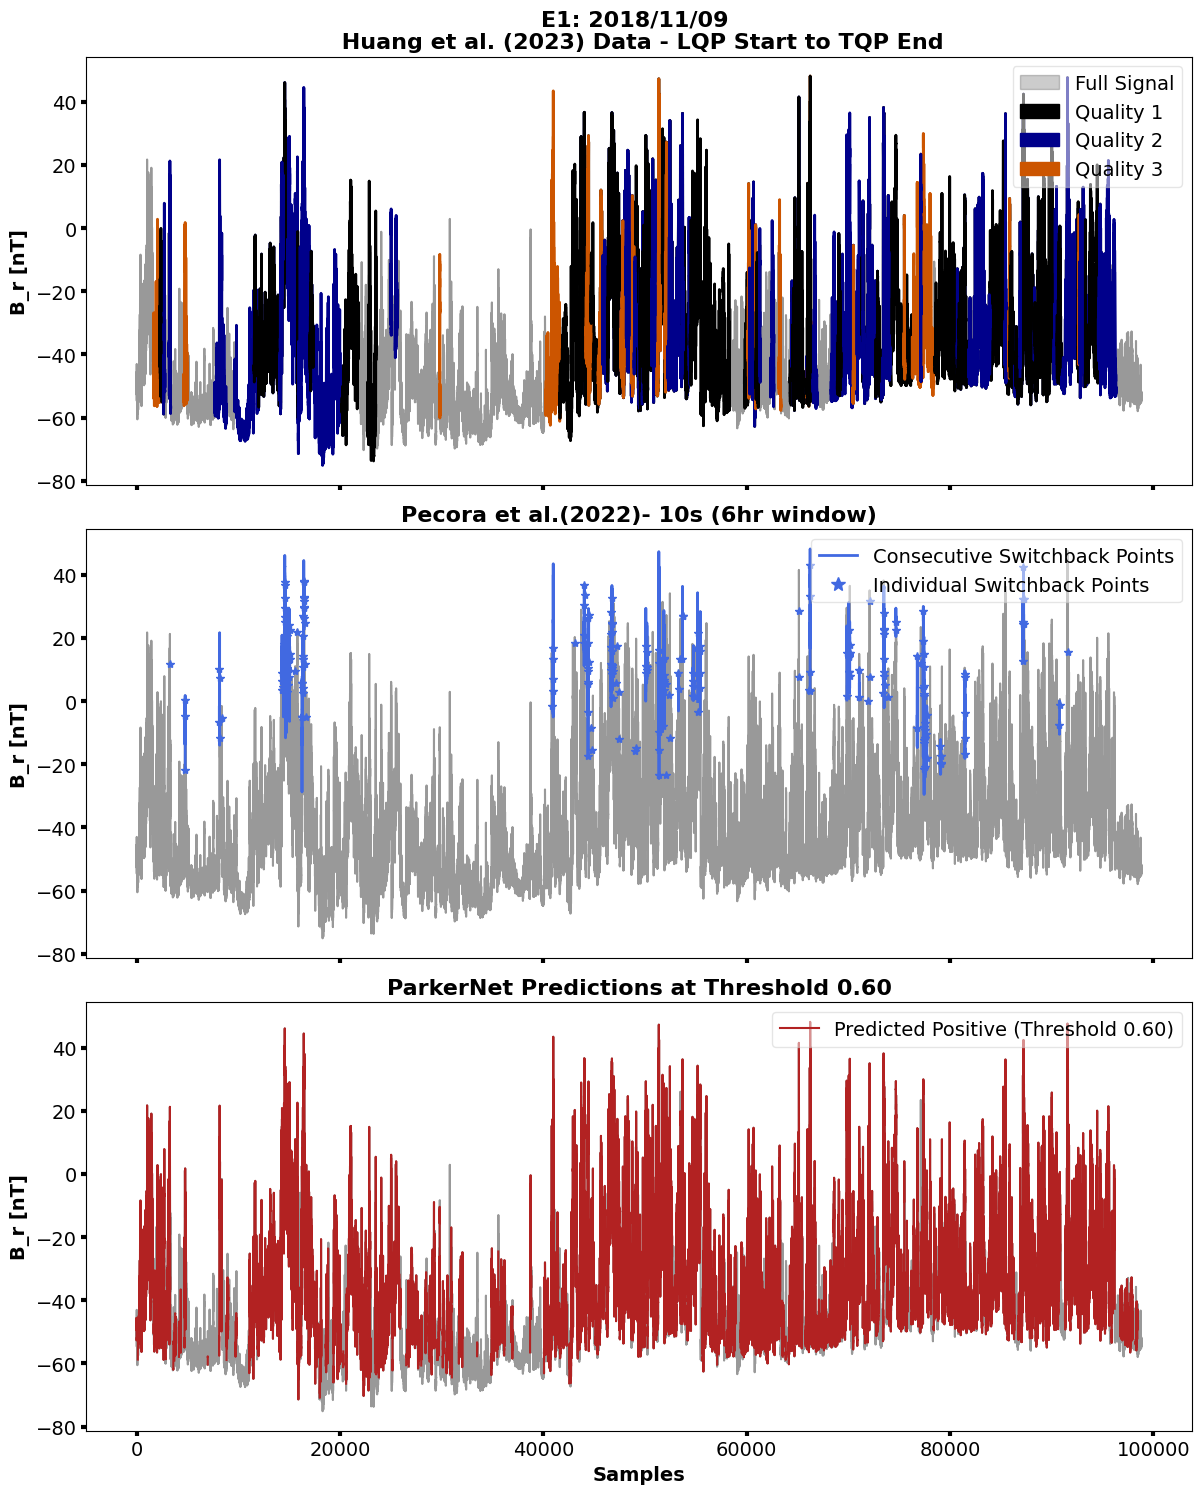

In [ ]:


# Load the Huang ground truth data
roi_data = pd.read_csv('SingalROI_E1_Huang_allRegions.txt', sep='\t')

signal_data = df_ensemble_E1['B_r']
predictions = df_ensemble_E1['Weighted_Voting_AUC_PRC']

# Define the threshold (set to 0.6)
threshold = 0.6

# Define a color map for quality levels
quality_colors = {
    1: 'black',
    2: '#00008B',  # Dark Blue for Quality 1
    3: '#CC5500',  # Burnt Orange for Quality 2
    4: '#8B0000',  # Red Brown for Quality 3
    5: '#8B4513'   # Red Brown for Quality 4
}

# Load the Pecora data 10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E1_Pecora_10s_6hr.txt', sep='\t')

# 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds
# Create binary mask for predictions based on the threshold
binary_predictions = (predictions > threshold).astype(int)


# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Perform DBSCAN clustering on the start indices
indices = pecora_data['start_index'].values.reshape(-1, 1)  # Reshape for DBSCAN
db = DBSCAN(eps=15, min_samples=2)  # Adjust parameters as needed
labels = db.fit_predict(indices)

# Initialize clusters list
clusters = []

# Group indices by cluster labels
for label in np.unique(labels):
    if label != -1:  # Skip noise
        cluster_indices = indices[labels == label].flatten()
        start_index = int(cluster_indices[0])
        end_index = int(cluster_indices[-1])
        clusters.append((start_index, end_index))

# Create subplot
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})
# --- Top Subplot: Full Ground Truth Switchbacks (LQP Start to TQP End) for Huang ---
axs[0].plot(signal_data, color='black', alpha=0.4, label='Full Signal')

# Track legend patches in defined order
legend_patches = [mpatches.Patch(color='black', alpha=0.2, label='Full Signal')]
added_qualities = set()  # Track added quality levels to avoid duplicates

# Plot each switchback (from LQP Start to TQP End) with color based on quality
for _, row in roi_data.iterrows():
    quality_flag = row['QualityFlag']
    color = quality_colors.get(quality_flag, 'gray')  # Use default to gray if the quality level is unknown

    # Define start and end points of the full ground truth switchback
    switchback_start = row['LQP_Start_Index']
    switchback_end = row['TQP_End_Index']

    # Plot the full ground truth switchback as a solid line
    axs[0].plot(range(switchback_start, switchback_end), signal_data[switchback_start:switchback_end], color=color, linewidth=2)

    # Add switchback region to legend if not already added
    if quality_flag not in added_qualities:
        legend_patches.append(mpatches.Patch(color=color, label=f'Quality {quality_flag}'))
        added_qualities.add(quality_flag)

# Sort the legend patches to display qualities in ascending order
legend_patches = [legend_patches[0]] + sorted(legend_patches[1:], key=lambda x: int(x.get_label().split()[-1]))

# Add legend for the top plot
axs[0].legend(handles=legend_patches, loc='upper right', fontsize=14,framealpha=0.5)
axs[0].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[0].set_title('E1: 2018/11/09 \n Huang et al. (2023) Data - LQP Start to TQP End', fontsize=16, fontweight='bold')

# --- Middle Subplot: Pecora Data (Sparse Points and DBSCAN Segments) ---
axs[1].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Plot sparse points as asterisks
sparse_points_color = '#4169E1'  # Royal Blue
for _, row in pecora_data.iterrows():
    start_idx = int(row['start_index'])
    axs[1].plot(start_idx, signal_data[start_idx], marker='*', color=sparse_points_color)

# Plot clustered segments
for start_idx, end_idx in clusters:
    axs[1].plot(range(start_idx, end_idx), signal_data[start_idx:end_idx], color=sparse_points_color, linewidth=2)

# Add legend for Pecora data
pecora_line = Line2D([0], [0], color=sparse_points_color, lw=2, label='Consecutive Switchback Points')
sparse_asterisk = Line2D([0], [0], color=sparse_points_color, marker='*', linestyle='None', markersize=10, label='Individual Switchback Points')
axs[1].legend(handles=[pecora_line, sparse_asterisk], loc='upper right', fontsize=14, framealpha=0.5)

axs[1].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[1].set_title('Pecora et al.(2022)- 10s (6hr window)', fontsize=16, fontweight='bold')

# --- Bottom Subplot: Model Predictions ---
model_prediction_line = signal_data.copy()
model_prediction_line[binary_predictions == 0] = np.nan  # Mask out negative predictions
model_prediction_color = '#B22222'
axs[2].plot(signal_data, color='black', alpha=0.4)
axs[2].plot(model_prediction_line, color=model_prediction_color, linewidth=1.5, label=f'Predicted Positive (Threshold {threshold:.2f})')

axs[2].set_xlabel('Samples', fontsize=14, fontweight='bold')
axs[2].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[2].set_title(f'ParkerNet Predictions at Threshold {threshold:.2f}', fontsize=16, fontweight='bold')
axs[2].legend(loc='upper right', fontsize=14, framealpha=0.5)

# Adjust layout and show the plot for Pecora and Model Predictions
plt.tight_layout()

# Apply tick parameters to all axes after plotting
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, width=3)  # x-axis ticks
    ax.tick_params(axis='y', labelsize=14, width=3)  # y-axis ticks

#plt.savefig('E1_preds_DBSCAN.svg', dpi=600, bbox_inches='tight')#uncomment to save figure
plt.show()


 (True Negatives):  19403
 (False Positives):  12793
(False Negatives):  14682
 (True Positives):  51952
Precision: 0.8024
Recall: 0.7797
F1 Score: 0.7909
Total Switchbacks (Ground Truth 1):  66634
Intersection over Union (IoU): 0.6541


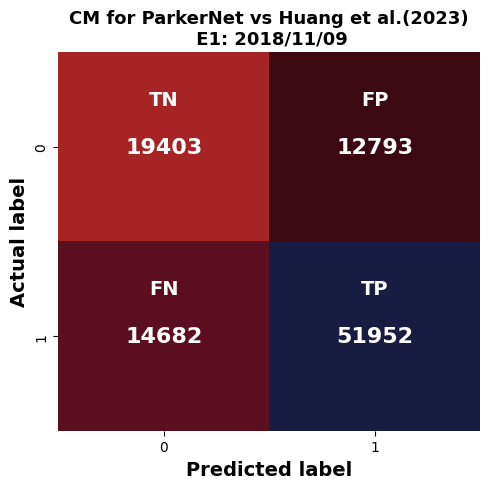

IoU at threshold 0.6: 0.6541


In [ ]:


# Load the data
huang_data_path = 'SingalROI_E1_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')  # loading in huang ground truths

predictions = df_ensemble_E1['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E1['Class_Huang_E1_Range']

# Define threshold (you can change this value if you want to see how the predictions change with threshold)
threshold = 0.6

# Confusion Matrix Function
def plot_cm_and_metrics(labels, predictions, threshold=0.6):
    # Compute the confusion matrix
    cm = confusion_matrix(labels, predictions > threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title('CM for ParkerNet vs Huang et al.(2023)\n E1: 2018/11/09', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')
    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()

    # Position the labels slightly above the center of each section
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    # Show the plot
    plt.savefig('E1_Huang_CM.svg', dpi=600, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth, predictions, threshold=0.6)

# Optionally, print IoU as well if needed:
print(f'IoU at threshold {threshold}: {iou:.4f}')


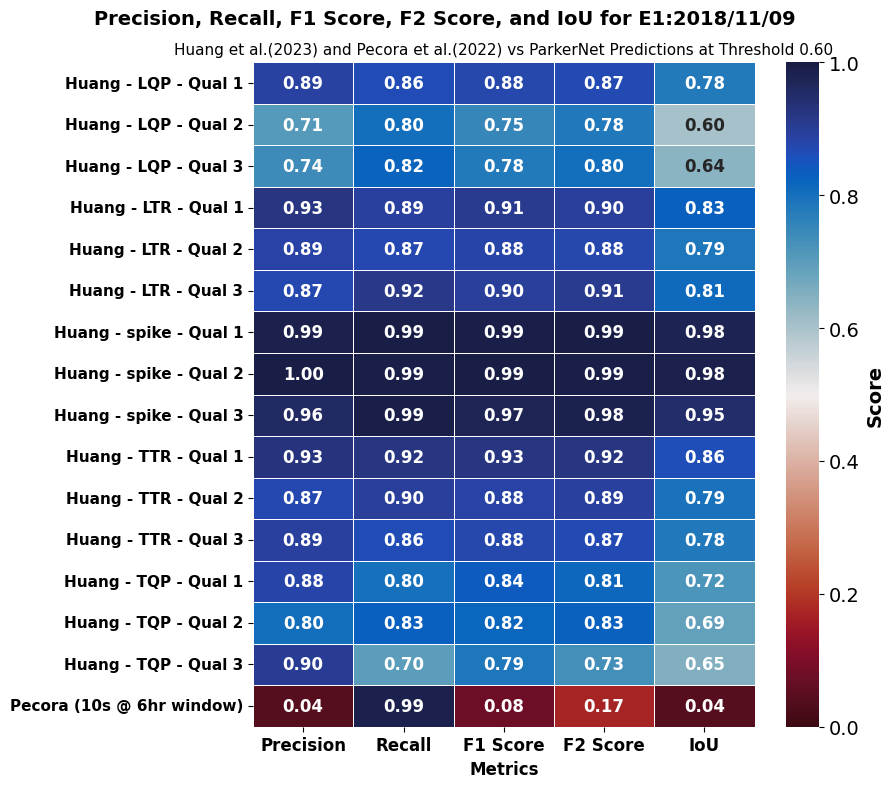

In [ ]:


# Load data
huang_data_path = 'SingalROI_E1_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')

predictions = df_ensemble_E1['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E1['Class_Huang_E1_Range']

# Define threshold
threshold = 0.6

# Define regions for Huang ground truths
regions = {
    "LQP": ("LQP_Start_Index", "LQP_End_Index"),
    "LTR": ("LQP_End_Index", "spike_Start_Index"),
    "spike": ("spike_Start_Index", "spike_End_Index"),
    "TTR": ("spike_End_Index", "TQP_Start_Index"),
    "TQP": ("TQP_Start_Index", "TQP_End_Index")
}

# Initialize lists to store Precision, Recall, F1, F2, and IoU values for the heatmap
heatmap_data = []
row_labels = []

# Loop through regions and quality flags for Huang data
for region, (start_col, end_col) in regions.items():
    for quality in sorted(roi_data['QualityFlag'].unique()):
        row_labels.append(f"Huang - {region} - Qual {quality}")
        row_data = []

        # Filter quality rows for the current region and quality
        quality_rows = roi_data[roi_data['QualityFlag'] == quality]
        ground_truth_segment = []

        # Construct ground truth and predictions for the current region and quality
        for _, row in quality_rows.iterrows():
            start, end = row[start_col], row[end_col]
            gt_segment = ground_truth[start:end].values  # Get the ground truth for the segment
            pred_segment = (predictions[start:end] >= threshold).astype(int).values  # Get the predicted values
            ground_truth_segment.extend(gt_segment)
            ground_truth_segment.extend(pred_segment)

        # Calculate confusion matrix
        cm = confusion_matrix(ground_truth_segment[:len(ground_truth_segment)//2], ground_truth_segment[len(ground_truth_segment)//2:])

        # Get TP, FP, FN
        TN, FP, FN, TP = cm.ravel()

        # Calculate Precision, Recall, F1, and F2 for the current region and quality
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        F1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        F2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0

        # Calculate IoU for the current region and quality
        iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0

        # Append Precision, Recall, F1, F2, IoU results for the current region and quality
        row_data.extend([precision, recall, F1_score, F2_score, iou])

        # Append the data for the current region and quality
        heatmap_data.append(row_data)


#Load Pecora d10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E1_Pecora_10s_6hr.txt', sep = '\t')
predictions_pecora = df_ensemble_E1['Weighted_Voting_AUC_PRC']

# Create binary predictions based on threshold for Pecora data
binary_predictions_pecora = (predictions_pecora >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices for Pecora (10 seconds)
ground_truth_pecora = np.zeros_like(binary_predictions_pecora)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Calculate Precision, Recall, F1, F2, and IoU for Pecora data (as one whole segment)
cm_pecora = confusion_matrix(ground_truth_pecora, binary_predictions_pecora)
TN_pecora, FP_pecora, FN_pecora, TP_pecora = cm_pecora.ravel()  # Get confusion matrix values

# Calculate Precision, Recall, F1, and F2 for Pecora (single value)
precision_pecora = TP_pecora / (TP_pecora + FP_pecora) if (TP_pecora + FP_pecora) != 0 else 0
recall_pecora = TP_pecora / (TP_pecora + FN_pecora) if (TP_pecora + FN_pecora) != 0 else 0
F1_score_pecora = (2 * precision_pecora * recall_pecora) / (precision_pecora + recall_pecora) if (precision_pecora + recall_pecora) != 0 else 0
F2_score_pecora = (5 * precision_pecora * recall_pecora) / (4 * precision_pecora + recall_pecora) if (4 * precision_pecora + recall_pecora) != 0 else 0

# Calculate IoU for Pecora
iou_pecora = TP_pecora / (TP_pecora + FP_pecora + FN_pecora) if (TP_pecora + FP_pecora + FN_pecora) != 0 else 0

# Append Pecora Precision, Recall, F1, F2, IoU to heatmap data
row_labels.append("Pecora (10s @ 6hr window)")
heatmap_data.append([precision_pecora, recall_pecora, F1_score_pecora, F2_score_pecora, iou_pecora])

# Convert heatmap data to DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["Precision", "Recall", "F1 Score", "F2 Score", "IoU"])

# Plot combined heatmap for Precision, Recall, F1, F2, and IoU (including Huang and Pecora)
fig, ax = plt.subplots(figsize=(9, 8))

sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="pyart_balance_r", cbar_kws={'label': 'Score'},
            annot_kws={"weight": "bold", "size": 12},
            linewidths=0.5,
            cbar=True, vmin=0, vmax=1, ax=ax)

plt.suptitle("Precision, Recall, F1 Score, F2 Score, and IoU for E1:2018/11/09", fontsize=14, fontweight='bold', y=0.98)
ax.set_title("Huang et al.(2023) and Pecora et al.(2022) vs ParkerNet Predictions at Threshold 0.60", fontsize=11, fontweight='normal', loc='center')


ax.set_xlabel("Metrics", fontsize=12, fontweight='bold')

ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')

cbar = ax.collections[0].colorbar
cbar.set_label('Score', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=12, fontweight = 'bold')


plt.tight_layout()


#plt.savefig('E1_heatmap.svg', dpi=600, bbox_inches='tight') #uncomment to save figure

# Show the plot
plt.show()


<ipython-input-11-4ef8f9134fb4>:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


   Threshold  Precision    Recall  F1 Score       AUC
0       0.50   0.776737  0.859081  0.815837  0.863721
1       0.55   0.789325  0.823784  0.806186  0.863721
2       0.60   0.802409  0.779662  0.790872  0.863721
3       0.65   0.821212  0.709863  0.761488  0.863721
4       0.70   0.843370  0.601930  0.702484  0.863721
5       0.75   0.870728  0.438905  0.583624  0.863721
6       0.80   0.955962  0.212729  0.348015  0.863721
7       0.85   0.000000  0.000000  0.000000  0.863721
8       0.90   0.000000  0.000000  0.000000  0.863721
9       0.95   0.000000  0.000000  0.000000  0.863721


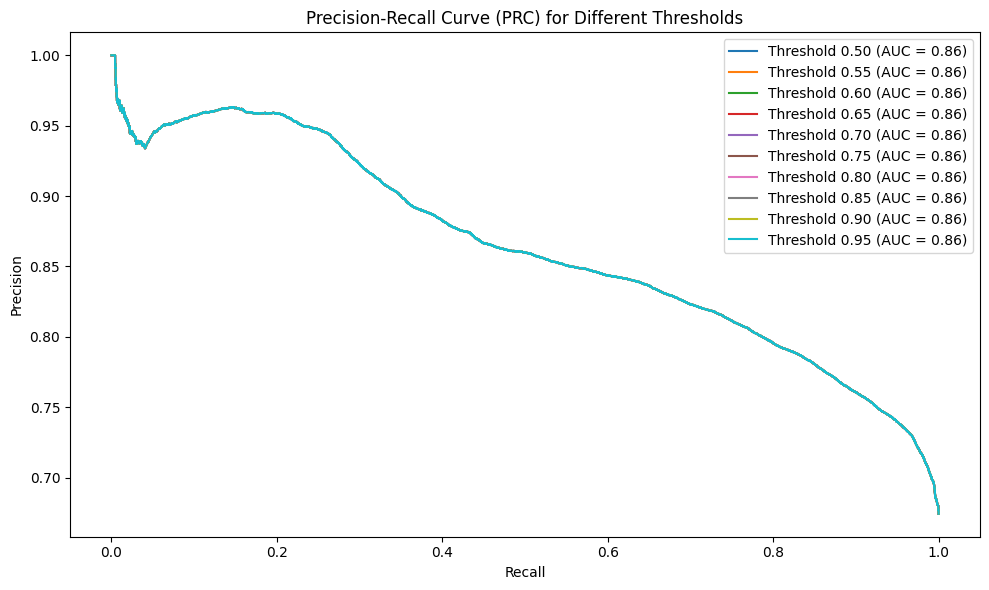

In [ ]:
#Calculate AUC value for Huang et al. (2023) vs Model predictions, the precision, recall, and AUC value at 0.6 threshold is then used (hard coded in the plot below

# Load the data
huang_data_path = 'SingalROI_E1_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E1['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E1['Class_Huang_E1_Range']

# Define thresholds for analysis
thresholds = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store metrics for each threshold
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Create an empty DataFrame to store the metrics for each threshold
metrics_df = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Function to calculate confusion matrix and metrics
def calculate_metrics(labels, predictions, threshold):
    cm = confusion_matrix(labels, predictions > threshold)
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calculate Precision-Recall curve and AUC
    precision_curve, recall_curve, _ = precision_recall_curve(labels, predictions)
    auc_score = auc(recall_curve, precision_curve)

    return precision, recall, f1_score, auc_score

# Loop through each threshold and calculate metrics
for threshold in thresholds:
    precision, recall, f1_score, auc_score = calculate_metrics(ground_truth, predictions, threshold)

    # Add the results to the metrics dataframe using pd.concat
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1_score],
        'AUC': [auc_score]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)

# Plot the Precision-Recall curve and include AUC in the legend
plt.figure(figsize=(10, 6))
for threshold in thresholds:
    # Get precision and recall for the current threshold
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Plot each threshold with its AUC score in the legend
    plt.plot(recall_curve, precision_curve, label=f'Threshold {threshold:.2f} (AUC = {auc_score:.2f})')

plt.title('Precision-Recall Curve (PRC) for Different Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

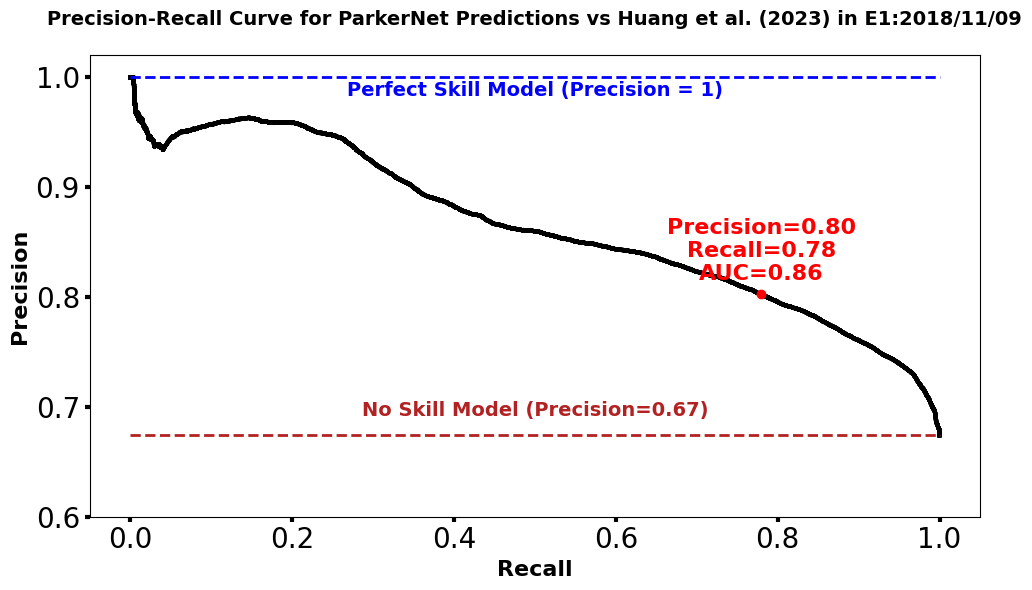

In [ ]:


# Load the data
huang_data_path = 'SingalROI_E1_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E1['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E1['Class_Huang_E1_Range']

# Define thresholds (from 0.5 to 0.95)
thresholds = np.round(np.arange(0.5, 0.95, 0.05), 2)

# Initialize lists to store the Precision-Recall curve and AUC for each threshold
precision_dict = {}
recall_dict = {}
auc_dict = {}

# Calculate Precision-Recall curve and AUC for each threshold
for threshold in thresholds:
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Store precision, recall, and auc values for each threshold
    precision_dict[threshold] = precision_curve
    recall_dict[threshold] = recall_curve
    auc_dict[round(threshold, 2)] = auc_score  # Round threshold to two decimal places

# Plot Precision-Recall curves for all thresholds
plt.figure(figsize=(10, 6))

for threshold in thresholds:
    plt.plot(recall_dict[threshold], precision_dict[threshold], color='black', linewidth=3)

# Provided precision and recall at threshold 0.6
threshold_0_6_precision = 0.802409
threshold_0_6_recall = 0.779662

# Calculate AUC at threshold 0.6
auc_at_06 = auc_dict[0.6]  # AUC for threshold 0.6

# Plot the red dot for threshold 0.6
plt.plot(threshold_0_6_recall, threshold_0_6_precision, 'k-', label=f'Model Precision-Recall curve at 0.60 threshold')

# Calculate No Skill Model baseline
num_positives = np.sum(ground_truth == 1)
num_total = len(ground_truth)
no_skill_precision = num_positives / num_total
no_skill_recall = num_positives / num_total  # Recall is the same as the proportion of positives

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.005),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.97),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')

# Adding labels and title
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Huang et al. (2023) in E1:2018/11/09\n', fontsize=14, fontweight='bold')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(threshold_0_6_recall, threshold_0_6_precision, color='red', zorder=5)

# Add the red dot annotation for threshold 0.6
plt.annotate(f'Precision={threshold_0_6_precision:.2f}\nRecall={threshold_0_6_recall:.2f}\nAUC={auc_at_06:.2f}',
             (threshold_0_6_recall, threshold_0_6_precision),
             textcoords="offset points",
             xytext=(0,10),
             ha='center', fontsize=16, fontweight='bold', color='red')

# Set y-axis limits to ensure the perfect skill line is visible
plt.ylim(0.6, 1.02)
# Customize y-axis ticks to show 0.1 and 0.9
plt.yticks(np.arange(0.6, 1.02, 0.1))  # Set y-ticks from 0 to 1 with step of 0.1

# Apply the tick parameters to all axes after plotting
plt.tick_params(axis='x', labelsize=20, width=3)
plt.tick_params(axis='y', labelsize=20, width=3)


#plt.savefig('E1_Huang_PRC.svg', dpi=600, bbox_inches='tight') #uncomment to save figure
plt.tight_layout()
plt.show()


 (True Negatives):  34052
 (False Positives):  62160
(False Negatives):  33
 (True Positives):  2585
Precision: 0.0399
Recall: 0.9874
F1 Score: 0.0767
Total Switchbacks (Ground Truth 1):  2618
Intersection over Union (IoU): 0.0399
IoU at threshold 0.6: 0.0399


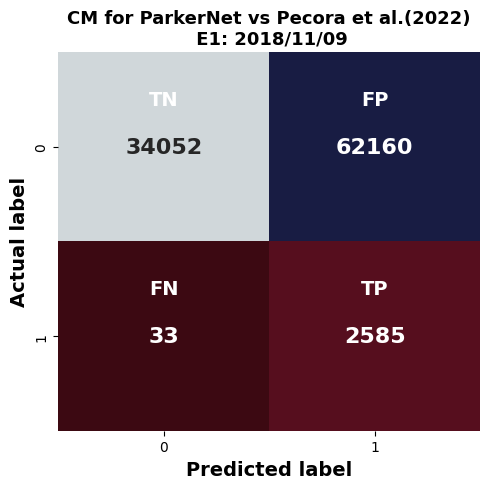

In [ ]:


# Load data
pecora_data = pd.read_csv('SignalROI_E1_Pecora_10s_6hr.txt', sep='\t')  # Pecora data
predictions = df_ensemble_E1['Weighted_Voting_AUC_PRC']

# Define threshold
threshold = 0.6

# Create a binary prediction array based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices
ground_truth_pecora = np.zeros_like(binary_predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def plot_cm_and_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)
    if np.all(cm == 0):  # Check if cm is all zeros (invalid case)
        print("Warning: Confusion matrix is all zeros!")
        return None  # Return None if confusion matrix is empty

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title(f'CM for ParkerNet vs Pecora et al.(2022)\n E1: 2018/11/09', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')

    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth_pecora, binary_predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
if iou is not None:
    print(f'IoU at threshold {threshold}: {iou:.4f}')

# Show the plot
plt.tight_layout()
plt.savefig('E1_Pecora_CM_1.svg', dpi=600, bbox_inches='tight')  # Save after the plot is created
plt.show()


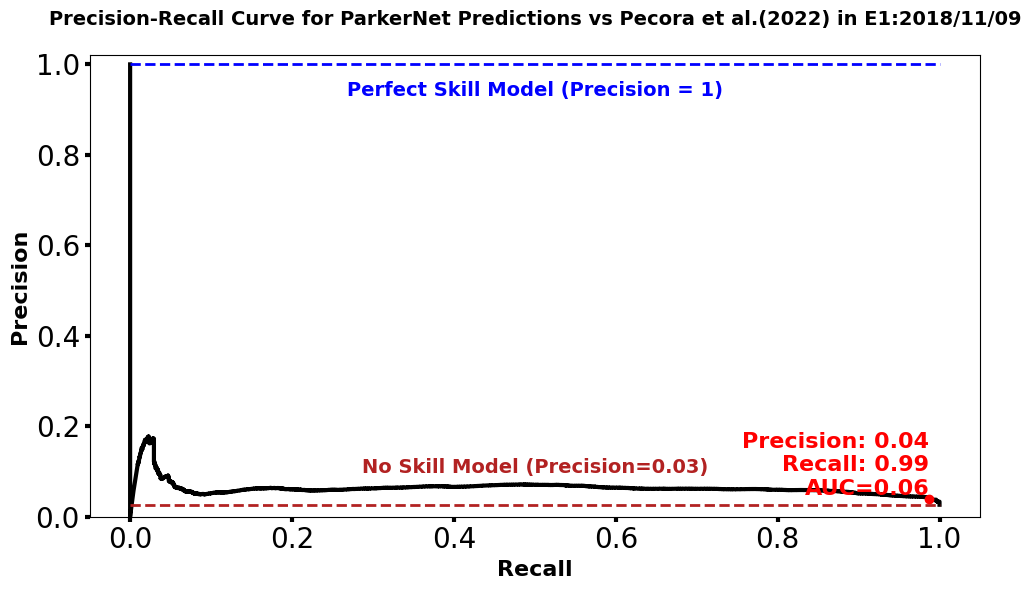

In [ ]:


# Load the Pecora data and model predictions
pecora_data = pd.read_csv('SignalROI_E1_Pecora_10s_6hr.txt', sep='\t')  # Pecora data
predictions = df_ensemble_E1['Weighted_Voting_AUC_PRC']

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Adjust Pecora data based on the start and end indices (10-second window)
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)

# Construct ground truth based on adjusted indices for Pecora data
ground_truth_pecora = np.zeros_like(predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Define thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize list to store metrics
metrics_list = []

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def calculate_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1_score

# Evaluate metrics at various thresholds
for threshold in thresholds:
    precision, recall, f1_score = calculate_metrics(ground_truth_pecora, predictions, threshold)
    metrics_list.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})

# Convert metrics list to dataframe
metrics_df = pd.DataFrame(metrics_list)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ground_truth_pecora, predictions)

# **Perfect Skill** line will be precision=1, recall=1 across all recall values
perfect_skill = np.ones_like(recall)

# **No Skill** line is precision = the proportion of positive samples in the ground truth
no_skill_precision = np.sum(ground_truth_pecora == 1) / len(ground_truth_pecora)  # Proportion of positive samples
no_skill = np.full_like(recall, no_skill_precision)

# AUC at threshold 0.6
threshold_06_index = np.where(thresholds >= 0.6)[0][0]
precision_at_06 = metrics_df.loc[threshold_06_index, 'Precision']
recall_at_06 = metrics_df.loc[threshold_06_index, 'Recall']
auc_at_06 = auc(recall, precision)  # Calculate AUC value

plt.figure(figsize=(10, 6))

# Plot Precision-Recall Curve
plt.plot(recall, precision, color='black', lw=3, label=f'Model Precision-Recall Curve at 0.6 threshold')

# Plot No Skill line
#plt.plot(recall, no_skill, color='#B22222', linestyle='--', lw=2, label=f'No Skill Model (Precision={no_skill_precision:.2f})')


# Plot Perfect Skill line
#plt.plot(recall, perfect_skill, color='blue', linestyle='--', lw=2, label='Perfect Skill Model (Precision = 1)')

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.04),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.9),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')


# Plot Precision and Recall values at threshold 0.6 directly on the graph
plt.text(recall_at_06, precision_at_06, f'Precision: {precision_at_06:.2f}\nRecall: {recall_at_06:.2f}\nAUC={auc_at_06:.2f}', color='red', fontsize=16, fontweight = 'bold', ha='right', va='bottom')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(recall_at_06, precision_at_06, color='red', zorder=5)

# Labels and Title
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Pecora et al.(2022) in E1:2018/11/09\n', fontsize=14, fontweight='bold')

plt.ylim(0, 1.02)
plt.yticks(np.arange(0, 1.02, 0.2))

# Increase the size of the x and y axis tick marks
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks
# Add the legend
#plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize='large', prop={'weight': 'bold'},labelspacing=0.5, markerscale=1.5)
plt.savefig('E1_Pecora_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


ENCOUNTER 2

In [ ]:
# Read in the dataset for predicting (Here we us a dataset containing data from 2019/03/31)
df_E2 = pd.read_csv('PSP_E2_ForPrediction.txt', sep="\t", parse_dates=['Datetime'])

# Separate the 'Class_Huang_Ex' column into df_gt
df_gt_E2 = df_E2[['Class_Huang_E2_Range']].copy()

pd.set_option('future.no_silent_downcasting', True)
df_gt_E2['Class_Huang_E2_Range'] = df_gt_E2['Class_Huang_E2_Range'].replace({True: 1, False: 0}).infer_objects(copy=False).astype(int)
# Create df_test by dropping the 'Class_Huang_Ex' column and other columns not needed
df_test_E2 = df_E2.drop(columns=['Class_Huang_E2_Range'])

df_test_E2.pop("X_HCI")
df_test_E2.pop("Y_HCI")
df_test_E2.pop("Z_HCI")

df_test_E2.head()

Datetime        B_r       Bmag        B_t        B_n  \
0 2019-03-31 00:00:00.000  -3.997721  45.038663  23.302035 -38.334248   
1 2019-03-31 00:00:00.873 -13.131507  42.945250  31.007984 -26.652635   
2 2019-03-31 00:00:01.747 -25.357215  44.307323  31.124914 -18.745406   
3 2019-03-31 00:00:02.621 -23.687895  44.224938  22.600516 -29.731221   
4 2019-03-31 00:00:03.495 -31.643320  44.615896  10.570402 -29.623387   

       V_r      V_t      V_n        Vmag       V_nr  ProtonDensity  
0  294.085 -76.5423  34.3271  305.815403  83.887267        167.405  
1  294.085 -76.5423  34.3271  305.815403  83.887267        167.405  
2  294.085 -76.5423  34.3271  305.815403  83.887267        167.405  
3  294.085 -76.5423  34.3271  305.815403  83.887267        167.405  
4  294.085 -76.5423  34.3271  305.815403  83.887267        167.405

In [ ]:
df_gt_allpreds_E2 = pd.read_csv('ParkerNet_allModel_averaged_predictions_E2_20190331.csv')
display(df_gt_allpreds_E2)

Class_Huang_E2_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.422392              0.585961   
1                         0              0.412204              0.570724   
2                         0              0.402828              0.563941   
3                         0              0.393905              0.552525   
4                         0              0.391046              0.550934   
...                     ...                   ...                   ...   
98825                     0              0.308025              0.130611   
98826                     0              0.308758              0.130066   
98827                     0              0.306730              0.129967   
98828                     0              0.309759              0.129773   
98829                     0              0.311900              0.129945   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.466262               0.281288              0.187893   
1                  0.465080               0.280496              0.187789   
2                  0.467580               0.278630              0.185202   
3                  0.470586               0.276586              0.185718   
4                  0.471933               0.274503              0.185165   
...                     ...                    ...                   ...   
98825              0.289215               0.281273              0.275734   
98826              0.289192               0.281039              0.274774   
98827              0.289975               0.280896              0.273919   
98828              0.289799               0.280932              0.274068   
98829              0.290573               0.281154              0.274778   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.562691              0.464737              0.506796   
1                  0.543802              0.466037              0.502321   
2                  0.525523              0.462305              0.498780   
3                  0.509937              0.457609              0.499365   
4                  0.495792              0.453951              0.494039   
...                     ...                   ...                   ...   
98825              0.155076              0.229994              0.180083   
98826              0.155581              0.230196              0.180308   
98827              0.155443              0.229766              0.180504   
98828              0.155590              0.229913              0.180333   
98829              0.155707              0.230215              0.180665   

       Preds_splitM_seed641  ...  Preds_splitM_seed1843  \
0                  0.457028  ...               0.449406   
1                  0.442233  ...               0.455070   
2                  0.426621  ...               0.459609   
3                  0.411058  ...               0.461354   
4                  0.394966  ...               0.470763   
...                     ...  ...                    ...   
98825              0.162062  ...               0.326440   
98826              0.161920  ...               0.327769   
98827              0.162748  ...               0.328980   
98828              0.162541  ...               0.330886   
98829              0.163015  ...               0.331831   

       Preds_splitM_seed2221  Preds_splitM_seed3060  Preds_splitM_seed3247  \
0                   0.271625               0.468457               0.598037   
1                   0.268902               0.460512               0.585766   
2                   0.265603               0.443564               0.571898   
3                   0.262435               0.423062               0.561997   
4                   0.257373               0.414635               0.552588   
...                      ...                    ...                    ...   
98825               0.215063         

In [ ]:
df_test_E2.reset_index(drop=True, inplace=True)
df_gt_allpreds_E2.reset_index(drop=True, inplace=True)
df_ensemble_E2 = pd.concat([df_gt_allpreds_E2, df_test_E2], axis=1, join='inner')
display(df_ensemble_E2)

Class_Huang_E2_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.422392              0.585961   
1                         0              0.412204              0.570724   
2                         0              0.402828              0.563941   
3                         0              0.393905              0.552525   
4                         0              0.391046              0.550934   
...                     ...                   ...                   ...   
98825                     0              0.308025              0.130611   
98826                     0              0.308758              0.130066   
98827                     0              0.306730              0.129967   
98828                     0              0.309759              0.129773   
98829                     0              0.311900              0.129945   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.466262               0.281288              0.187893   
1                  0.465080               0.280496              0.187789   
2                  0.467580               0.278630              0.185202   
3                  0.470586               0.276586              0.185718   
4                  0.471933               0.274503              0.185165   
...                     ...                    ...                   ...   
98825              0.289215               0.281273              0.275734   
98826              0.289192               0.281039              0.274774   
98827              0.289975               0.280896              0.273919   
98828              0.289799               0.280932              0.274068   
98829              0.290573               0.281154              0.274778   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.562691              0.464737              0.506796   
1                  0.543802              0.466037              0.502321   
2                  0.525523              0.462305              0.498780   
3                  0.509937              0.457609              0.499365   
4                  0.495792              0.453951              0.494039   
...                     ...                   ...                   ...   
98825              0.155076              0.229994              0.180083   
98826              0.155581              0.230196              0.180308   
98827              0.155443              0.229766              0.180504   
98828              0.155590              0.229913              0.180333   
98829              0.155707              0.230215              0.180665   

       Preds_splitM_seed641  ...        B_r       Bmag        B_t        B_n  \
0                  0.457028  ...  -3.997721  45.038663  23.302035 -38.334248   
1                  0.442233  ... -13.131507  42.945250  31.007984 -26.652635   
2                  0.426621  ... -25.357215  44.307323  31.124914 -18.745406   
3                  0.411058  ... -23.687895  44.224938  22.600516 -29.731221   
4                  0.394966  ... -31.643320  44.615896  10.570402 -29.623387   
...                     ...  ...        ...        ...        ...        ...   
98825              0.162062  ... -49.065172  54.000127  18.242101  13.260783   
98826              0.161920  ... -47.820400  54.056726  13.197960  21.474471   
98827              0.162748  ... -49.059952  55.101722   9.399047  23.258952   
98828              0.162541  ... -49.960652  55.243783   9.289792  21.668147   
98829              0.163015  ... -49.825879  54.988350   9.680909  21.151369   

           V_r      V_t      V_n        Vmag       V_nr  ProtonDensity  
0      294.085 -76.5423  34.3271  305.815403  83.887267        167.405  
1      294.085 -76.5423  34.3271  305.815403  83.887267        167.405  
2      294.085 -76.5423  34.3271  305.815403  83.887267        167.405  
3      294.085 -76.5423  34.3271  305.8

In [ ]:
df_ensemble_E2['prediction_0.6'] = (df_ensemble_E2['Weighted_Voting_AUC_PRC'] > 0.6).astype(int)
df_ensemble_E2.to_csv('predictions_E2.csv', index=False)

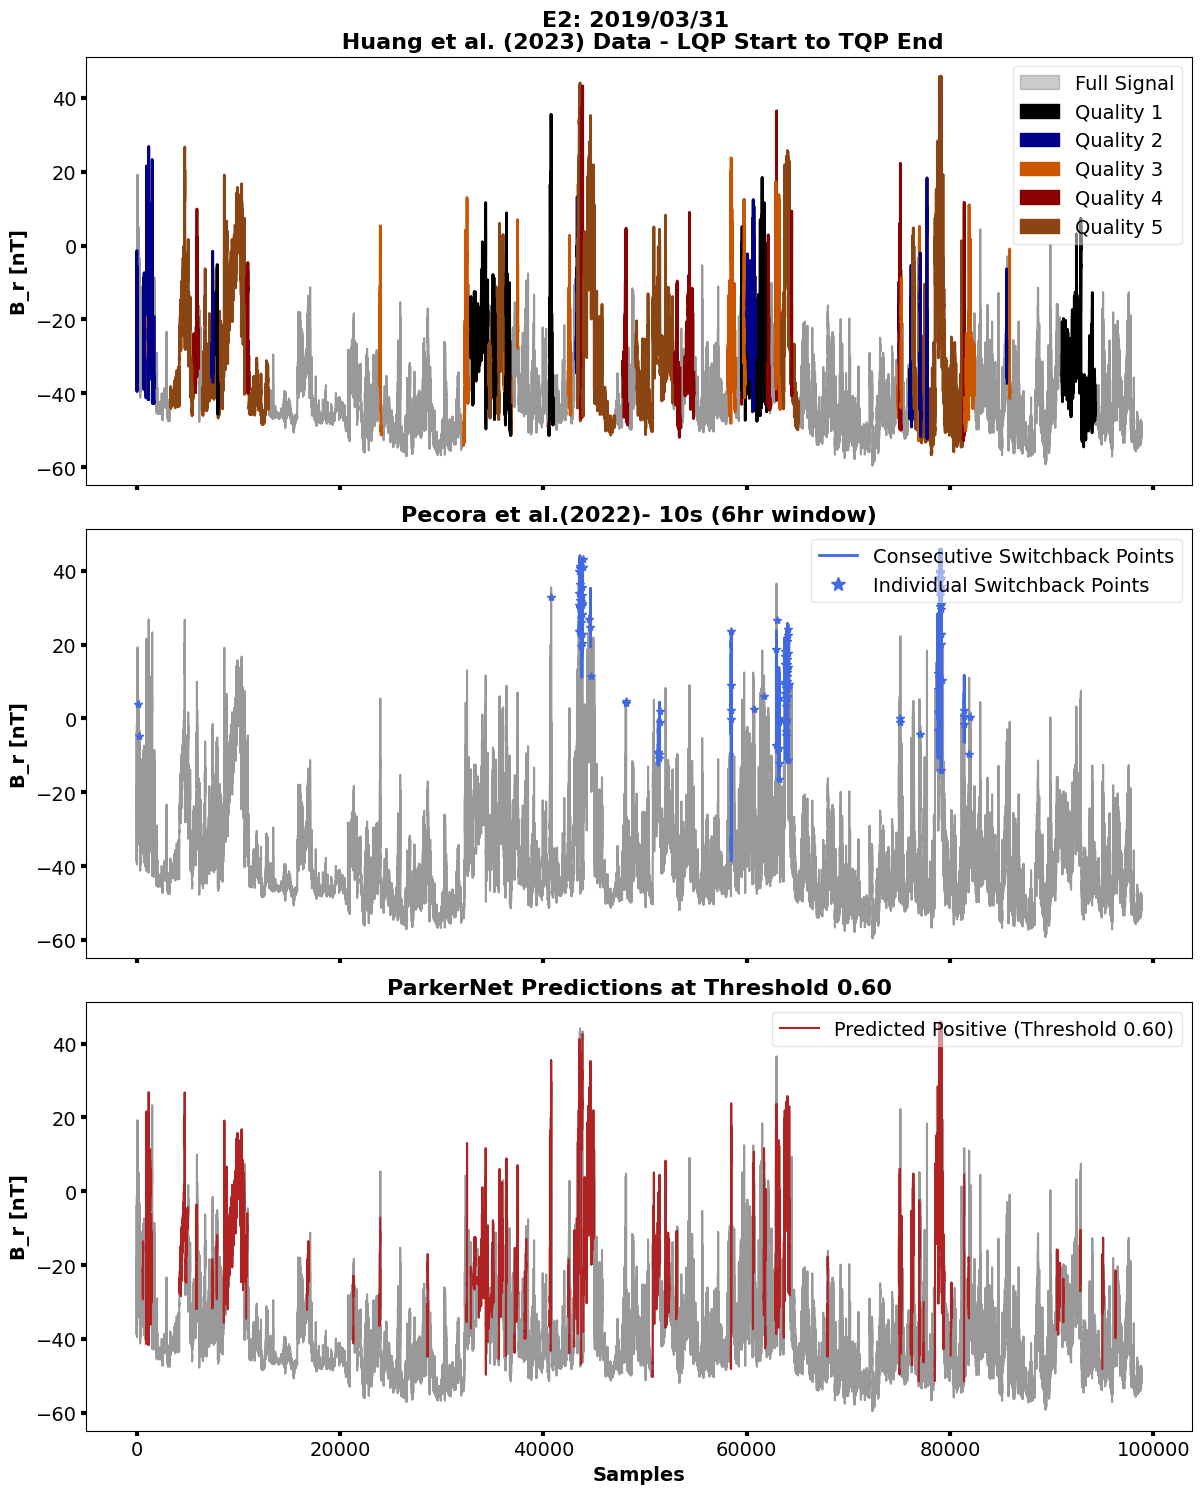

In [ ]:



roi_data = pd.read_csv('SingalROI_E2_Huang_allRegions.txt', sep='\t')

signal_data = df_ensemble_E2['B_r']
predictions = df_ensemble_E2['Weighted_Voting_AUC_PRC']

# Define the threshold (set to 0.6)
threshold = 0.6

# Define a color map for quality levels
quality_colors = {
    1: 'black',
    2: '#00008B',  # Dark Blue for Quality 1
    3: '#CC5500',  # Burnt Orange for Quality 2
    4: '#8B0000',  # Red Brown for Quality 3
    5: '#8B4513'   # Red Brown for Quality 4
}

# Load the Pecora data 10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E2_Pecora_10s_6hr.txt', sep='\t')

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds
# Create binary mask for predictions based on the threshold
binary_predictions = (predictions > threshold).astype(int)


# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Perform DBSCAN clustering on the start indices
indices = pecora_data['start_index'].values.reshape(-1, 1)  # Reshape for DBSCAN
db = DBSCAN(eps=15, min_samples=2)  # Adjust parameters as needed
labels = db.fit_predict(indices)

# Initialize clusters list
clusters = []

# Group indices by cluster labels
for label in np.unique(labels):
    if label != -1:  # Skip noise
        cluster_indices = indices[labels == label].flatten()
        start_index = int(cluster_indices[0])
        end_index = int(cluster_indices[-1])
        clusters.append((start_index, end_index))


fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})
# --- Top Subplot: Full Ground Truth Switchbacks (LQP Start to TQP End) for Huang ---
axs[0].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Track legend patches in defined order
legend_patches = [mpatches.Patch(color='black', alpha=0.2, label='Full Signal')]
added_qualities = set()  # Track added quality levels to avoid duplicates

# Plot each switchback (from LQP Start to TQP End) with color based on quality
for _, row in roi_data.iterrows():
    quality_flag = row['QualityFlag']
    color = quality_colors.get(quality_flag, 'gray')  # Default to gray if the quality level is unknown

    # Define start and end points of the full ground truth switchback
    switchback_start = row['LQP_Start_Index']
    switchback_end = row['TQP_End_Index']

    # Plot the full ground truth switchback as a solid line
    axs[0].plot(range(switchback_start, switchback_end), signal_data[switchback_start:switchback_end], color=color, linewidth=2)

    # Add switchback region to legend
    if quality_flag not in added_qualities:
        legend_patches.append(mpatches.Patch(color=color, label=f'Quality {quality_flag}'))
        added_qualities.add(quality_flag)

# Sort the legend patches to display qualities in ascending order
legend_patches = [legend_patches[0]] + sorted(legend_patches[1:], key=lambda x: int(x.get_label().split()[-1]))

# Add legend for the top plot
axs[0].legend(handles=legend_patches, loc='upper right', fontsize=14,framealpha=0.5)
axs[0].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[0].set_title('E2: 2019/03/31 \n Huang et al. (2023) Data - LQP Start to TQP End', fontsize=16, fontweight='bold')

# --- Middle Subplot: Pecora Data (Sparse Points and DBSCAN Segments) ---
axs[1].plot(signal_data, color='black', alpha=0.4, label='Full Signal')

# Plot sparse points as asterisks
sparse_points_color = '#4169E1'  # Royal Blue
for _, row in pecora_data.iterrows():
    start_idx = int(row['start_index'])
    axs[1].plot(start_idx, signal_data[start_idx], marker='*', color=sparse_points_color)

# Plot clustered segments
for start_idx, end_idx in clusters:
    axs[1].plot(range(start_idx, end_idx), signal_data[start_idx:end_idx], color=sparse_points_color, linewidth=2)

# Add legend for Pecora data
pecora_line = Line2D([0], [0], color=sparse_points_color, lw=2, label='Consecutive Switchback Points')
sparse_asterisk = Line2D([0], [0], color=sparse_points_color, marker='*', linestyle='None', markersize=10, label='Individual Switchback Points')
axs[1].legend(handles=[pecora_line, sparse_asterisk], loc='upper right', fontsize=14, framealpha=0.5)

axs[1].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[1].set_title('Pecora et al.(2022)- 10s (6hr window)', fontsize=16, fontweight='bold')

# --- Bottom Subplot: Model Predictions ---
model_prediction_line = signal_data.copy()
model_prediction_line[binary_predictions == 0] = np.nan  # Mask out negative predictions
model_prediction_color = '#B22222'
axs[2].plot(signal_data, color='black', alpha=0.4)
axs[2].plot(model_prediction_line, color=model_prediction_color, linewidth=1.5, label=f'Predicted Positive (Threshold {threshold:.2f})')

axs[2].set_xlabel('Samples', fontsize=14, fontweight='bold')
axs[2].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[2].set_title(f'ParkerNet Predictions at Threshold {threshold:.2f}', fontsize=16, fontweight='bold')
axs[2].legend(loc='upper right', fontsize=14, framealpha=0.5)


plt.tight_layout()
# Apply tick parameters to all axes after plotting
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, width=3)  # x-axis ticks
    ax.tick_params(axis='y', labelsize=14, width=3)  # y-axis ticks

#plt.savefig('E2_preds_DBSCAN.svg', dpi=600, bbox_inches='tight')#uncomment to save figure
plt.show()

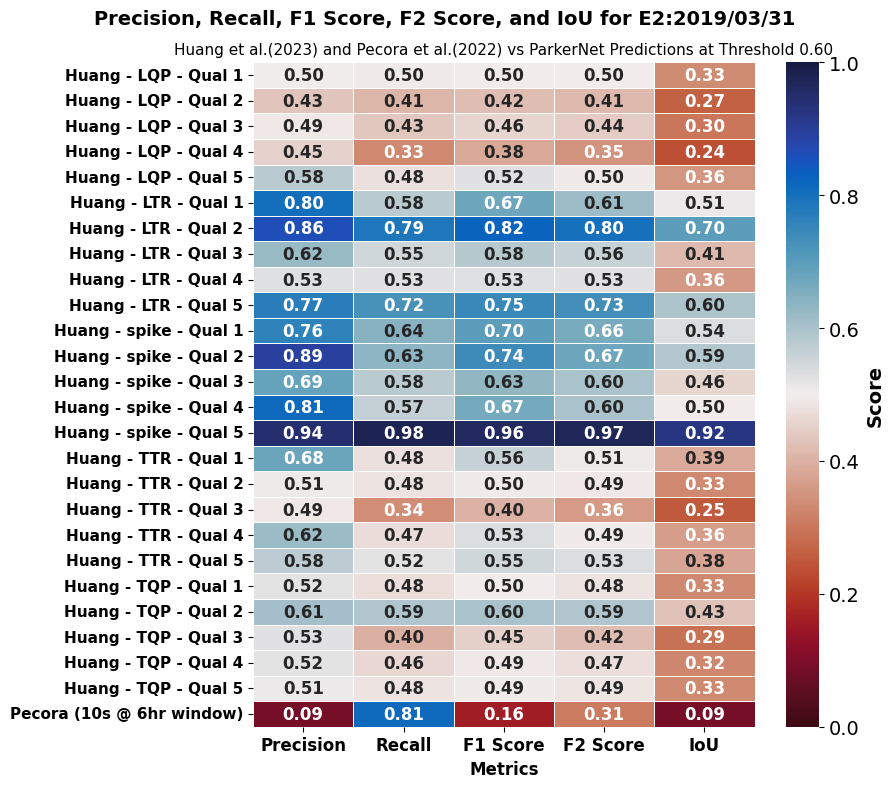

In [ ]:


huang_data_path = 'SingalROI_E2_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E2['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E2['Class_Huang_E2_Range']

# Define threshold
threshold = 0.6

# Define regions for Huang ground truths
regions = {
    "LQP": ("LQP_Start_Index", "LQP_End_Index"),
    "LTR": ("LQP_End_Index", "spike_Start_Index"),
    "spike": ("spike_Start_Index", "spike_End_Index"),
    "TTR": ("spike_End_Index", "TQP_Start_Index"),
    "TQP": ("TQP_Start_Index", "TQP_End_Index")
}

# Initialize lists to store Precision, Recall, F1, F2, and IoU values for the heatmap
heatmap_data = []
row_labels = []

# Loop through regions and quality flags for Huang data
for region, (start_col, end_col) in regions.items():
    for quality in sorted(roi_data['QualityFlag'].unique()):
        row_labels.append(f"Huang - {region} - Qual {quality}")
        row_data = []

        # Filter quality rows for the current region and quality
        quality_rows = roi_data[roi_data['QualityFlag'] == quality]
        ground_truth_segment = []

        # Construct ground truth and predictions for the current region and quality
        for _, row in quality_rows.iterrows():
            start, end = row[start_col], row[end_col]
            gt_segment = ground_truth[start:end].values  # Get the ground truth for the segment
            pred_segment = (predictions[start:end] >= threshold).astype(int).values  # Get the predicted values
            ground_truth_segment.extend(gt_segment)
            ground_truth_segment.extend(pred_segment)

        # Calculate confusion matrix
        cm = confusion_matrix(ground_truth_segment[:len(ground_truth_segment)//2], ground_truth_segment[len(ground_truth_segment)//2:])

        # Get TP, FP, FN
        TN, FP, FN, TP = cm.ravel()

        # Calculate Precision, Recall, F1, and F2 for the current region and quality
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        F1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        F2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0

        # Calculate IoU for the current region and quality
        iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0

        # Append Precision, Recall, F1, F2, IoU results for the current region and quality
        row_data.extend([precision, recall, F1_score, F2_score, iou])

        # Append the data for the current region and quality
        heatmap_data.append(row_data)



#Load Pecora d10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E2_Pecora_10s_6hr.txt', sep = '\t')
# Assuming df_ensemble_E2 contains model predictions
predictions_pecora = df_ensemble_E2['Weighted_Voting_AUC_PRC']

# Create binary predictions based on threshold for Pecora data
binary_predictions_pecora = (predictions_pecora >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices for Pecora (10 seconds)
ground_truth_pecora = np.zeros_like(binary_predictions_pecora)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Calculate Precision, Recall, F1, F2, and IoU for Pecora data (as one whole segment)
cm_pecora = confusion_matrix(ground_truth_pecora, binary_predictions_pecora)
TN_pecora, FP_pecora, FN_pecora, TP_pecora = cm_pecora.ravel()  # Get confusion matrix values

# Calculate Precision, Recall, F1, and F2 for Pecora (single value)
precision_pecora = TP_pecora / (TP_pecora + FP_pecora) if (TP_pecora + FP_pecora) != 0 else 0
recall_pecora = TP_pecora / (TP_pecora + FN_pecora) if (TP_pecora + FN_pecora) != 0 else 0
F1_score_pecora = (2 * precision_pecora * recall_pecora) / (precision_pecora + recall_pecora) if (precision_pecora + recall_pecora) != 0 else 0
F2_score_pecora = (5 * precision_pecora * recall_pecora) / (4 * precision_pecora + recall_pecora) if (4 * precision_pecora + recall_pecora) != 0 else 0

# Calculate IoU for Pecora
iou_pecora = TP_pecora / (TP_pecora + FP_pecora + FN_pecora) if (TP_pecora + FP_pecora + FN_pecora) != 0 else 0

# Append Pecora Precision, Recall, F1, F2, IoU to heatmap data
row_labels.append("Pecora (10s @ 6hr window)")
heatmap_data.append([precision_pecora, recall_pecora, F1_score_pecora, F2_score_pecora, iou_pecora])

# Convert heatmap data to DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["Precision", "Recall", "F1 Score", "F2 Score", "IoU"])

# Plot combined heatmap for Precision, Recall, F1, F2, and IoU (including Huang and Pecora)
fig, ax = plt.subplots(figsize=(9, 8))  # Adjust figure size for better readability

sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="pyart_balance_r", cbar_kws={'label': 'Score'},
            annot_kws={"weight": "bold", "size": 12},  # Make annotation bold
            linewidths=0.5,  # Optional: thin line between cells
            cbar=True, vmin=0, vmax=1, ax=ax)  # Set color scale to go from 0 to 1

# Title and labels in bold with line breaks for title
plt.suptitle("Precision, Recall, F1 Score, F2 Score, and IoU for E2:2019/03/31", fontsize=14, fontweight='bold', y=0.98)
ax.set_title("Huang et al.(2023) and Pecora et al.(2022) vs ParkerNet Predictions at Threshold 0.60", fontsize=11, fontweight='normal', loc='center')

# Set xlabel with bold font
ax.set_xlabel("Metrics", fontsize=12, fontweight='bold')

# Make the y-axis labels bold and adjust font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')

# Make the legend label bold
cbar = ax.collections[0].colorbar
cbar.set_label('Score', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=12, fontweight = 'bold')
# Adjust layout to ensure everything fits without excessive width

plt.tight_layout()
#plt.savefig('E2_heatmap_1.svg', dpi=600, bbox_inches='tight')
plt.show()




 (True Negatives):  56532
 (False Positives):  1259
(False Negatives):  30586
 (True Positives):  10453
Precision: 0.8925
Recall: 0.2547
F1 Score: 0.3963
Total Switchbacks (Ground Truth 1):  41039
Intersection over Union (IoU): 0.2471


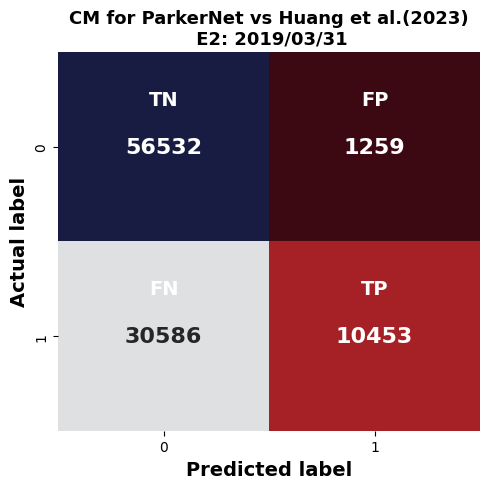

IoU at threshold 0.6: 0.2471


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the data
huang_data_path = 'SingalROI_E2_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E2['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E2['Class_Huang_E2_Range']

# Define threshold
threshold = 0.6

# Confusion Matrix Function
def plot_cm_and_metrics(labels, predictions, threshold=0.6):
    # Compute the confusion matrix
    cm = confusion_matrix(labels, predictions > threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title('CM for ParkerNet vs Huang et al.(2023)\n E2: 2019/03/31', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')
    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()

    # Position the labels slightly above the center of each section
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')


    #plt.savefig('E2_Huang_CM.svg', dpi=600, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth, predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
print(f'IoU at threshold {threshold}: {iou:.4f}')

<ipython-input-62-80555fcfd893>:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


   Threshold  Precision    Recall  F1 Score       AUC
0       0.50   0.791728  0.352177  0.487503  0.729596
1       0.55   0.844875  0.302054  0.445011  0.729596
2       0.60   0.892503  0.254709  0.396315  0.729596
3       0.65   0.934010  0.210726  0.343871  0.729596
4       0.70   0.981394  0.151661  0.262721  0.729596
5       0.75   1.000000  0.080095  0.148310  0.729596
6       0.80   1.000000  0.024294  0.047436  0.729596
7       0.85   0.000000  0.000000  0.000000  0.729596
8       0.90   0.000000  0.000000  0.000000  0.729596
9       0.95   0.000000  0.000000  0.000000  0.729596


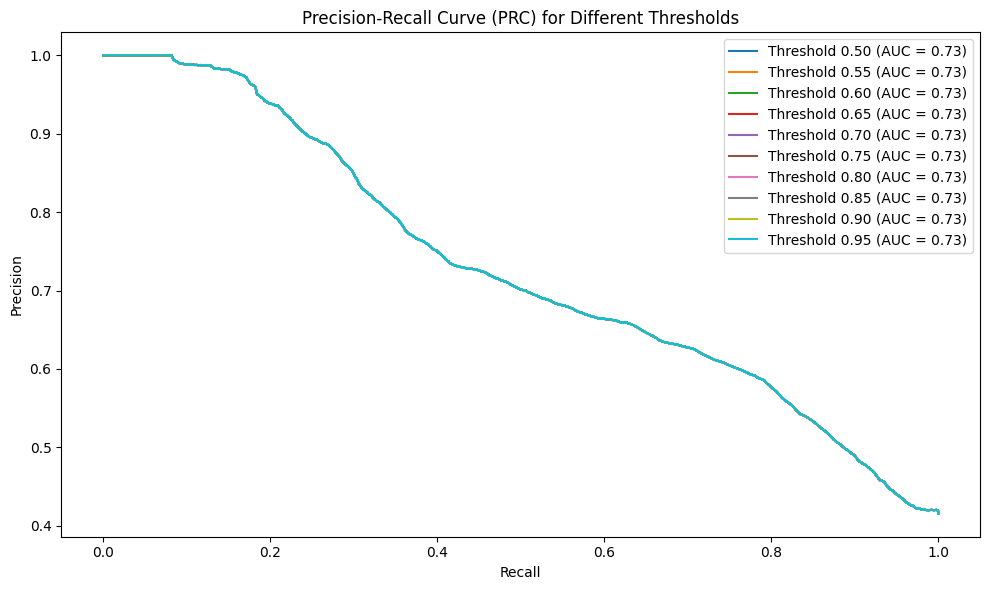

In [ ]:


# Load the data
huang_data_path = 'SingalROI_E2_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')

predictions = df_ensemble_E2['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E2['Class_Huang_E2_Range']

# Define thresholds for analysis
thresholds = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store metrics for each threshold
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Create an empty DataFrame to store the metrics for each threshold
metrics_df = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Function to calculate confusion matrix and metrics
def calculate_metrics(labels, predictions, threshold):
    cm = confusion_matrix(labels, predictions > threshold)
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calculate Precision-Recall curve and AUC
    precision_curve, recall_curve, _ = precision_recall_curve(labels, predictions)
    auc_score = auc(recall_curve, precision_curve)

    return precision, recall, f1_score, auc_score

# Loop through each threshold and calculate metrics
for threshold in thresholds:
    precision, recall, f1_score, auc_score = calculate_metrics(ground_truth, predictions, threshold)

    # Add the results to the metrics dataframe using pd.concat
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1_score],
        'AUC': [auc_score]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)

# Plot the Precision-Recall curve and include AUC in the legend
plt.figure(figsize=(10, 6))
for threshold in thresholds:
    # Get precision and recall for the current threshold
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Plot each threshold with its AUC score in the legend
    plt.plot(recall_curve, precision_curve, label=f'Threshold {threshold:.2f} (AUC = {auc_score:.2f})')

plt.title('Precision-Recall Curve (PRC) for Different Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

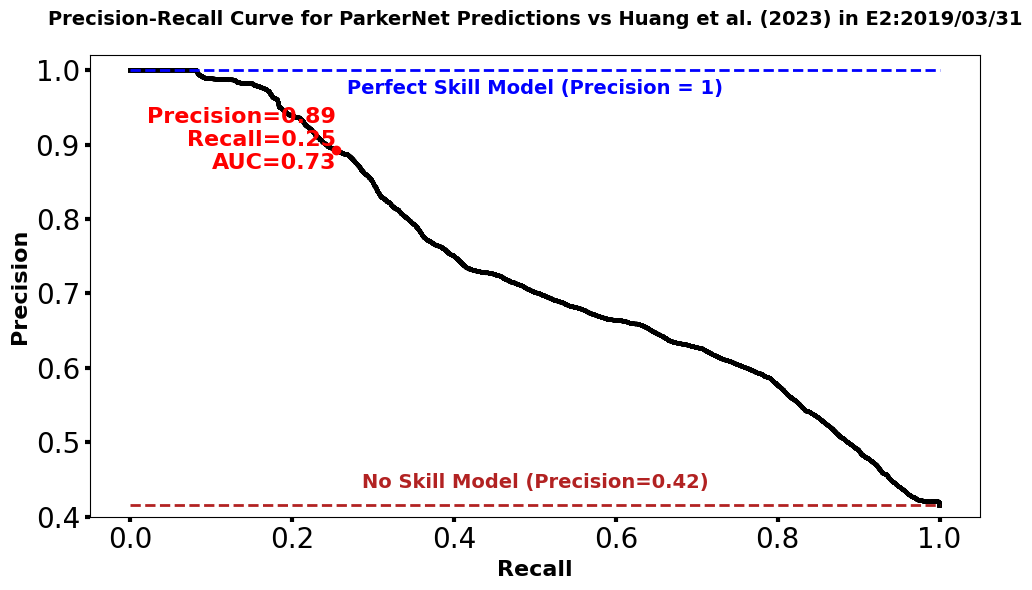

In [ ]:


# Load the data
huang_data_path = 'SingalROI_E2_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')

predictions = df_ensemble_E2['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E2['Class_Huang_E2_Range']

# Define thresholds (from 0.5 to 0.95)
thresholds = np.round(np.arange(0.5, 0.95, 0.05), 2)

# Initialize lists to store the Precision-Recall curve and AUC for each threshold
precision_dict = {}
recall_dict = {}
auc_dict = {}

# Calculate Precision-Recall curve and AUC for each threshold
for threshold in thresholds:
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Store precision, recall, and auc values for each threshold
    precision_dict[threshold] = precision_curve
    recall_dict[threshold] = recall_curve
    auc_dict[round(threshold, 2)] = auc_score  # Round threshold to two decimal places

# Plot Precision-Recall curves for all thresholds
plt.figure(figsize=(10, 6))

for threshold in thresholds:
    plt.plot(recall_dict[threshold], precision_dict[threshold], color='black', linewidth=3)

# Provided precision and recall at threshold 0.6
threshold_0_6_precision = 0.892503
threshold_0_6_recall = 0.254709

# Calculate AUC at threshold 0.6
auc_at_06 = auc_dict[0.6]  # AUC for threshold 0.6

# Plot the red dot for threshold 0.6
plt.plot(threshold_0_6_recall, threshold_0_6_precision, 'k-', label=f'Model Precision-Recall curve at 0.60 threshold')

# Calculate No Skill Model baseline
num_positives = np.sum(ground_truth == 1)
num_total = len(ground_truth)
no_skill_precision = num_positives / num_total
no_skill_recall = num_positives / num_total  # Recall is the same as the proportion of positives

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.005),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.95),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')

# Adding labels and title
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Huang et al. (2023) in E2:2019/03/31\n', fontsize=14, fontweight='bold')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(threshold_0_6_recall, threshold_0_6_precision, color='red', zorder=5)

# Add the red dot annotation for threshold 0.6
plt.annotate(f'Precision={threshold_0_6_precision:.2f}\nRecall={threshold_0_6_recall:.2f}\nAUC={auc_at_06:.2f}',
             (threshold_0_6_recall, threshold_0_6_precision),
             textcoords="offset points",
             xytext=(0,10),
             ha='right', va= 'center_baseline', fontsize=16, fontweight='bold', color='red')

# Set y-axis limits to ensure the perfect skill line is visible
plt.ylim(0.4, 1.02)
# Customize y-axis ticks to show 0.1 and 0.9
plt.yticks(np.arange(0.4, 1.02, 0.1))  # Set y-ticks from 0 to 1 with step of 0.1

# Apply the tick parameters to all axes after plotting
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks

#plt.savefig('E2_HUang_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


 (True Negatives):  86876
 (False Positives):  10678
(False Negatives):  242
 (True Positives):  1034
Precision: 0.0883
Recall: 0.8103
F1 Score: 0.1592
Total Switchbacks (Ground Truth 1):  1276
Intersection over Union (IoU): 0.0865
IoU at threshold 0.6: 0.0865


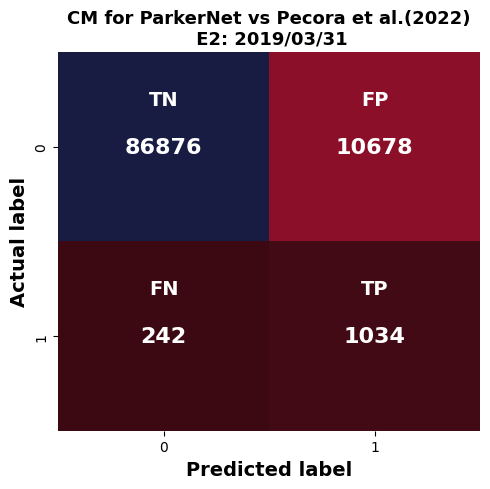

In [ ]:



pecora_data = pd.read_csv('SignalROI_E2_Pecora_10s_6hr.txt', sep='\t')
predictions = df_ensemble_E2['Weighted_Voting_AUC_PRC']

# Define threshold
threshold = 0.6

# Create a binary prediction array based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices
ground_truth_pecora = np.zeros_like(binary_predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def plot_cm_and_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)
    if np.all(cm == 0):  # Check if cm is all zeros (invalid case)
        print("Warning: Confusion matrix is all zeros!")
        return None  # Return None if confusion matrix is empty

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title(f'CM for ParkerNet vs Pecora et al.(2022)\n E2: 2019/03/31', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')

    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth_pecora, binary_predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
if iou is not None:
    print(f'IoU at threshold {threshold}: {iou:.4f}')

plt.tight_layout()
#plt.savefig('E2_Pecora_CM_1.svg', dpi=600, bbox_inches='tight')  # Save after the plot is created
plt.show()


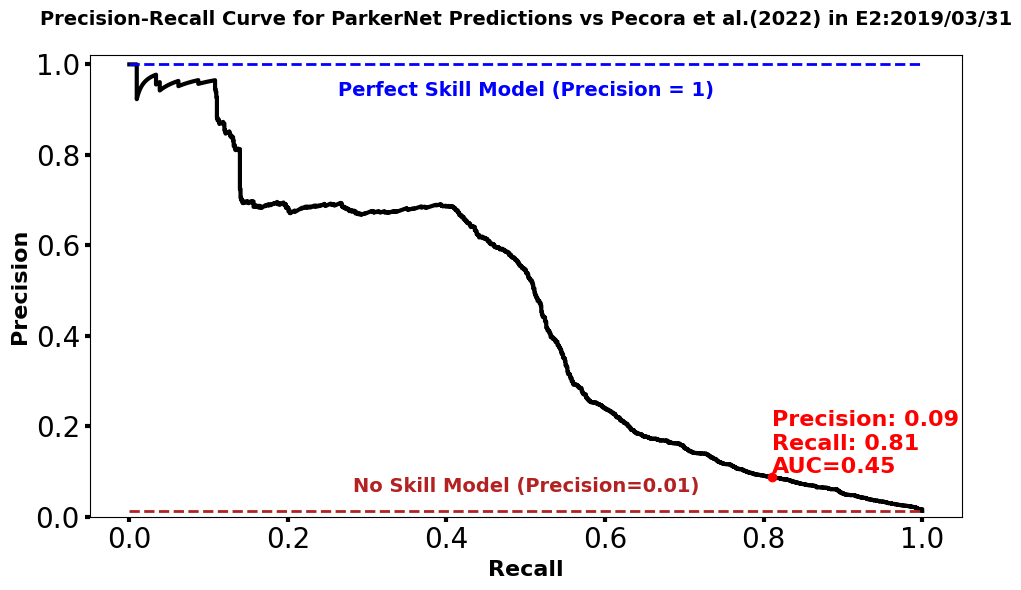

In [ ]:



pecora_data = pd.read_csv('SignalROI_E2_Pecora_10s_6hr.txt', sep='\t')
predictions = df_ensemble_E2['Weighted_Voting_AUC_PRC']

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Adjust Pecora data based on the start and end indices (10-second window)
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)

# Construct ground truth based on adjusted indices for Pecora data
ground_truth_pecora = np.zeros_like(predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Define thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize list to store metrics
metrics_list = []

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def calculate_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1_score

# Evaluate metrics at various thresholds
for threshold in thresholds:
    precision, recall, f1_score = calculate_metrics(ground_truth_pecora, predictions, threshold)
    metrics_list.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})

# Convert metrics list to dataframe
metrics_df = pd.DataFrame(metrics_list)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ground_truth_pecora, predictions)

# **Perfect Skill** line will be precision=1, recall=1 across all recall values
perfect_skill = np.ones_like(recall)

# **No Skill** line is precision = the proportion of positive samples in the ground truth
no_skill_precision = np.sum(ground_truth_pecora == 1) / len(ground_truth_pecora)  # Proportion of positive samples
no_skill = np.full_like(recall, no_skill_precision)

# AUC at threshold 0.6
threshold_06_index = np.where(thresholds >= 0.6)[0][0]
precision_at_06 = metrics_df.loc[threshold_06_index, 'Precision']
recall_at_06 = metrics_df.loc[threshold_06_index, 'Recall']
auc_at_06 = auc(recall, precision)  # Calculate AUC value

plt.figure(figsize=(10, 6))

# Plot Precision-Recall Curve
plt.plot(recall, precision, color='black', lw=3, label=f'Model Precision-Recall Curve at 0.6 threshold')

# Plot No Skill line
#plt.plot(recall, no_skill, color='#B22222', linestyle='--', lw=2, label=f'No Skill Model (Precision={no_skill_precision:.2f})')


# Plot Perfect Skill line
#plt.plot(recall, perfect_skill, color='blue', linestyle='--', lw=2, label='Perfect Skill Model (Precision = 1)')

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.01),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.9),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')


# Plot Precision and Recall values at threshold 0.6 directly on the graph
plt.text(recall_at_06, precision_at_06, f'Precision: {precision_at_06:.2f}\nRecall: {recall_at_06:.2f}\nAUC={auc_at_06:.2f}', color='red', fontsize=16, fontweight = 'bold', ha='left', va='bottom')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(recall_at_06, precision_at_06, color='red', zorder=5)

# Labels and Title
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Pecora et al.(2022) in E2:2019/03/31\n', fontsize=14, fontweight='bold')

plt.ylim(0, 1.02)
plt.yticks(np.arange(0, 1.02, 0.2))
# Display the dataframe with metrics at different thresholds
#display(metrics_df)
# Increase the size of the x and y axis tick marks
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks

#plt.savefig('E2_Pecora_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


ENCOUNTER 4

In [ ]:
# Read in the dataset for predicting (Here we us a dataset containing data from 2019/03/31)
df_E4 = pd.read_csv('PSP_E4_ForPrediction.txt', sep="\t", parse_dates=['Datetime'])

# Separate the 'Class_Huang_Ex' column into df_gt
df_gt_E4 = df_E4[['Class_Huang_E4_Range']].copy()

pd.set_option('future.no_silent_downcasting', True)
df_gt_E4['Class_Huang_E4_Range'] = df_gt_E4['Class_Huang_E4_Range'].replace({True: 1, False: 0}).infer_objects(copy=False).astype(int)
# Create df_test by dropping the 'Class_Huang_Ex' column and other columns not needed
df_test_E4 = df_E4.drop(columns=['Class_Huang_E4_Range'])

df_test_E4.pop("X_HCI")
df_test_E4.pop("Y_HCI")
df_test_E4.pop("Z_HCI")

df_test_E4.head()

Datetime        B_r       Bmag       B_t       B_n  \
0 2020-01-24 00:00:00.000000000 -54.971393  55.505030  6.204191 -4.523532   
1 2020-01-24 00:00:00.873799999 -54.983759  55.503786  5.895654 -4.764215   
2 2020-01-24 00:00:01.747599999 -54.749427  55.456405  4.600898 -7.532919   
3 2020-01-24 00:00:02.621399999 -54.775518  55.514759  5.824396 -6.899816   
4 2020-01-24 00:00:03.495199999 -55.319875  55.828496  4.752707 -5.826167   

       V_r       V_t       V_n        Vmag       V_nr  ProtonDensity  
0  290.319  -4.53130  -7.78462  290.458697   9.007385        75.6870  
1  289.983   5.93158 -27.08480  291.305527  27.726703        77.1261  
2  303.232   7.23963 -18.40840  303.876500  19.780835        64.5267  
3  287.891  12.67510  -9.14296  288.314897  15.628560        72.8868  
4  292.176   6.86250 -12.67550  292.531327  14.413959        75.1667

In [ ]:
df_gt_allpreds_E4 = pd.read_csv('ParkerNet_allModel_averaged_predictions_E4_20200124.csv')
display(df_gt_allpreds_E4)

Class_Huang_E4_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.225500              0.106970   
1                         0              0.225432              0.107076   
2                         0              0.226401              0.107031   
3                         0              0.226327              0.107098   
4                         0              0.226108              0.107092   
...                     ...                   ...                   ...   
98825                     0              0.443982              0.194014   
98826                     0              0.442554              0.194382   
98827                     0              0.442976              0.194980   
98828                     0              0.444663              0.196289   
98829                     0              0.446673              0.198469   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.392752               0.201537              0.150364   
1                  0.394596               0.201684              0.151148   
2                  0.395282               0.202159              0.151360   
3                  0.397451               0.202588              0.151330   
4                  0.399911               0.202303              0.151105   
...                     ...                    ...                   ...   
98825              0.347529               0.330143              0.367308   
98826              0.348945               0.330629              0.366183   
98827              0.349515               0.330920              0.364817   
98828              0.350982               0.330797              0.364652   
98829              0.352060               0.331061              0.365385   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.125524              0.228964              0.192794   
1                  0.125573              0.229211              0.193477   
2                  0.125634              0.228885              0.194655   
3                  0.125653              0.228664              0.194406   
4                  0.125635              0.228947              0.194935   
...                     ...                   ...                   ...   
98825              0.177201              0.314858              0.192259   
98826              0.177589              0.313551              0.192943   
98827              0.176895              0.312067              0.192952   
98828              0.177647              0.311237              0.194173   
98829              0.178925              0.311003              0.195068   

       Preds_splitM_seed641  ...  Preds_splitM_seed1843  \
0                  0.175591  ...               0.225955   
1                  0.175677  ...               0.227199   
2                  0.175807  ...               0.227522   
3                  0.175987  ...               0.228092   
4                  0.175625  ...               0.227937   
...                     ...  ...                    ...   
98825              0.157163  ...               0.271401   
98826              0.157315  ...               0.270863   
98827              0.158103  ...               0.270642   
98828              0.158330  ...               0.270328   
98829              0.158124  ...               0.271058   

       Preds_splitM_seed2221  Preds_splitM_seed3060  Preds_splitM_seed3247  \
0                   0.153370               0.119323               0.159710   
1                   0.153815               0.119333               0.159651   
2                   0.153916               0.119152               0.159745   
3                   0.153853               0.119182               0.159857   
4                   0.153865               0.119128               0.159541   
...                      ...                    ...                    ...   
98825               0.512314         

In [ ]:
df_test_E4.reset_index(drop=True, inplace=True)
df_gt_allpreds_E4.reset_index(drop=True, inplace=True)
df_ensemble_E4 = pd.concat([df_gt_allpreds_E4, df_test_E4], axis=1, join='inner')
display(df_ensemble_E4)

Class_Huang_E4_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.225500              0.106970   
1                         0              0.225432              0.107076   
2                         0              0.226401              0.107031   
3                         0              0.226327              0.107098   
4                         0              0.226108              0.107092   
...                     ...                   ...                   ...   
98825                     0              0.443982              0.194014   
98826                     0              0.442554              0.194382   
98827                     0              0.442976              0.194980   
98828                     0              0.444663              0.196289   
98829                     0              0.446673              0.198469   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.392752               0.201537              0.150364   
1                  0.394596               0.201684              0.151148   
2                  0.395282               0.202159              0.151360   
3                  0.397451               0.202588              0.151330   
4                  0.399911               0.202303              0.151105   
...                     ...                    ...                   ...   
98825              0.347529               0.330143              0.367308   
98826              0.348945               0.330629              0.366183   
98827              0.349515               0.330920              0.364817   
98828              0.350982               0.330797              0.364652   
98829              0.352060               0.331061              0.365385   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.125524              0.228964              0.192794   
1                  0.125573              0.229211              0.193477   
2                  0.125634              0.228885              0.194655   
3                  0.125653              0.228664              0.194406   
4                  0.125635              0.228947              0.194935   
...                     ...                   ...                   ...   
98825              0.177201              0.314858              0.192259   
98826              0.177589              0.313551              0.192943   
98827              0.176895              0.312067              0.192952   
98828              0.177647              0.311237              0.194173   
98829              0.178925              0.311003              0.195068   

       Preds_splitM_seed641  ...        B_r       Bmag       B_t        B_n  \
0                  0.175591  ... -54.971393  55.505030  6.204191  -4.523532   
1                  0.175677  ... -54.983759  55.503786  5.895654  -4.764215   
2                  0.175807  ... -54.749427  55.456405  4.600898  -7.532919   
3                  0.175987  ... -54.775518  55.514759  5.824396  -6.899816   
4                  0.175625  ... -55.319875  55.828496  4.752707  -5.826167   
...                     ...  ...        ...        ...       ...        ...   
98825              0.157163  ... -51.253870  60.103443  4.883095  31.010000   
98826              0.157315  ... -50.694612  59.782689  4.016715  31.430753   
98827              0.158103  ... -50.743110  60.242408  3.893364  32.235480   
98828              0.158330  ... -52.059228  60.190377  8.101530  29.104699   
98829              0.158124  ... -53.632022  59.664765  2.417074  26.031676   

           V_r       V_t       V_n        Vmag       V_nr  ProtonDensity  
0      290.319  -4.53130  -7.78462  290.458697   9.007385        75.6870  
1      289.983   5.93158 -27.08480  291.305527  27.726703        77.1261  
2      303.232   7.23963 -18.40840  303.876500  19.780835        64.5267  
3      287.891  12.67510  -9.14296  288.314

In [ ]:
df_ensemble_E4['prediction_0.6'] = (df_ensemble_E4['Weighted_Voting_AUC_PRC'] > 0.6).astype(int)
df_ensemble_E4.to_csv('predictions_E4.csv', index=False)

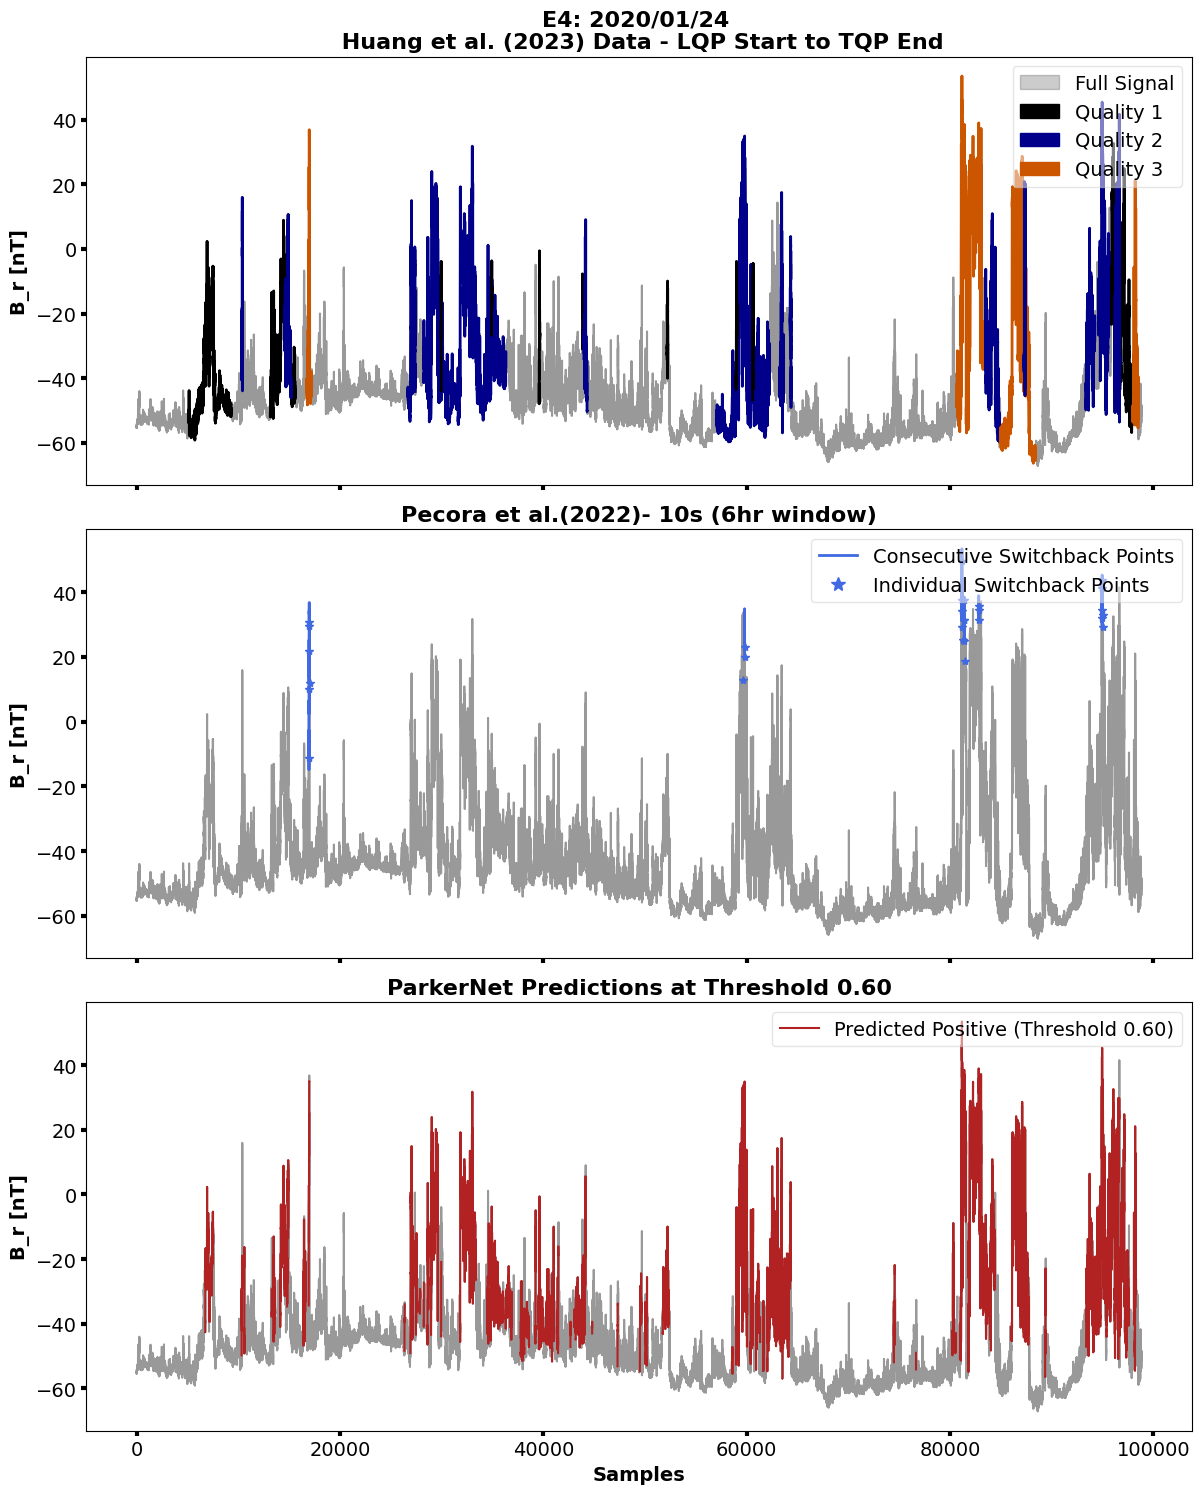

In [ ]:


roi_data = pd.read_csv('SingalROI_E4_Huang_allRegions.txt', sep='\t')


signal_data = df_ensemble_E4['B_r']
predictions = df_ensemble_E4['Weighted_Voting_AUC_PRC']

# Define the threshold (set to 0.6)
threshold = 0.6

# Define a color map for quality levels
quality_colors = {
    1: 'black',
    2: '#00008B',  # Dark Blue for Quality 1
    3: '#CC5500',  # Burnt Orange for Quality 2
    4: '#8B0000',  # Red Brown for Quality 3
    5: '#8B4513'   # Red Brown for Quality 4
}

# Load the Pecora data 10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E4_Pecora_10s_6hr.txt', sep='\t')

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds
# Create binary mask for predictions based on the threshold
binary_predictions = (predictions > threshold).astype(int)


# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Perform DBSCAN clustering on the start indices
indices = pecora_data['start_index'].values.reshape(-1, 1)  # Reshape for DBSCAN
db = DBSCAN(eps=15, min_samples=2)  # Adjust parameters as needed
labels = db.fit_predict(indices)

# Initialize clusters list
clusters = []

# Group indices by cluster labels
for label in np.unique(labels):
    if label != -1:  # Skip noise
        cluster_indices = indices[labels == label].flatten()
        start_index = int(cluster_indices[0])
        end_index = int(cluster_indices[-1])
        clusters.append((start_index, end_index))

# Create a figure with three subplots (top, middle, bottom)
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})
# --- Top Subplot: Full Ground Truth Switchbacks (LQP Start to TQP End) for Huang ---
axs[0].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Track legend patches in defined order
legend_patches = [mpatches.Patch(color='black', alpha=0.2, label='Full Signal')]
added_qualities = set()  # Track added quality levels to avoid duplicates

# Plot each switchback (from LQP Start to TQP End) with color based on quality
for _, row in roi_data.iterrows():
    quality_flag = row['QualityFlag']
    color = quality_colors.get(quality_flag, 'gray')  # Default to gray if the quality level is unknown

    # Define start and end points of the full ground truth switchback
    switchback_start = row['LQP_Start_Index']
    switchback_end = row['TQP_End_Index']

    # Plot the full ground truth switchback as a solid line
    axs[0].plot(range(switchback_start, switchback_end), signal_data[switchback_start:switchback_end], color=color, linewidth=2)

    # Add switchback region to legend if not already added
    if quality_flag not in added_qualities:
        legend_patches.append(mpatches.Patch(color=color, label=f'Quality {quality_flag}'))
        added_qualities.add(quality_flag)

# Sort the legend patches to display qualities in ascending order
legend_patches = [legend_patches[0]] + sorted(legend_patches[1:], key=lambda x: int(x.get_label().split()[-1]))

# Add legend for the top plot
axs[0].legend(handles=legend_patches, loc='upper right', fontsize=14,framealpha=0.5)
axs[0].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[0].set_title('E4: 2020/01/24 \n Huang et al. (2023) Data - LQP Start to TQP End', fontsize=16, fontweight='bold')

# --- Middle Subplot: Pecora Data (Sparse Points and DBSCAN Segments) ---
axs[1].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Plot sparse points as asterisks
sparse_points_color = '#4169E1'  # Royal Blue
for _, row in pecora_data.iterrows():
    start_idx = int(row['start_index'])
    axs[1].plot(start_idx, signal_data[start_idx], marker='*', color=sparse_points_color)

# Plot clustered segments
for start_idx, end_idx in clusters:
    axs[1].plot(range(start_idx, end_idx), signal_data[start_idx:end_idx], color=sparse_points_color, linewidth=2)

# Add legend for Pecora data
pecora_line = Line2D([0], [0], color=sparse_points_color, lw=2, label='Consecutive Switchback Points')
sparse_asterisk = Line2D([0], [0], color=sparse_points_color, marker='*', linestyle='None', markersize=10, label='Individual Switchback Points')
axs[1].legend(handles=[pecora_line, sparse_asterisk], loc='upper right', fontsize=14, framealpha=0.5)

axs[1].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[1].set_title('Pecora et al.(2022)- 10s (6hr window)', fontsize=16, fontweight='bold')

# --- Bottom Subplot: Model Predictions ---
model_prediction_line = signal_data.copy()
model_prediction_line[binary_predictions == 0] = np.nan  # Mask out negative predictions
model_prediction_color = '#B22222'
axs[2].plot(signal_data, color='black', alpha=0.4)
axs[2].plot(model_prediction_line, color=model_prediction_color, linewidth=1.5, label=f'Predicted Positive (Threshold {threshold:.2f})')

axs[2].set_xlabel('Samples', fontsize=14, fontweight='bold')
axs[2].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[2].set_title(f'ParkerNet Predictions at Threshold {threshold:.2f}', fontsize=16, fontweight='bold')
axs[2].legend(loc='upper right', fontsize=14, framealpha=0.5)

# Adjust layout and show the plot for Pecora and Model Predictions
plt.tight_layout()
# Apply tick parameters to all axes after plotting
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, width=3)  # x-axis ticks
    ax.tick_params(axis='y', labelsize=14, width=3)  # y-axis ticks

#plt.savefig('E4_preds_DBSCAN.svg', dpi=600, bbox_inches='tight')
plt.show()

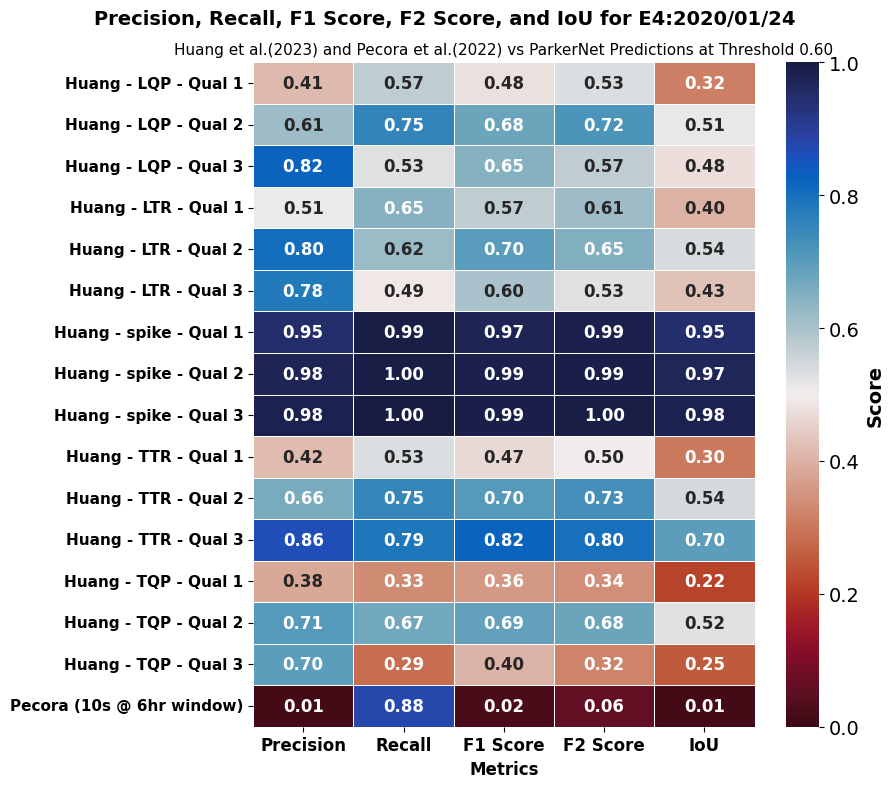

In [ ]:

huang_data_path = 'SingalROI_E4_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')

predictions = df_ensemble_E4['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E4['Class_Huang_E4_Range']

# Define threshold
threshold = 0.6

# Define regions for Huang ground truths
regions = {
    "LQP": ("LQP_Start_Index", "LQP_End_Index"),
    "LTR": ("LQP_End_Index", "spike_Start_Index"),
    "spike": ("spike_Start_Index", "spike_End_Index"),
    "TTR": ("spike_End_Index", "TQP_Start_Index"),
    "TQP": ("TQP_Start_Index", "TQP_End_Index")
}

# Initialize lists to store Precision, Recall, F1, F2, and IoU values for the heatmap
heatmap_data = []
row_labels = []

# Loop through regions and quality flags for Huang data
for region, (start_col, end_col) in regions.items():
    for quality in sorted(roi_data['QualityFlag'].unique()):
        row_labels.append(f"Huang - {region} - Qual {quality}")
        row_data = []

        # Filter quality rows for the current region and quality
        quality_rows = roi_data[roi_data['QualityFlag'] == quality]
        ground_truth_segment = []

        # Construct ground truth and predictions for the current region and quality
        for _, row in quality_rows.iterrows():
            start, end = row[start_col], row[end_col]
            gt_segment = ground_truth[start:end].values  # Get the ground truth for the segment
            pred_segment = (predictions[start:end] >= threshold).astype(int).values  # Get the predicted values
            ground_truth_segment.extend(gt_segment)
            ground_truth_segment.extend(pred_segment)

        # Calculate confusion matrix
        cm = confusion_matrix(ground_truth_segment[:len(ground_truth_segment)//2], ground_truth_segment[len(ground_truth_segment)//2:])

        # Get TP, FP, FN
        TN, FP, FN, TP = cm.ravel()

        # Calculate Precision, Recall, F1, and F2 for the current region and quality
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        F1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        F2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0

        # Calculate IoU for the current region and quality
        iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0

        # Append Precision, Recall, F1, F2, IoU results for the current region and quality
        row_data.extend([precision, recall, F1_score, F2_score, iou])

        # Append the data for the current region and quality
        heatmap_data.append(row_data)



#Load Pecora d10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E4_Pecora_10s_6hr.txt', sep = '\t')
# Assuming df_ensemble_E4 contains model predictions
predictions_pecora = df_ensemble_E4['Weighted_Voting_AUC_PRC']

# Create binary predictions based on threshold for Pecora data
binary_predictions_pecora = (predictions_pecora >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices for Pecora (10 seconds)
ground_truth_pecora = np.zeros_like(binary_predictions_pecora)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Calculate Precision, Recall, F1, F2, and IoU for Pecora data (as one whole segment)
cm_pecora = confusion_matrix(ground_truth_pecora, binary_predictions_pecora)
TN_pecora, FP_pecora, FN_pecora, TP_pecora = cm_pecora.ravel()  # Get confusion matrix values

# Calculate Precision, Recall, F1, and F2 for Pecora (single value)
precision_pecora = TP_pecora / (TP_pecora + FP_pecora) if (TP_pecora + FP_pecora) != 0 else 0
recall_pecora = TP_pecora / (TP_pecora + FN_pecora) if (TP_pecora + FN_pecora) != 0 else 0
F1_score_pecora = (2 * precision_pecora * recall_pecora) / (precision_pecora + recall_pecora) if (precision_pecora + recall_pecora) != 0 else 0
F2_score_pecora = (5 * precision_pecora * recall_pecora) / (4 * precision_pecora + recall_pecora) if (4 * precision_pecora + recall_pecora) != 0 else 0

# Calculate IoU for Pecora
iou_pecora = TP_pecora / (TP_pecora + FP_pecora + FN_pecora) if (TP_pecora + FP_pecora + FN_pecora) != 0 else 0

# Append Pecora Precision, Recall, F1, F2, IoU to heatmap data
row_labels.append("Pecora (10s @ 6hr window)")
heatmap_data.append([precision_pecora, recall_pecora, F1_score_pecora, F2_score_pecora, iou_pecora])

# Convert heatmap data to DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["Precision", "Recall", "F1 Score", "F2 Score", "IoU"])

# Plot combined heatmap for Precision, Recall, F1, F2, and IoU (including Huang and Pecora)
fig, ax = plt.subplots(figsize=(9, 8))  # Adjust figure size for better readability

sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="pyart_balance_r", cbar_kws={'label': 'Score'},
            annot_kws={"weight": "bold", "size": 12},  # Make annotation bold
            linewidths=0.5,  # Optional: thin line between cells
            cbar=True, vmin=0, vmax=1, ax=ax)  # Set color scale to go from 0 to 1

# Title and labels in bold with line breaks for title
plt.suptitle("Precision, Recall, F1 Score, F2 Score, and IoU for E4:2020/01/24", fontsize=14, fontweight='bold', y=0.98)
ax.set_title("Huang et al.(2023) and Pecora et al.(2022) vs ParkerNet Predictions at Threshold 0.60", fontsize=11, fontweight='normal', loc='center')

# Set xlabel with bold font
ax.set_xlabel("Metrics", fontsize=12, fontweight='bold')

# Make the y-axis labels bold and adjust font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')

# Make the legend label bold
cbar = ax.collections[0].colorbar
cbar.set_label('Score', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=12, fontweight = 'bold')
# Adjust layout to ensure everything fits without excessive width

plt.tight_layout()
#plt.savefig('E4_heatmap_1.svg', dpi=600, bbox_inches='tight')
plt.show()


 (True Negatives):  58549
 (False Positives):  6251
(False Negatives):  18102
 (True Positives):  15928
Precision: 0.7182
Recall: 0.4681
F1 Score: 0.5667
Total Switchbacks (Ground Truth 1):  34030
Intersection over Union (IoU): 0.3954


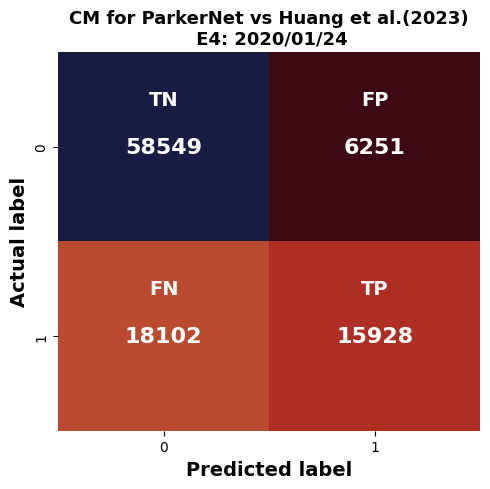

IoU at threshold 0.6: 0.3954


In [ ]:


huang_data_path = 'SingalROI_E4_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E4['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E4['Class_Huang_E4_Range']

# Define threshold
threshold = 0.6

# Confusion Matrix Function
def plot_cm_and_metrics(labels, predictions, threshold=0.6):
    # Compute the confusion matrix
    cm = confusion_matrix(labels, predictions > threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title('CM for ParkerNet vs Huang et al.(2023)\n E4: 2020/01/24', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')
    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()

    # Position the labels slightly above the center of each section
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    # Show the plot
    plt.savefig('E4_Huang_CM.svg', dpi=600, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth, predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
print(f'IoU at threshold {threshold}: {iou:.4f}')

<ipython-input-75-bee8519d50ea>:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


   Threshold  Precision    Recall  F1 Score       AUC
0       0.50   0.658133  0.550720  0.599654  0.685741
1       0.55   0.688134  0.510550  0.586187  0.685741
2       0.60   0.718157  0.468058  0.566742  0.685741
3       0.65   0.747834  0.415957  0.534575  0.685741
4       0.70   0.785690  0.339788  0.474409  0.685741
5       0.75   0.852371  0.271466  0.411786  0.685741
6       0.80   0.920063  0.153894  0.263683  0.685741
7       0.85   0.000000  0.000000  0.000000  0.685741
8       0.90   0.000000  0.000000  0.000000  0.685741
9       0.95   0.000000  0.000000  0.000000  0.685741


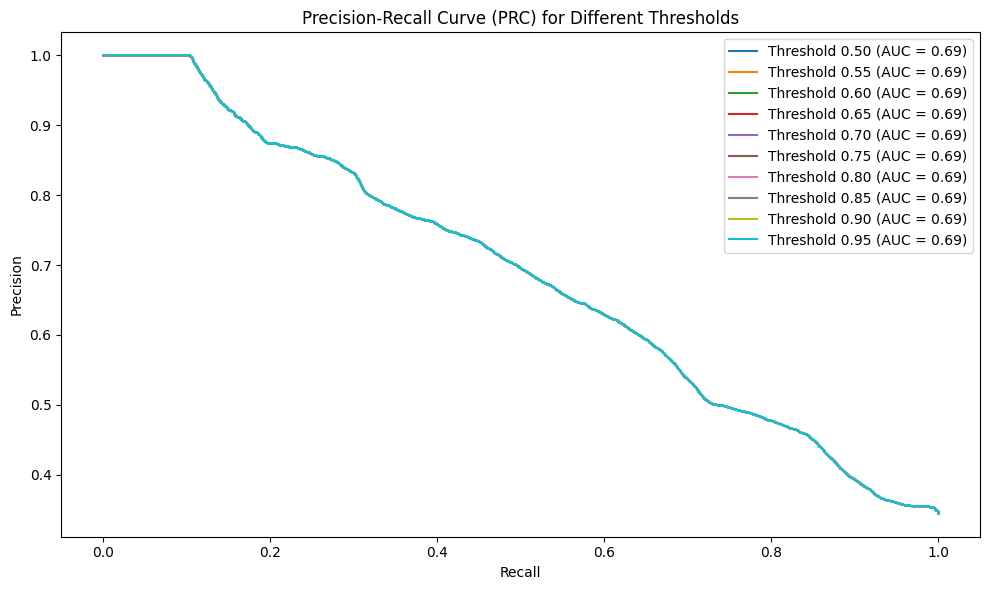

In [ ]:



huang_data_path = 'SingalROI_E4_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E4['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E4['Class_Huang_E4_Range']

# Define thresholds for analysis
thresholds = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store metrics for each threshold
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Create an empty DataFrame to store the metrics for each threshold
metrics_df = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Function to calculate confusion matrix and metrics
def calculate_metrics(labels, predictions, threshold):
    cm = confusion_matrix(labels, predictions > threshold)
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calculate Precision-Recall curve and AUC
    precision_curve, recall_curve, _ = precision_recall_curve(labels, predictions)
    auc_score = auc(recall_curve, precision_curve)

    return precision, recall, f1_score, auc_score

# Loop through each threshold and calculate metrics
for threshold in thresholds:
    precision, recall, f1_score, auc_score = calculate_metrics(ground_truth, predictions, threshold)

    # Add the results to the metrics dataframe using pd.concat
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1_score],
        'AUC': [auc_score]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)

# Plot the Precision-Recall curve and include AUC in the legend
plt.figure(figsize=(10, 6))
for threshold in thresholds:
    # Get precision and recall for the current threshold
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Plot each threshold with its AUC score in the legend
    plt.plot(recall_curve, precision_curve, label=f'Threshold {threshold:.2f} (AUC = {auc_score:.2f})')

plt.title('Precision-Recall Curve (PRC) for Different Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

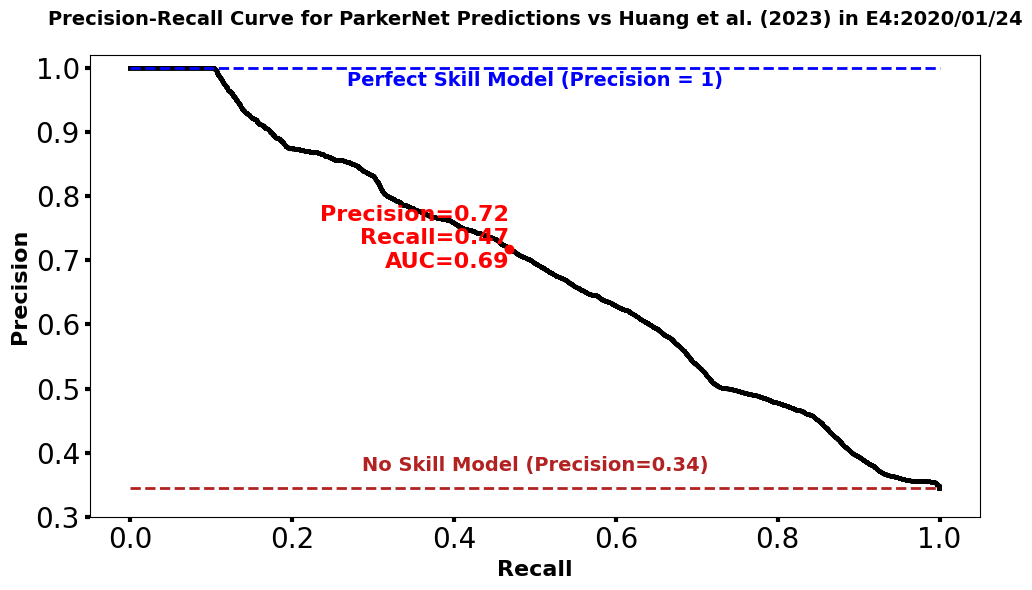

In [ ]:


huang_data_path = 'SingalROI_E4_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E4['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E4['Class_Huang_E4_Range']

# Define thresholds (from 0.5 to 0.95)
thresholds = np.round(np.arange(0.5, 0.95, 0.05), 2)

# Initialize lists to store the Precision-Recall curve and AUC for each threshold
precision_dict = {}
recall_dict = {}
auc_dict = {}

# Calculate Precision-Recall curve and AUC for each threshold
for threshold in thresholds:
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Store precision, recall, and auc values for each threshold
    precision_dict[threshold] = precision_curve
    recall_dict[threshold] = recall_curve
    auc_dict[round(threshold, 2)] = auc_score  # Round threshold to two decimal places

# Plot Precision-Recall curves for all thresholds
plt.figure(figsize=(10, 6))

for threshold in thresholds:
    plt.plot(recall_dict[threshold], precision_dict[threshold], color='black', linewidth=3)

# Provided precision and recall at threshold 0.6
threshold_0_6_precision = 0.718157
threshold_0_6_recall =  0.468058

# Calculate AUC at threshold 0.6
auc_at_06 = auc_dict[0.6]  # AUC for threshold 0.6

# Plot the red dot for threshold 0.6
plt.plot(threshold_0_6_recall, threshold_0_6_precision, 'k-', label=f'Model Precision-Recall curve at 0.60 threshold')

# Calculate No Skill Model baseline
num_positives = np.sum(ground_truth == 1)
num_total = len(ground_truth)
no_skill_precision = num_positives / num_total
no_skill_recall = num_positives / num_total  # Recall is the same as the proportion of positives

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.005),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.95),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')

# Adding labels and title
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Huang et al. (2023) in E4:2020/01/24\n', fontsize=14, fontweight='bold')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(threshold_0_6_recall, threshold_0_6_precision, color='red', zorder=5)

# Add the red dot annotation for threshold 0.6
plt.annotate(f'Precision={threshold_0_6_precision:.2f}\nRecall={threshold_0_6_recall:.2f}\nAUC={auc_at_06:.2f}',
             (threshold_0_6_recall, threshold_0_6_precision),
             textcoords="offset points",
             xytext=(0,10),
             ha='right', va= 'center_baseline', fontsize=16, fontweight='bold', color='red')

# Set y-axis limits to ensure the perfect skill line is visible
plt.ylim(0.3, 1.02)
# Customize y-axis ticks to show 0.1 and 0.9
plt.yticks(np.arange(0.3, 1.02, 0.1))  # Set y-ticks from 0 to 1 with step of 0.1

# Apply the tick parameters to all axes after plotting
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks


#plt.savefig('E4_Huang_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


 (True Negatives):  76612
 (False Positives):  21899
(False Negatives):  39
 (True Positives):  280
Precision: 0.0126
Recall: 0.8777
F1 Score: 0.0249
Total Switchbacks (Ground Truth 1):  319
Intersection over Union (IoU): 0.0126
IoU at threshold 0.6: 0.0126


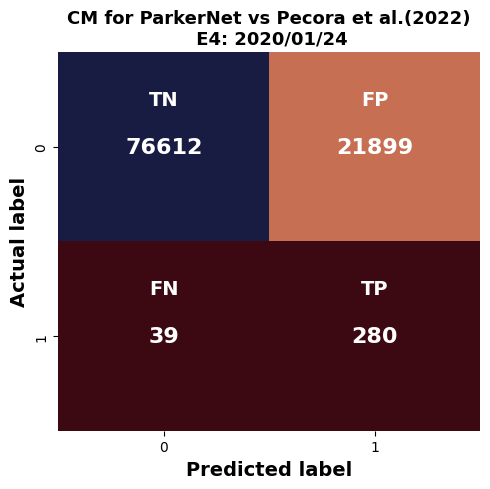

In [ ]:



pecora_data = pd.read_csv('SignalROI_E4_Pecora_10s_6hr.txt', sep='\t')  # Pecora data

predictions = df_ensemble_E4['Weighted_Voting_AUC_PRC']

# Define threshold
threshold = 0.6

# Create a binary prediction array based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices
ground_truth_pecora = np.zeros_like(binary_predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def plot_cm_and_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)
    if np.all(cm == 0):  # Check if cm is all zeros (invalid case)
        print("Warning: Confusion matrix is all zeros!")
        return None  # Return None if confusion matrix is empty

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title(f'CM for ParkerNet vs Pecora et al.(2022)\n E4: 2020/01/24', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')

    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth_pecora, binary_predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
if iou is not None:
    print(f'IoU at threshold {threshold}: {iou:.4f}')

# Show the plot
plt.tight_layout()
plt.savefig('E4_Pecora_CM_1.svg', dpi=600, bbox_inches='tight')  # Save after the plot is created
plt.show()


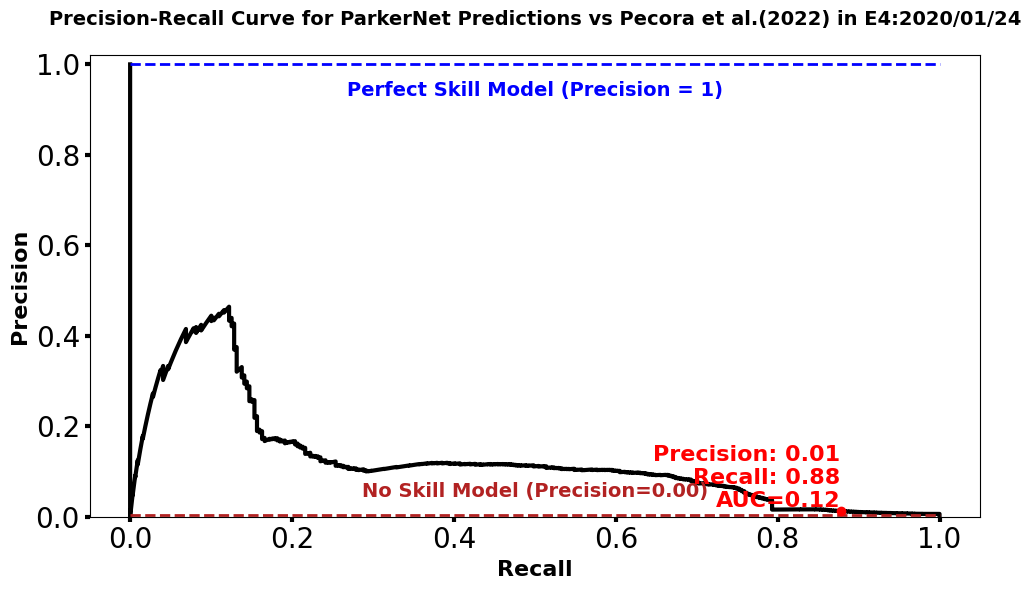

In [ ]:



pecora_data = pd.read_csv('SignalROI_E4_Pecora_10s_6hr.txt', sep='\t')  # Pecora data
predictions = df_ensemble_E4['Weighted_Voting_AUC_PRC']

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Adjust Pecora data based on the start and end indices (10-second window)
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)

# Construct ground truth based on adjusted indices for Pecora data
ground_truth_pecora = np.zeros_like(predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Define thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize list to store metrics
metrics_list = []

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def calculate_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1_score

# Evaluate metrics at various thresholds
for threshold in thresholds:
    precision, recall, f1_score = calculate_metrics(ground_truth_pecora, predictions, threshold)
    metrics_list.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})

# Convert metrics list to dataframe
metrics_df = pd.DataFrame(metrics_list)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ground_truth_pecora, predictions)

# **Perfect Skill** line will be precision=1, recall=1 across all recall values
perfect_skill = np.ones_like(recall)

# **No Skill** line is precision = the proportion of positive samples in the ground truth
no_skill_precision = np.sum(ground_truth_pecora == 1) / len(ground_truth_pecora)  # Proportion of positive samples
no_skill = np.full_like(recall, no_skill_precision)

# AUC at threshold 0.6
threshold_06_index = np.where(thresholds >= 0.6)[0][0]
precision_at_06 = metrics_df.loc[threshold_06_index, 'Precision']
recall_at_06 = metrics_df.loc[threshold_06_index, 'Recall']
auc_at_06 = auc(recall, precision)  # Calculate AUC value

plt.figure(figsize=(10, 6))

# Plot Precision-Recall Curve
plt.plot(recall, precision, color='black', lw=3, label=f'Model Precision-Recall Curve at 0.6 threshold')


# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.01),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.9),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')


# Plot Precision and Recall values at threshold 0.6 directly on the graph
plt.text(recall_at_06, precision_at_06, f'Precision: {precision_at_06:.2f}\nRecall: {recall_at_06:.2f}\nAUC={auc_at_06:.2f}', color='red', fontsize=16, fontweight = 'bold', ha='right', va='bottom')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(recall_at_06, precision_at_06, color='red', zorder=5)

# Labels and Title
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Pecora et al.(2022) in E4:2020/01/24\n', fontsize=14, fontweight='bold')

plt.ylim(0, 1.02)
plt.yticks(np.arange(0, 1.02, 0.2))
# Display the dataframe with metrics at different thresholds
#display(metrics_df)
# Increase the size of the x and y axis tick marks
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks
#
plt.savefig('E4_Pecora_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


ENCOUNTER 5

In [ ]:
# Read in the dataset for predicting (provided as PSP_EX_yyyymmdd.txt)
df_E5 = pd.read_csv('PSP_E5_ForPrediction.txt', sep="\t", parse_dates=['Datetime'])

# Separate the 'Class_Huang_Ex' column into df_gt
df_gt_E5 = df_E5[['Class_Huang_E5_Range']].copy()

pd.set_option('future.no_silent_downcasting', True)
df_gt_E5['Class_Huang_E5_Range'] = df_gt_E5['Class_Huang_E5_Range'].replace({True: 1, False: 0}).infer_objects(copy=False).astype(int)
# Create df_test by dropping the 'Class_Huang_Ex' column and other columns not needed
df_test_E5= df_E5.drop(columns=['Class_Huang_E5_Range'])

df_test_E5.pop("X_HCI")
df_test_E5.pop("Y_HCI")
df_test_E5.pop("Z_HCI")

display(df_test_E5)

Datetime        B_r       Bmag       B_t  \
0     2020-06-02 00:00:00.000000000 -27.592036  29.318841  1.956524   
1     2020-06-02 00:00:00.873799999 -27.443860  28.840827  2.098728   
2     2020-06-02 00:00:01.747599999 -26.108516  28.161881  0.811848   
3     2020-06-02 00:00:02.621399999 -26.550831  28.078335  1.747833   
4     2020-06-02 00:00:03.495199999 -24.769987  26.692135  1.405073   
...                             ...        ...        ...       ...   
98875 2020-06-02 23:59:56.974996393 -40.309145  40.570341 -4.493635   
98876 2020-06-02 23:59:57.848796393 -40.228346  40.841325 -7.016675   
98877 2020-06-02 23:59:58.722596393 -39.698305  40.351528 -6.809375   
98878 2020-06-02 23:59:59.596396393 -39.985005  40.647352 -7.278989   
98879 2020-06-03 00:00:00.470196393 -39.729068  40.364970 -7.102817   

             B_n      V_r      V_t        V_n        Vmag       V_nr  \
0       9.718333  311.194 -48.0702  -0.768381  314.885757  48.076341   
1       8.615290  311.553 -46.0696   7.363930  315.026836  46.654426   
2      10.525106  311.553 -46.0696   7.363930  315.026836  46.654426   
3       8.966119  312.886 -12.2667  -8.105480  313.231256  14.702746   
4       9.845992  318.381 -23.2815  12.811000  319.488045  26.573482   
...          ...      ...      ...        ...         ...        ...   
98875   0.965746  328.089  19.2629  -9.276990  328.784905  21.380408   
98876   0.678428  327.969  22.0974 -20.759900  329.367475  30.319442   
98877   2.433682  329.315  14.9919 -10.163800  329.812718  18.112424   
98878   0.650318  329.102  29.4088  -7.310450  330.494246  30.303798   
98879   0.694241  329.102  29.4088  -7.310450  330.494246  30.303798   

       ProtonDensity  
0            183.734  
1            186.180  
2            186.180  
3            182.125  
4            178.699  
...              ...  
98875        170.089  
98876        170.406  
98877        188.329  
98878        154.547  
98879        154.547  

[98880 rows x 11 columns]

In [ ]:
df_gt_allpreds_E5 = pd.read_csv('ParkerNet_allModel_averaged_predictions_E5_20200602.csv')
display(df_gt_allpreds_E5)

Class_Huang_E5_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.570763              0.232343   
1                         0              0.581264              0.231433   
2                         0              0.585416              0.230878   
3                         0              0.582163              0.231016   
4                         0              0.592827              0.233985   
...                     ...                   ...                   ...   
98825                     0              0.273166              0.339677   
98826                     0              0.273329              0.337241   
98827                     0              0.273511              0.339482   
98828                     0              0.273603              0.342966   
98829                     0              0.273618              0.346273   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.485112               0.218837              0.181074   
1                  0.486383               0.220744              0.181846   
2                  0.489951               0.220401              0.181252   
3                  0.487332               0.220603              0.181804   
4                  0.484828               0.222116              0.181310   
...                     ...                    ...                   ...   
98825              0.424618               0.240860              0.344644   
98826              0.423686               0.241588              0.344217   
98827              0.421830               0.241563              0.343308   
98828              0.421230               0.242303              0.342296   
98829              0.422381               0.242013              0.341147   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.279574              0.283530              0.359763   
1                  0.283924              0.283317              0.364633   
2                  0.287227              0.285218              0.362337   
3                  0.289521              0.286117              0.357625   
4                  0.296338              0.284956              0.358371   
...                     ...                   ...                   ...   
98825              0.194452              0.341054              0.235415   
98826              0.193519              0.340889              0.235549   
98827              0.193554              0.340425              0.235538   
98828              0.194399              0.340445              0.234805   
98829              0.194755              0.339490              0.234149   

       Preds_splitM_seed641  ...  Preds_splitM_seed1843  \
0                  0.256038  ...               0.420954   
1                  0.254886  ...               0.420197   
2                  0.250931  ...               0.421066   
3                  0.250020  ...               0.419594   
4                  0.247371  ...               0.416350   
...                     ...  ...                    ...   
98825              0.204123  ...               0.530829   
98826              0.204281  ...               0.529474   
98827              0.204569  ...               0.527778   
98828              0.204437  ...               0.526034   
98829              0.204346  ...               0.525633   

       Preds_splitM_seed2221  Preds_splitM_seed3060  Preds_splitM_seed3247  \
0                   0.204374               0.213345               0.252535   
1                   0.205000               0.216166               0.257802   
2                   0.207847               0.214420               0.258340   
3                   0.206610               0.218909               0.261824   
4                   0.205214               0.222505               0.265832   
...                      ...                    ...                    ...   
98825               0.209715         

In [ ]:
df_test_E5.reset_index(drop=True, inplace=True)
df_gt_allpreds_E5.reset_index(drop=True, inplace=True)
df_ensemble_E5 = pd.concat([df_gt_allpreds_E5, df_test_E5], axis=1, join='inner')
display(df_ensemble_E5)

Class_Huang_E5_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.570763              0.232343   
1                         0              0.581264              0.231433   
2                         0              0.585416              0.230878   
3                         0              0.582163              0.231016   
4                         0              0.592827              0.233985   
...                     ...                   ...                   ...   
98825                     0              0.273166              0.339677   
98826                     0              0.273329              0.337241   
98827                     0              0.273511              0.339482   
98828                     0              0.273603              0.342966   
98829                     0              0.273618              0.346273   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.485112               0.218837              0.181074   
1                  0.486383               0.220744              0.181846   
2                  0.489951               0.220401              0.181252   
3                  0.487332               0.220603              0.181804   
4                  0.484828               0.222116              0.181310   
...                     ...                    ...                   ...   
98825              0.424618               0.240860              0.344644   
98826              0.423686               0.241588              0.344217   
98827              0.421830               0.241563              0.343308   
98828              0.421230               0.242303              0.342296   
98829              0.422381               0.242013              0.341147   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.279574              0.283530              0.359763   
1                  0.283924              0.283317              0.364633   
2                  0.287227              0.285218              0.362337   
3                  0.289521              0.286117              0.357625   
4                  0.296338              0.284956              0.358371   
...                     ...                   ...                   ...   
98825              0.194452              0.341054              0.235415   
98826              0.193519              0.340889              0.235549   
98827              0.193554              0.340425              0.235538   
98828              0.194399              0.340445              0.234805   
98829              0.194755              0.339490              0.234149   

       Preds_splitM_seed641  ...        B_r       Bmag       B_t        B_n  \
0                  0.256038  ... -27.592036  29.318841  1.956524   9.718333   
1                  0.254886  ... -27.443860  28.840827  2.098728   8.615290   
2                  0.250931  ... -26.108516  28.161881  0.811848  10.525106   
3                  0.250020  ... -26.550831  28.078335  1.747833   8.966119   
4                  0.247371  ... -24.769987  26.692135  1.405073   9.845992   
...                     ...  ...        ...        ...       ...        ...   
98825              0.204123  ... -40.798783  40.888127 -2.586822  -0.778839   
98826              0.204281  ... -40.715283  40.806286 -2.540100  -0.983153   
98827              0.204569  ... -41.058765  41.132035 -2.415677  -0.432064   
98828              0.204437  ... -40.856298  40.935985 -2.175884  -1.335390   
98829              0.204346  ... -40.548153  40.639301 -2.285977  -1.474583   

           V_r      V_t        V_n        Vmag       V_nr  ProtonDensity  
0      311.194 -48.0702  -0.768381  314.885757  48.076341        183.734  
1      311.553 -46.0696   7.363930  315.026836  46.654426        186.180  
2      311.553 -46.0696   7.363930  315.026836  46.654426        186.180  
3      312.886 -12.2667  -8.105480  313.231

In [ ]:
df_ensemble_E5['prediction_0.6'] = (df_ensemble_E5['Weighted_Voting_AUC_PRC'] > 0.6).astype(int)
df_ensemble_E5.to_csv('predictions_E5.csv', index=False)

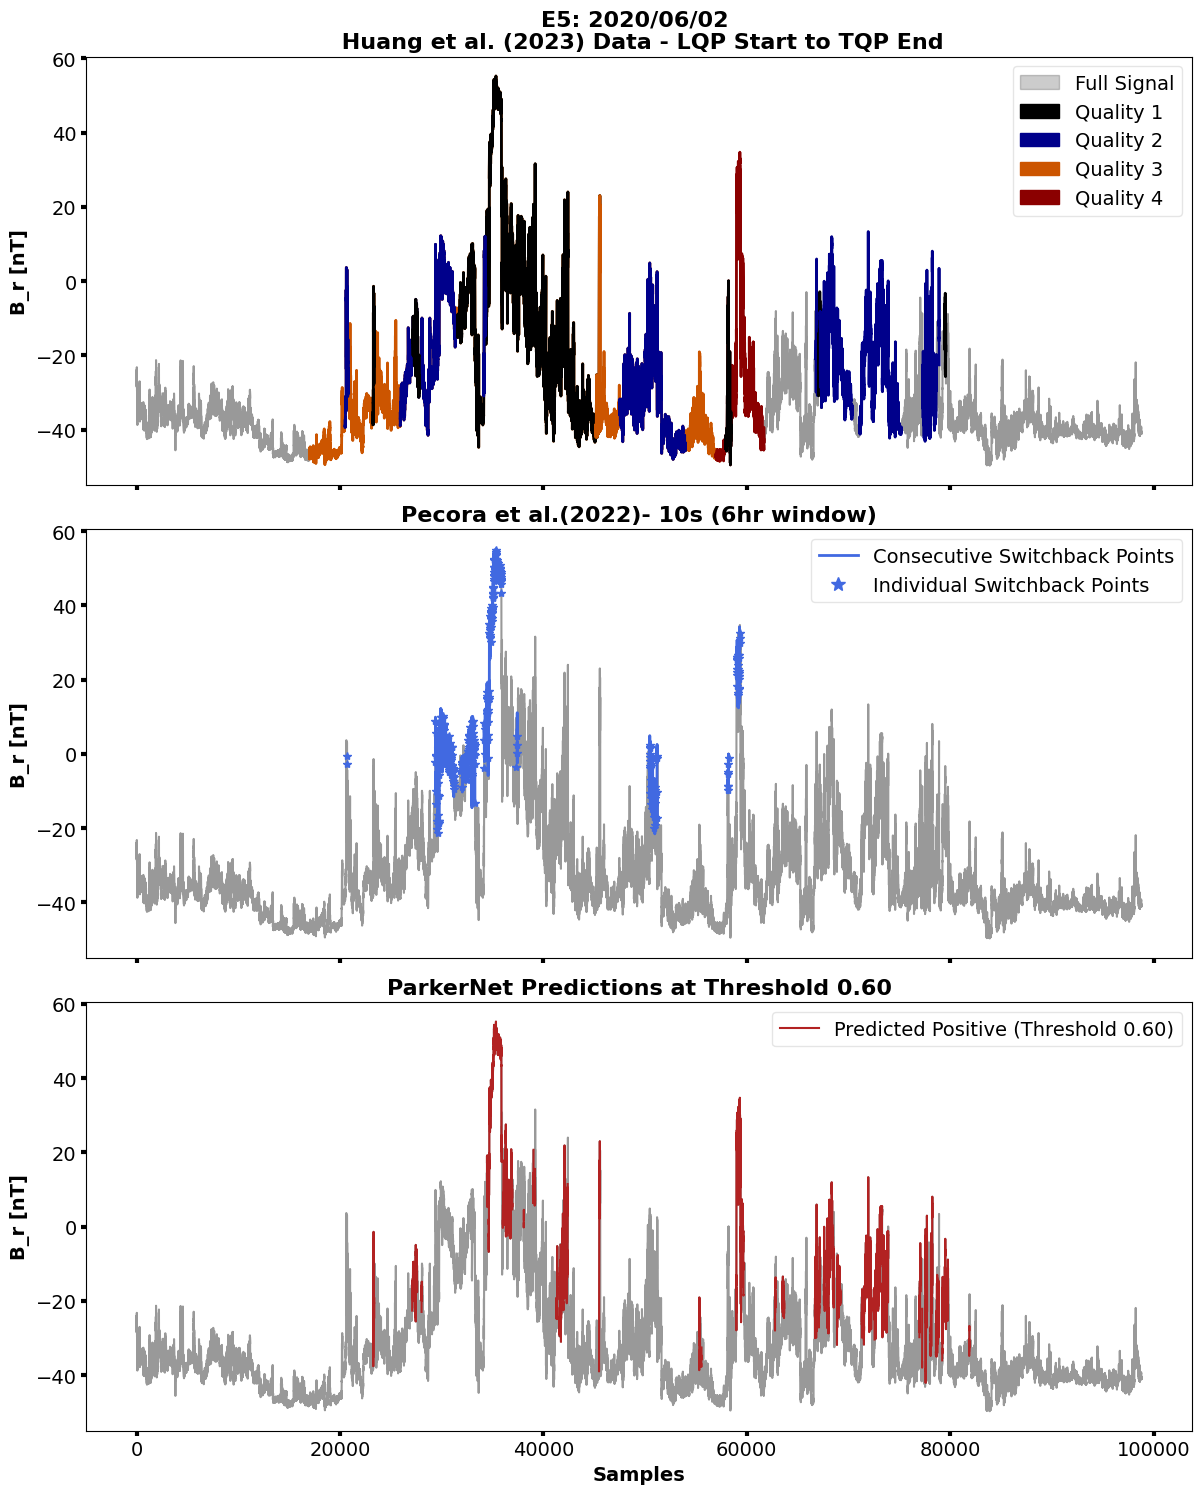

In [ ]:


roi_data = pd.read_csv('SingalROI_E5_Huang_allRegions.txt', sep='\t')

#
signal_data = df_ensemble_E5['B_r']
predictions = df_ensemble_E5['Weighted_Voting_AUC_PRC']

# Define the threshold (set to 0.6)
threshold = 0.6

# Define a color map for quality levels
quality_colors = {
    1: 'black',
    2: '#00008B',  # Dark Blue for Quality 1
    3: '#CC5500',  # Burnt Orange for Quality 2
    4: '#8B0000',  # Red Brown for Quality 3
    5: '#8B4513'   # Red Brown for Quality 4
}

# Load the Pecora data 10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E5_Pecora_10s_6hr.txt', sep='\t')

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds
# Create binary mask for predictions based on the threshold
binary_predictions = (predictions > threshold).astype(int)


# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Perform DBSCAN clustering on the start indices
indices = pecora_data['start_index'].values.reshape(-1, 1)  # Reshape for DBSCAN
db = DBSCAN(eps=15, min_samples=2)  # Adjust parameters as needed
labels = db.fit_predict(indices)

# Initialize clusters list
clusters = []

# Group indices by cluster labels
for label in np.unique(labels):
    if label != -1:  # Skip noise
        cluster_indices = indices[labels == label].flatten()
        start_index = int(cluster_indices[0])
        end_index = int(cluster_indices[-1])
        clusters.append((start_index, end_index))

# Create a figure with three subplots (top, middle, bottom)
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})
# --- Top Subplot: Full Ground Truth Switchbacks (LQP Start to TQP End) for Huang ---
axs[0].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Track legend patches in defined order
legend_patches = [mpatches.Patch(color='black', alpha=0.2, label='Full Signal')]
added_qualities = set()  # Track added quality levels to avoid duplicates

# Plot each switchback (from LQP Start to TQP End) with color based on quality
for _, row in roi_data.iterrows():
    quality_flag = row['QualityFlag']
    color = quality_colors.get(quality_flag, 'gray')  # Default to gray if the quality level is unknown

    # Define start and end points of the full ground truth switchback
    switchback_start = row['LQP_Start_Index']
    switchback_end = row['TQP_End_Index']

    # Plot the full ground truth switchback as a solid line
    axs[0].plot(range(switchback_start, switchback_end), signal_data[switchback_start:switchback_end], color=color, linewidth=2)

    # Add switchback region to legend if not already added
    if quality_flag not in added_qualities:
        legend_patches.append(mpatches.Patch(color=color, label=f'Quality {quality_flag}'))
        added_qualities.add(quality_flag)

# Sort the legend patches to display qualities in ascending order
legend_patches = [legend_patches[0]] + sorted(legend_patches[1:], key=lambda x: int(x.get_label().split()[-1]))

# Add legend for the top plot
axs[0].legend(handles=legend_patches, loc='upper right', fontsize=14,framealpha=0.5)
axs[0].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[0].set_title('E5: 2020/06/02 \n Huang et al. (2023) Data - LQP Start to TQP End', fontsize=16, fontweight='bold')

# --- Middle Subplot: Pecora Data (Sparse Points and DBSCAN Segments) ---
axs[1].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Plot sparse points as asterisks
sparse_points_color = '#4169E1'  # Royal Blue
for _, row in pecora_data.iterrows():
    start_idx = int(row['start_index'])
    axs[1].plot(start_idx, signal_data[start_idx], marker='*', color=sparse_points_color)

# Plot clustered segments
for start_idx, end_idx in clusters:
    axs[1].plot(range(start_idx, end_idx), signal_data[start_idx:end_idx], color=sparse_points_color, linewidth=2)

# Add legend for Pecora data
pecora_line = Line2D([0], [0], color=sparse_points_color, lw=2, label='Consecutive Switchback Points')
sparse_asterisk = Line2D([0], [0], color=sparse_points_color, marker='*', linestyle='None', markersize=10, label='Individual Switchback Points')
axs[1].legend(handles=[pecora_line, sparse_asterisk], loc='upper right', fontsize=14, framealpha=0.5)

axs[1].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[1].set_title('Pecora et al.(2022)- 10s (6hr window)', fontsize=16, fontweight='bold')

# --- Bottom Subplot: Model Predictions ---
model_prediction_line = signal_data.copy()
model_prediction_line[binary_predictions == 0] = np.nan  # Mask out negative predictions
model_prediction_color = '#B22222'
axs[2].plot(signal_data, color='black', alpha=0.4)
axs[2].plot(model_prediction_line, color=model_prediction_color, linewidth=1.5, label=f'Predicted Positive (Threshold {threshold:.2f})')

axs[2].set_xlabel('Samples', fontsize=14, fontweight='bold')
axs[2].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[2].set_title(f'ParkerNet Predictions at Threshold {threshold:.2f}', fontsize=16, fontweight='bold')
axs[2].legend(loc='upper right', fontsize=14, framealpha=0.5)

# Adjust layout and show the plot for Pecora and Model Predictions
plt.tight_layout()
# Apply tick parameters to all axes after plotting
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, width=3)  # x-axis ticks
    ax.tick_params(axis='y', labelsize=14, width=3)  # y-axis ticks

#plt.savefig('E5_preds_DBSCAN.svg', dpi=600, bbox_inches='tight')
plt.show()

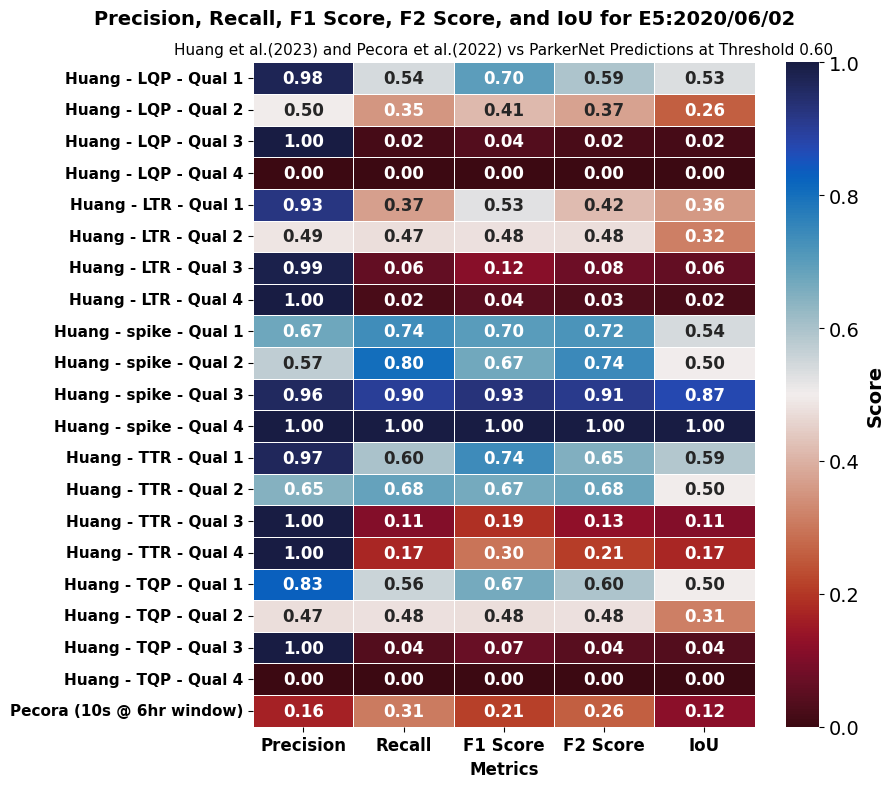

In [ ]:



huang_data_path = 'SingalROI_E5_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E5['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E5['Class_Huang_E5_Range']

# Define threshold, using 0.61 instead of 0.6 because CM fails as decision boundary is very close in certain regions of Huang vs model
threshold = 0.61

# Define regions for Huang ground truths
regions = {
    "LQP": ("LQP_Start_Index", "LQP_End_Index"),
    "LTR": ("LQP_End_Index", "spike_Start_Index"),
    "spike": ("spike_Start_Index", "spike_End_Index"),
    "TTR": ("spike_End_Index", "TQP_Start_Index"),
    "TQP": ("TQP_Start_Index", "TQP_End_Index")
}

# Initialize lists to store Precision, Recall, F1, F2, and IoU values for the heatmap
heatmap_data = []
row_labels = []

# Loop through regions and quality flags for Huang data
for region, (start_col, end_col) in regions.items():
    for quality in sorted(roi_data['QualityFlag'].unique()):
        row_labels.append(f"Huang - {region} - Qual {quality}")
        row_data = []

        # Filter quality rows for the current region and quality
        quality_rows = roi_data[roi_data['QualityFlag'] == quality]
        ground_truth_segment = []



        # Construct ground truth and predictions for the current region and quality
        for _, row in quality_rows.iterrows():
            start, end = row[start_col], row[end_col]
            gt_segment = ground_truth[start:end].values  # Get the ground truth for the segment
            pred_segment = (predictions[start:end] >= threshold).astype(int).values  # Get the predicted values
            ground_truth_segment.extend(gt_segment)
            ground_truth_segment.extend(pred_segment)

        # Calculate confusion matrix
        cm = confusion_matrix(ground_truth_segment[:len(ground_truth_segment)//2], ground_truth_segment[len(ground_truth_segment)//2:])

        # Get TP, FP, FN
        TN, FP, FN, TP = cm.ravel()

        # Calculate Precision, Recall, F1, and F2 for the current region and quality
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        F1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        F2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0

        # Calculate IoU for the current region and quality
        iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0

        # Append Precision, Recall, F1, F2, IoU results for the current region and quality
        row_data.extend([precision, recall, F1_score, F2_score, iou])

        # Append the data for the current region and quality
        heatmap_data.append(row_data)



#Load Pecora d10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E5_Pecora_10s_6hr.txt', sep = '\t')
# Assuming df_ensemble_E5 contains model predictions
predictions_pecora = df_ensemble_E5['Weighted_Voting_AUC_PRC']

# Create binary predictions based on threshold for Pecora data
binary_predictions_pecora = (predictions_pecora >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices for Pecora (10 seconds)
ground_truth_pecora = np.zeros_like(binary_predictions_pecora)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Calculate Precision, Recall, F1, F2, and IoU for Pecora data (as one whole segment)
cm_pecora = confusion_matrix(ground_truth_pecora, binary_predictions_pecora)
TN_pecora, FP_pecora, FN_pecora, TP_pecora = cm_pecora.ravel()  # Get confusion matrix values

# Calculate Precision, Recall, F1, and F2 for Pecora (single value)
precision_pecora = TP_pecora / (TP_pecora + FP_pecora) if (TP_pecora + FP_pecora) != 0 else 0
recall_pecora = TP_pecora / (TP_pecora + FN_pecora) if (TP_pecora + FN_pecora) != 0 else 0
F1_score_pecora = (2 * precision_pecora * recall_pecora) / (precision_pecora + recall_pecora) if (precision_pecora + recall_pecora) != 0 else 0
F2_score_pecora = (5 * precision_pecora * recall_pecora) / (4 * precision_pecora + recall_pecora) if (4 * precision_pecora + recall_pecora) != 0 else 0

# Calculate IoU for Pecora
iou_pecora = TP_pecora / (TP_pecora + FP_pecora + FN_pecora) if (TP_pecora + FP_pecora + FN_pecora) != 0 else 0

# Append Pecora Precision, Recall, F1, F2, IoU to heatmap data
row_labels.append("Pecora (10s @ 6hr window)")
heatmap_data.append([precision_pecora, recall_pecora, F1_score_pecora, F2_score_pecora, iou_pecora])

# Convert heatmap data to DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["Precision", "Recall", "F1 Score", "F2 Score", "IoU"])

# Plot combined heatmap for Precision, Recall, F1, F2, and IoU (including Huang and Pecora)
fig, ax = plt.subplots(figsize=(9, 8))  # Adjust figure size for better readability

sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="pyart_balance_r", cbar_kws={'label': 'Score'},
            annot_kws={"weight": "bold", "size": 12},  # Make annotation bold
            linewidths=0.5,  # Optional: thin line between cells
            cbar=True, vmin=0, vmax=1, ax=ax)  # Set color scale to go from 0 to 1

# Title and labels in bold with line breaks for title
plt.suptitle("Precision, Recall, F1 Score, F2 Score, and IoU for E5:2020/06/02", fontsize=14, fontweight='bold', y=0.98)
ax.set_title("Huang et al.(2023) and Pecora et al.(2022) vs ParkerNet Predictions at Threshold 0.60", fontsize=11, fontweight='normal', loc='center')

# Set xlabel with bold font
ax.set_xlabel("Metrics", fontsize=12, fontweight='bold')

# Make the y-axis labels bold and adjust font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')

# Make the legend label bold
cbar = ax.collections[0].colorbar
cbar.set_label('Score', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=12, fontweight = 'bold')
# Adjust layout to ensure everything fits without excessive width

plt.tight_layout()
#plt.savefig('E5_heatmap_1.svg', dpi=600, bbox_inches='tight')
plt.show()


 (True Negatives):  43958
 (False Positives):  1123
(False Negatives):  45433
 (True Positives):  8316
Precision: 0.8810
Recall: 0.1547
F1 Score: 0.2632
Total Switchbacks (Ground Truth 1):  53749
Intersection over Union (IoU): 0.1516


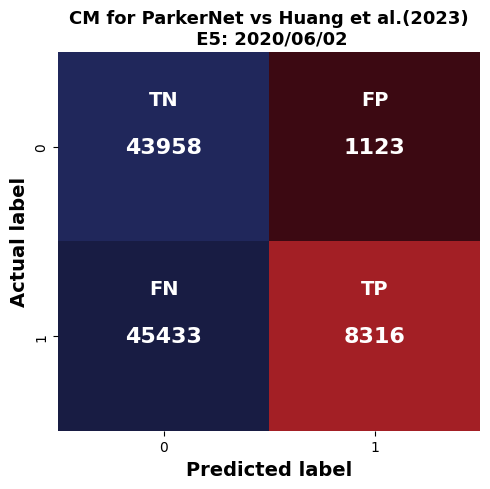

IoU at threshold 0.6: 0.1516


In [ ]:


huang_data_path = 'SingalROI_E5_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E5['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E5['Class_Huang_E5_Range']

# Define threshold
threshold = 0.6

# Confusion Matrix Function
def plot_cm_and_metrics(labels, predictions, threshold=0.6):
    # Compute the confusion matrix
    cm = confusion_matrix(labels, predictions > threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title('CM for ParkerNet vs Huang et al.(2023)\n E5: 2020/06/02', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')
    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()

    # Position the labels slightly above the center of each section
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    # Show the plot
    plt.savefig('E5_Huang_CM.svg', dpi=600, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth, predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
print(f'IoU at threshold {threshold}: {iou:.4f}')

   Threshold  Precision    Recall  F1 Score       AUC
0       0.50   0.875196  0.218404  0.349573  0.769061
1       0.55   0.878703  0.185994  0.307005  0.769061
2       0.60   0.881026  0.154719  0.263215  0.769061
3       0.65   0.895551  0.121714  0.214302  0.769061
4       0.70   0.906689  0.092560  0.167972  0.769061
5       0.75   0.997779  0.050159  0.095516  0.769061
6       0.80   1.000000  0.006995  0.013894  0.769061
7       0.85   0.000000  0.000000  0.000000  0.769061
8       0.90   0.000000  0.000000  0.000000  0.769061
9       0.95   0.000000  0.000000  0.000000  0.769061


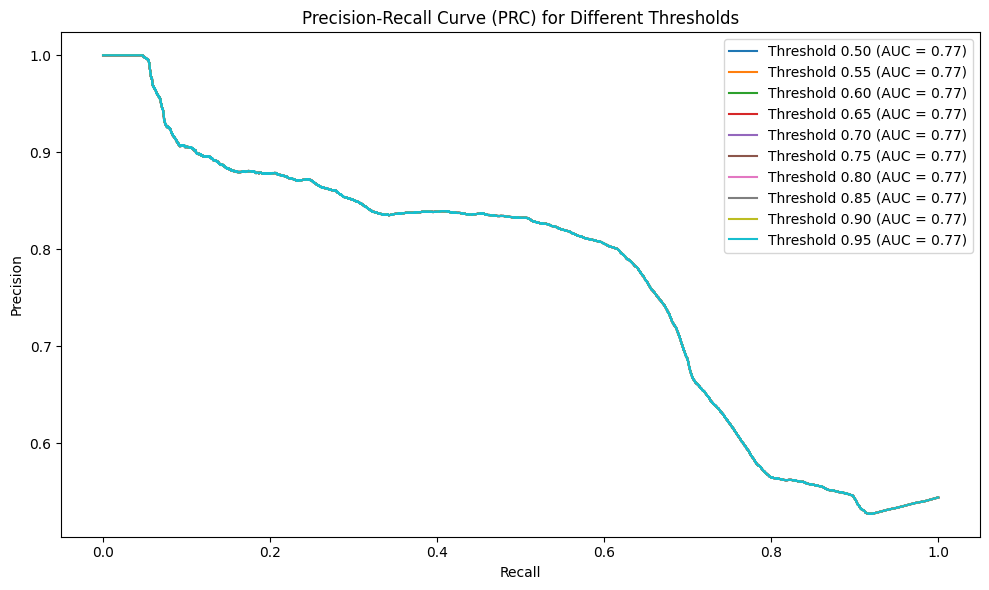

In [ ]:



huang_data_path = 'SingalROI_E5_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E5['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E5['Class_Huang_E5_Range']

# Define thresholds for analysis
thresholds = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store metrics for each threshold
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Create an empty DataFrame to store the metrics for each threshold
metrics_df = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Function to calculate confusion matrix and metrics
def calculate_metrics(labels, predictions, threshold):
    cm = confusion_matrix(labels, predictions > threshold)
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calculate Precision-Recall curve and AUC
    precision_curve, recall_curve, _ = precision_recall_curve(labels, predictions)
    auc_score = auc(recall_curve, precision_curve)

    return precision, recall, f1_score, auc_score

# Loop through each threshold and calculate metrics
for threshold in thresholds:
    precision, recall, f1_score, auc_score = calculate_metrics(ground_truth, predictions, threshold)

    # Add the results to the metrics dataframe using pd.concat
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1_score],
        'AUC': [auc_score]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)

# Plot the Precision-Recall curve and include AUC in the legend
plt.figure(figsize=(10, 6))
for threshold in thresholds:
    # Get precision and recall for the current threshold
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Plot each threshold with its AUC score in the legend
    plt.plot(recall_curve, precision_curve, label=f'Threshold {threshold:.2f} (AUC = {auc_score:.2f})')

plt.title('Precision-Recall Curve (PRC) for Different Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

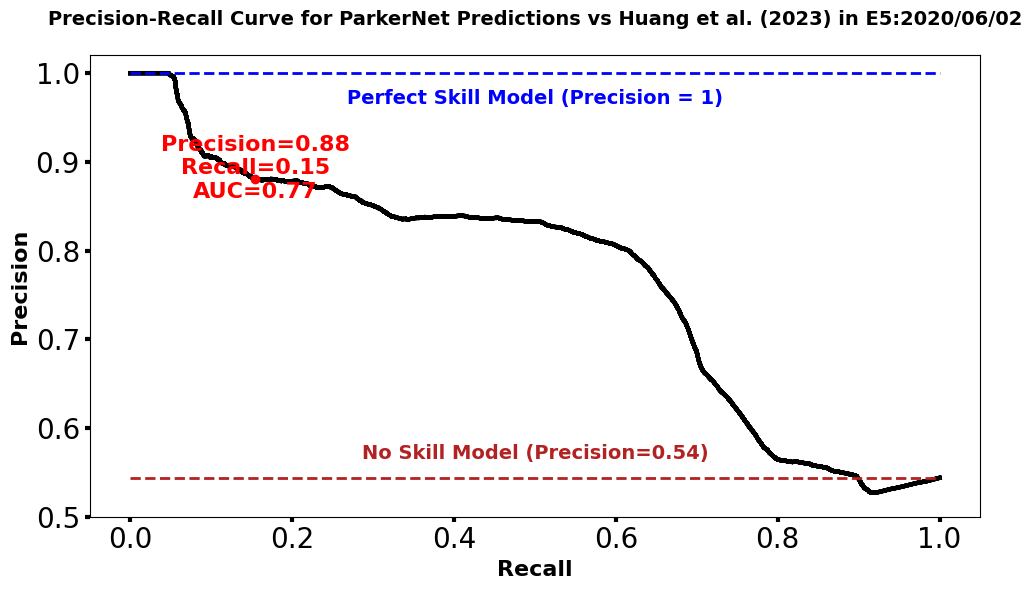

In [ ]:

# Load the data
huang_data_path = 'SingalROI_E5_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E5['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E5['Class_Huang_E5_Range']

# Define thresholds (from 0.5 to 0.95)
thresholds = np.round(np.arange(0.5, 0.95, 0.05), 2)

# Initialize lists to store the Precision-Recall curve and AUC for each threshold
precision_dict = {}
recall_dict = {}
auc_dict = {}

# Calculate Precision-Recall curve and AUC for each threshold
for threshold in thresholds:
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Store precision, recall, and auc values for each threshold
    precision_dict[threshold] = precision_curve
    recall_dict[threshold] = recall_curve
    auc_dict[round(threshold, 2)] = auc_score  # Round threshold to two decimal places

# Plot Precision-Recall curves for all thresholds
plt.figure(figsize=(10, 6))

for threshold in thresholds:
    plt.plot(recall_dict[threshold], precision_dict[threshold], color='black', linewidth=3)

# Provided precision and recall at threshold 0.6
threshold_0_6_precision = 0.881026
threshold_0_6_recall =  0.154719

# Calculate AUC at threshold 0.6
auc_at_06 = auc_dict[0.6]  # AUC for threshold 0.6

# Plot the red dot for threshold 0.6
plt.plot(threshold_0_6_recall, threshold_0_6_precision, 'k-', label=f'Model Precision-Recall curve at 0.60 threshold')

# Calculate No Skill Model baseline
num_positives = np.sum(ground_truth == 1)
num_total = len(ground_truth)
no_skill_precision = num_positives / num_total
no_skill_recall = num_positives / num_total  # Recall is the same as the proportion of positives

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.005),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.95),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')

# Adding labels and title
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Huang et al. (2023) in E5:2020/06/02\n', fontsize=14, fontweight='bold')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(threshold_0_6_recall, threshold_0_6_precision, color='red', zorder=5)

# Add the red dot annotation for threshold 0.6
plt.annotate(f'Precision={threshold_0_6_precision:.2f}\nRecall={threshold_0_6_recall:.2f}\nAUC={auc_at_06:.2f}',
             (threshold_0_6_recall, threshold_0_6_precision),
             textcoords="offset points",
             xytext=(0,10),
             ha='center', va= 'center_baseline', fontsize=16, fontweight='bold', color='red')

# Set y-axis limits to ensure the perfect skill line is visible
plt.ylim(0.5, 1.02)
# Customize y-axis ticks to show 0.1 and 0.9
plt.yticks(np.arange(0.5, 1.02, 0.1))  # Set y-ticks from 0 to 1 with step of 0.1

# Apply the tick parameters to all axes after plotting
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks


#plt.savefig('E5_Huang_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


 (True Negatives):  86079
 (False Positives):  7922
(False Negatives):  3312
 (True Positives):  1517
Precision: 0.1607
Recall: 0.3141
F1 Score: 0.2126
Total Switchbacks (Ground Truth 1):  4829
Intersection over Union (IoU): 0.1190
IoU at threshold 0.6: 0.1190


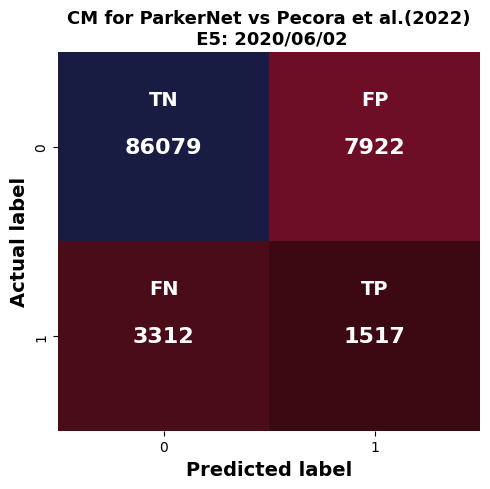

In [ ]:



pecora_data = pd.read_csv('SignalROI_E5_Pecora_10s_6hr.txt', sep='\t')

predictions = df_ensemble_E5['Weighted_Voting_AUC_PRC']

# Define threshold
threshold = 0.6

# Create a binary prediction array based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices
ground_truth_pecora = np.zeros_like(binary_predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def plot_cm_and_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)
    if np.all(cm == 0):  # Check if cm is all zeros (invalid case)
        print("Warning: Confusion matrix is all zeros!")
        return None  # Return None if confusion matrix is empty

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title(f'CM for ParkerNet vs Pecora et al.(2022)\n E5: 2020/06/02', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')

    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth_pecora, binary_predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
if iou is not None:
    print(f'IoU at threshold {threshold}: {iou:.4f}')

# Show the plot
plt.tight_layout()
#plt.savefig('E5_Pecora_CM_1.svg', dpi=600, bbox_inches='tight')  # Save after the plot is created
plt.show()

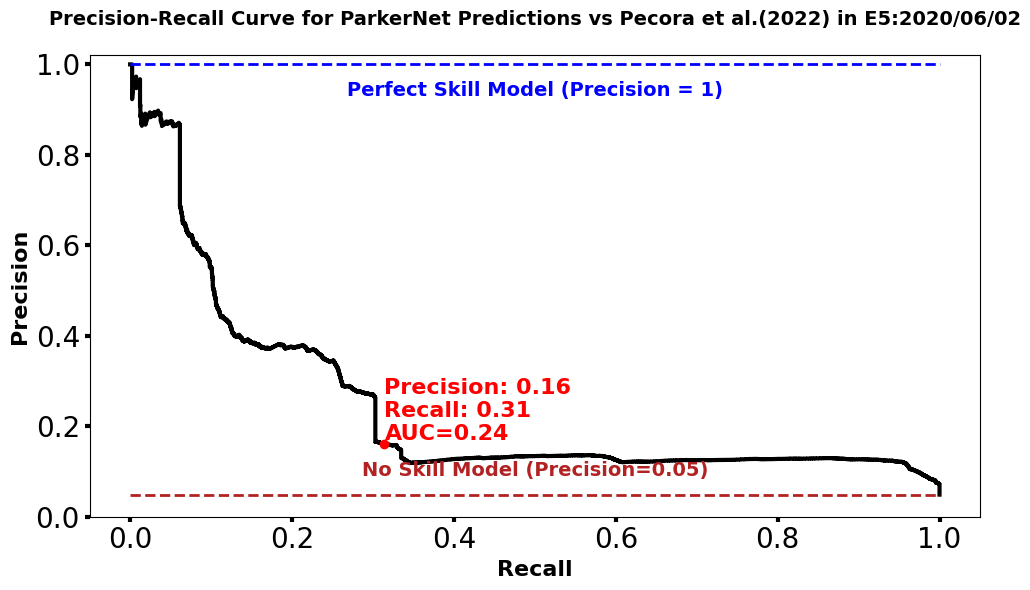

In [ ]:



pecora_data = pd.read_csv('SignalROI_E5_Pecora_10s_6hr.txt', sep='\t')  # Pecora data
predictions = df_ensemble_E5['Weighted_Voting_AUC_PRC']

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Adjust Pecora data based on the start and end indices (10-second window)
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)

# Construct ground truth based on adjusted indices for Pecora data
ground_truth_pecora = np.zeros_like(predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Define thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize list to store metrics
metrics_list = []

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def calculate_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1_score

# Evaluate metrics at various thresholds
for threshold in thresholds:
    precision, recall, f1_score = calculate_metrics(ground_truth_pecora, predictions, threshold)
    metrics_list.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})

# Convert metrics list to dataframe
metrics_df = pd.DataFrame(metrics_list)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ground_truth_pecora, predictions)

# **Perfect Skill** line will be precision=1, recall=1 across all recall values
perfect_skill = np.ones_like(recall)

# **No Skill** line is precision = the proportion of positive samples in the ground truth
no_skill_precision = np.sum(ground_truth_pecora == 1) / len(ground_truth_pecora)  # Proportion of positive samples
no_skill = np.full_like(recall, no_skill_precision)

# AUC at threshold 0.6
threshold_06_index = np.where(thresholds >= 0.6)[0][0]
precision_at_06 = metrics_df.loc[threshold_06_index, 'Precision']
recall_at_06 = metrics_df.loc[threshold_06_index, 'Recall']
auc_at_06 = auc(recall, precision)  # Calculate AUC value

plt.figure(figsize=(10, 6))

# Plot Precision-Recall Curve
plt.plot(recall, precision, color='black', lw=3, label=f'Model Precision-Recall Curve at 0.6 threshold')


# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.01),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.9),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')


# Plot Precision and Recall values at threshold 0.6 directly on the graph
plt.text(recall_at_06, precision_at_06, f'Precision: {precision_at_06:.2f}\nRecall: {recall_at_06:.2f}\nAUC={auc_at_06:.2f}', color='red', fontsize=16, fontweight = 'bold', ha='left', va='bottom')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(recall_at_06, precision_at_06, color='red', zorder=5)

# Labels and Title
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Pecora et al.(2022) in E5:2020/06/02\n', fontsize=14, fontweight='bold')

plt.ylim(0, 1.02)
plt.yticks(np.arange(0, 1.02, 0.2))

# Increase the size of the x and y axis tick marks
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks

#plt.savefig('E5_Pecora_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


ENCOUNTER 6

In [ ]:
# Read in the dataset for predicting
df_E6 = pd.read_csv('PSP_E6_ForPrediction.txt', sep="\t", parse_dates=['Datetime'])

# Separate the 'Class_Huang_Ex' column into df_gt
df_gt_E6 = df_E6[['Class_Huang_E6_Range']].copy()

pd.set_option('future.no_silent_downcasting', True)
df_gt_E6['Class_Huang_E6_Range'] = df_gt_E6['Class_Huang_E6_Range'].replace({True: 1, False: 0}).infer_objects(copy=False).astype(int)
# Create df_test by dropping the 'Class_Huang_Ex' column and other columns not needed
df_test_E6= df_E6.drop(columns=['Class_Huang_E6_Range'])

df_test_E6.pop("X_HCI")
df_test_E6.pop("Y_HCI")
df_test_E6.pop("Z_HCI")
display(df_test_E6)

Datetime        B_r       Bmag        B_t  \
0     2020-09-18 00:00:00.000000000 -20.550350  29.086024  18.378670   
1     2020-09-18 00:00:00.873799999 -20.573168  29.108490  18.346702   
2     2020-09-18 00:00:01.747599999 -20.546205  29.106085  18.353771   
3     2020-09-18 00:00:02.621399999 -20.547378  29.184900  18.426395   
4     2020-09-18 00:00:03.495199999 -20.560779  29.194042  18.470095   
...                             ...        ...        ...        ...   
98875 2020-09-18 23:59:56.974996393  -8.193979  27.132018  23.457845   
98876 2020-09-18 23:59:57.848796393  -6.320918  27.256590  23.700745   
98877 2020-09-18 23:59:58.722596393  -5.030788  27.131246  24.366213   
98878 2020-09-18 23:59:59.596396393  -4.644556  27.057048  24.210868   
98879 2020-09-19 00:00:00.470196393  -4.295369  27.272694  25.206015   

             B_n      V_r       V_t       V_n        Vmag       V_nr  \
0       9.268462  238.944  -8.68878  15.65330  239.613764  17.903092   
1       9.351335  245.351 -12.02090  14.65370  246.081991  18.953442   
2       9.389182  245.705 -21.68060  13.69210  247.039408  25.642192   
3       9.488499  242.377 -24.12100  22.36100  244.598543  32.891290   
4       9.402237  240.810 -19.91930  12.34370  241.947518  23.433852   
...          ...      ...       ...       ...         ...        ...   
98875  10.896542  292.089  15.85880  10.02900  292.691077  18.763858   
98876  11.884545  301.806  19.11380   8.57005  302.532056  20.947150   
98877  10.820507  298.524  12.54360   6.90969  298.867302  14.320814   
98878  11.151045  298.524  12.54360   6.90969  298.867302  14.320814   
98879   9.487171  298.524  12.54360   6.90969  298.867302  14.320814   

       ProtonDensity  
0            98.5854  
1            86.7583  
2            84.1120  
3           100.0340  
4            98.1609  
...              ...  
98875        98.8086  
98876        86.8920  
98877        91.4599  
98878        91.4599  
98879        91.4599  

[98880 rows x 11 columns]

In [ ]:
df_gt_allpreds_E6 = pd.read_csv('ParkerNet_allModel_averaged_predictions_E6_20200918.csv')
display(df_gt_allpreds_E6)

Class_Huang_E6_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.645610              0.112656   
1                         0              0.642459              0.112732   
2                         0              0.636577              0.112746   
3                         0              0.636488              0.112688   
4                         0              0.635847              0.112547   
...                     ...                   ...                   ...   
98825                     0              0.667033              0.118505   
98826                     0              0.666931              0.118516   
98827                     0              0.665490              0.118359   
98828                     0              0.664121              0.118278   
98829                     0              0.664218              0.118167   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.414840               0.202445              0.176920   
1                  0.415061               0.201921              0.176641   
2                  0.413814               0.202410              0.176797   
3                  0.414263               0.202487              0.176458   
4                  0.415488               0.202580              0.176932   
...                     ...                    ...                   ...   
98825              0.513097               0.254968              0.402710   
98826              0.512436               0.254337              0.400777   
98827              0.511426               0.253347              0.396747   
98828              0.511948               0.253152              0.395861   
98829              0.511535               0.252816              0.393266   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.128426              0.235047              0.189638   
1                  0.128363              0.235319              0.188946   
2                  0.128412              0.235362              0.189175   
3                  0.128479              0.235040              0.188955   
4                  0.128225              0.235161              0.189155   
...                     ...                   ...                   ...   
98825              0.171260              0.427529              0.207427   
98826              0.170734              0.425907              0.207401   
98827              0.170427              0.425608              0.207628   
98828              0.170310              0.424614              0.207239   
98829              0.170248              0.424357              0.206945   

       Preds_splitM_seed641  ...  Preds_splitM_seed1843  \
0                  0.185047  ...               0.366588   
1                  0.185479  ...               0.366058   
2                  0.186441  ...               0.365703   
3                  0.187280  ...               0.367510   
4                  0.187323  ...               0.366602   
...                     ...  ...                    ...   
98825              0.549883  ...               0.559772   
98826              0.549906  ...               0.557982   
98827              0.549698  ...               0.556811   
98828              0.548902  ...               0.555635   
98829              0.548186  ...               0.554822   

       Preds_splitM_seed2221  Preds_splitM_seed3060  Preds_splitM_seed3247  \
0                   0.146322               0.139766               0.194231   
1                   0.146294               0.139530               0.194071   
2                   0.146205               0.139110               0.193861   
3                   0.146099               0.139211               0.193711   
4                   0.146131               0.138765               0.193551   
...                      ...                    ...                    ...   
98825               0.161424         

In [ ]:
df_test_E6.reset_index(drop=True, inplace=True)
df_gt_allpreds_E6.reset_index(drop=True, inplace=True)
df_ensemble_E6 = pd.concat([df_gt_allpreds_E6, df_test_E6], axis=1, join='inner')
display(df_ensemble_E6)

Class_Huang_E6_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.645610              0.112656   
1                         0              0.642459              0.112732   
2                         0              0.636577              0.112746   
3                         0              0.636488              0.112688   
4                         0              0.635847              0.112547   
...                     ...                   ...                   ...   
98825                     0              0.667033              0.118505   
98826                     0              0.666931              0.118516   
98827                     0              0.665490              0.118359   
98828                     0              0.664121              0.118278   
98829                     0              0.664218              0.118167   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.414840               0.202445              0.176920   
1                  0.415061               0.201921              0.176641   
2                  0.413814               0.202410              0.176797   
3                  0.414263               0.202487              0.176458   
4                  0.415488               0.202580              0.176932   
...                     ...                    ...                   ...   
98825              0.513097               0.254968              0.402710   
98826              0.512436               0.254337              0.400777   
98827              0.511426               0.253347              0.396747   
98828              0.511948               0.253152              0.395861   
98829              0.511535               0.252816              0.393266   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.128426              0.235047              0.189638   
1                  0.128363              0.235319              0.188946   
2                  0.128412              0.235362              0.189175   
3                  0.128479              0.235040              0.188955   
4                  0.128225              0.235161              0.189155   
...                     ...                   ...                   ...   
98825              0.171260              0.427529              0.207427   
98826              0.170734              0.425907              0.207401   
98827              0.170427              0.425608              0.207628   
98828              0.170310              0.424614              0.207239   
98829              0.170248              0.424357              0.206945   

       Preds_splitM_seed641  ...        B_r       Bmag        B_t        B_n  \
0                  0.185047  ... -20.550350  29.086024  18.378670   9.268462   
1                  0.185479  ... -20.573168  29.108490  18.346702   9.351335   
2                  0.186441  ... -20.546205  29.106085  18.353771   9.389182   
3                  0.187280  ... -20.547378  29.184900  18.426395   9.488499   
4                  0.187323  ... -20.560779  29.194042  18.470095   9.402237   
...                     ...  ...        ...        ...        ...        ...   
98825              0.549883  ...  -0.548851  26.989199  26.112734   6.800055   
98826              0.549906  ...  -1.179301  27.085828  26.124704   7.053449   
98827              0.549698  ...  -1.586161  27.035086  25.962548   7.370623   
98828              0.548902  ...  -1.138273  27.031415  25.659211   8.426545   
98829              0.548186  ...  -2.829131  26.992795  24.712108  10.484214   

           V_r       V_t       V_n        Vmag       V_nr  ProtonDensity  
0      238.944  -8.68878  15.65330  239.613764  17.903092        98.5854  
1      245.351 -12.02090  14.65370  246.081991  18.953442        86.7583  
2      245.705 -21.68060  13.69210  247.039408  25.642192        84.1120  
3      242.377 -24.12100  22.36

In [ ]:
#df_ensemble_E6['prediction_0.6'] = (df_ensemble_E6['Weighted_Voting_AUC_PRC'] > 0.6).astype(int)
#df_ensemble_E6.to_csv('predictions_E6.csv', index=False)

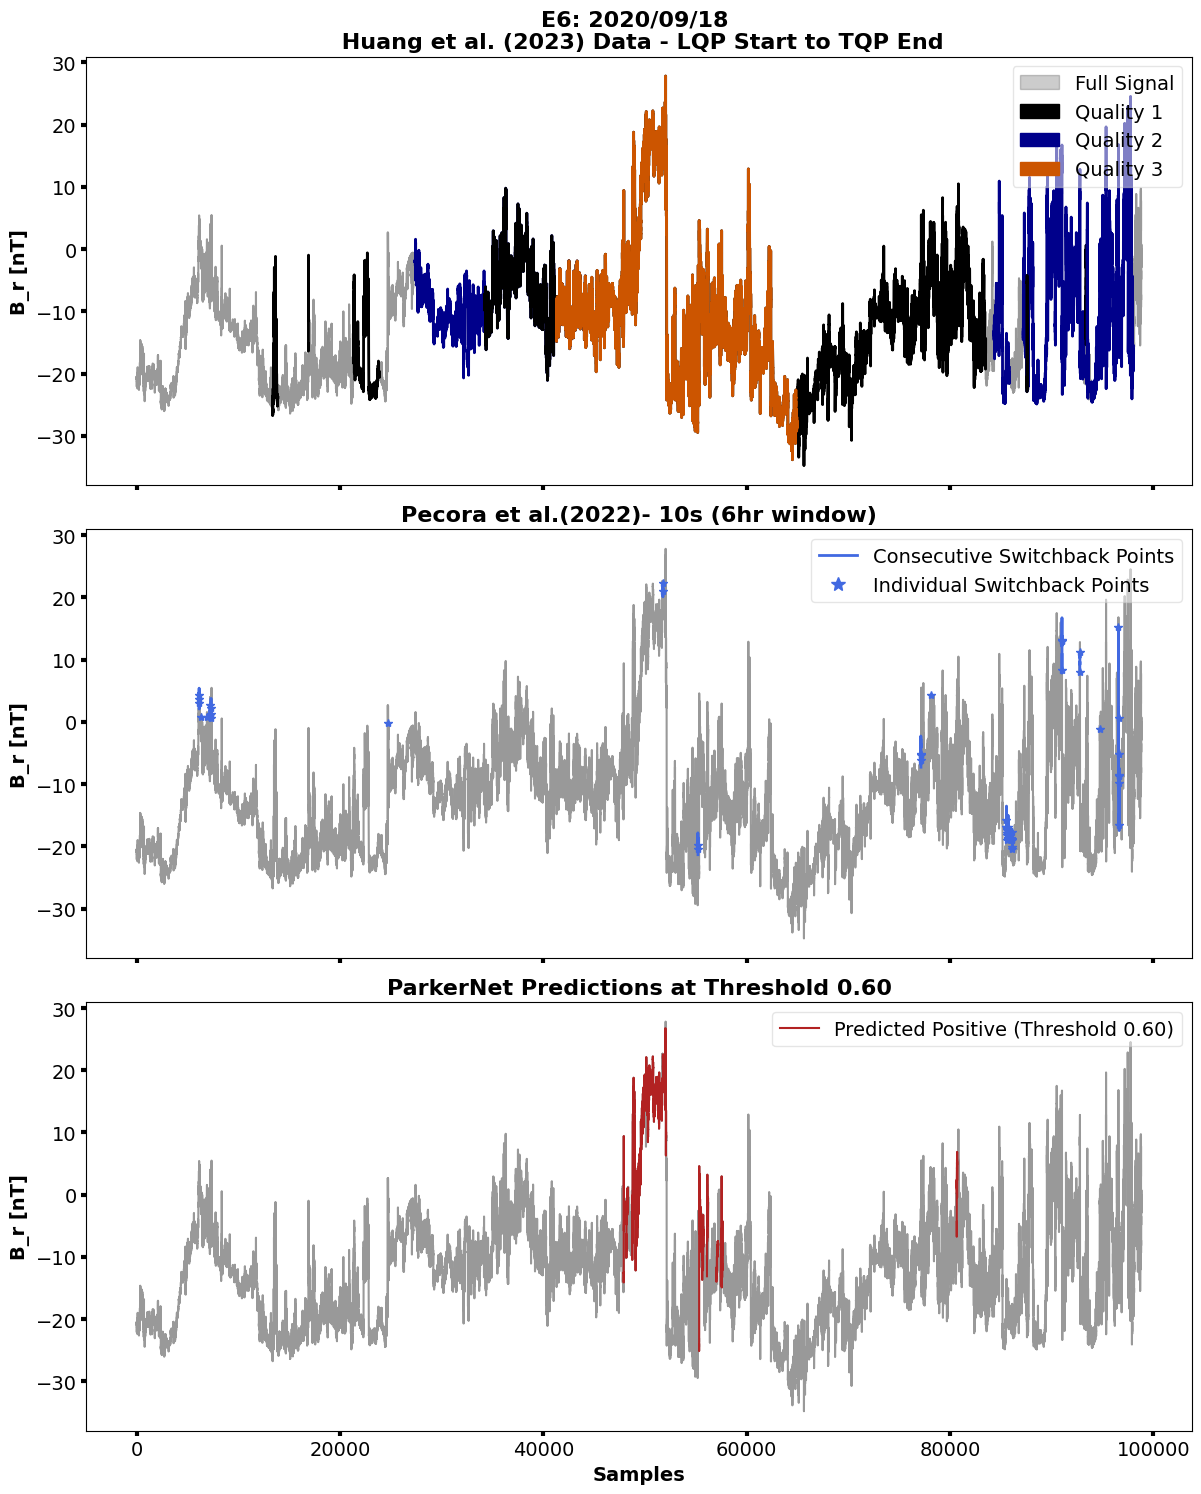

In [ ]:



roi_data = pd.read_csv('SingalROI_E6_Huang_allRegions.txt', sep='\t')

signal_data = df_ensemble_E6['B_r']
predictions = df_ensemble_E6['Weighted_Voting_AUC_PRC']

# Define the threshold (set to 0.6)
threshold = 0.6

# Define a color map for quality levels
quality_colors = {
    1: 'black',
    2: '#00008B',  # Dark Blue for Quality 1
    3: '#CC5500',  # Burnt Orange for Quality 2
    4: '#8B0000',  # Red Brown for Quality 3
    5: '#8B4513'   # Red Brown for Quality 4
}

# Load the Pecora data 10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E6_Pecora_10s_6hr.txt', sep='\t')

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds
# Create binary mask for predictions based on the threshold
binary_predictions = (predictions > threshold).astype(int)


# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Perform DBSCAN clustering on the start indices
indices = pecora_data['start_index'].values.reshape(-1, 1)  # Reshape for DBSCAN
db = DBSCAN(eps=15, min_samples=2)  # Adjust parameters as needed
labels = db.fit_predict(indices)

# Initialize clusters list
clusters = []

# Group indices by cluster labels
for label in np.unique(labels):
    if label != -1:  # Skip noise
        cluster_indices = indices[labels == label].flatten()
        start_index = int(cluster_indices[0])
        end_index = int(cluster_indices[-1])
        clusters.append((start_index, end_index))

# Create a figure with three subplots (top, middle, bottom)
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})
# --- Top Subplot: Full Ground Truth Switchbacks (LQP Start to TQP End) for Huang ---
axs[0].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Track legend patches in defined order
legend_patches = [mpatches.Patch(color='black', alpha=0.2, label='Full Signal')]
added_qualities = set()  # Track added quality levels to avoid duplicates

# Plot each switchback (from LQP Start to TQP End) with color based on quality
for _, row in roi_data.iterrows():
    quality_flag = row['QualityFlag']
    color = quality_colors.get(quality_flag, 'gray')  # Default to gray if the quality level is unknown

    # Define start and end points of the full ground truth switchback
    switchback_start = row['LQP_Start_Index']
    switchback_end = row['TQP_End_Index']

    # Plot the full ground truth switchback as a solid line
    axs[0].plot(range(switchback_start, switchback_end), signal_data[switchback_start:switchback_end], color=color, linewidth=2)

    # Add switchback region to legend if not already added
    if quality_flag not in added_qualities:
        legend_patches.append(mpatches.Patch(color=color, label=f'Quality {quality_flag}'))
        added_qualities.add(quality_flag)

# Sort the legend patches to display qualities in ascending order
legend_patches = [legend_patches[0]] + sorted(legend_patches[1:], key=lambda x: int(x.get_label().split()[-1]))

# Add legend for the top plot
axs[0].legend(handles=legend_patches, loc='upper right', fontsize=14,framealpha=0.5)
axs[0].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[0].set_title('E6: 2020/09/18 \n Huang et al. (2023) Data - LQP Start to TQP End', fontsize=16, fontweight='bold')

# --- Middle Subplot: Pecora Data (Sparse Points and DBSCAN Segments) ---
axs[1].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Plot sparse points as asterisks
sparse_points_color = '#4169E1'  # Royal Blue
for _, row in pecora_data.iterrows():
    start_idx = int(row['start_index'])
    axs[1].plot(start_idx, signal_data[start_idx], marker='*', color=sparse_points_color)

# Plot clustered segments
for start_idx, end_idx in clusters:
    axs[1].plot(range(start_idx, end_idx), signal_data[start_idx:end_idx], color=sparse_points_color, linewidth=2)

# Add legend for Pecora data
pecora_line = Line2D([0], [0], color=sparse_points_color, lw=2, label='Consecutive Switchback Points')
sparse_asterisk = Line2D([0], [0], color=sparse_points_color, marker='*', linestyle='None', markersize=10, label='Individual Switchback Points')
axs[1].legend(handles=[pecora_line, sparse_asterisk], loc='upper right', fontsize=14, framealpha=0.5)

axs[1].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[1].set_title('Pecora et al.(2022)- 10s (6hr window)', fontsize=16, fontweight='bold')

# --- Bottom Subplot: Model Predictions ---
model_prediction_line = signal_data.copy()
model_prediction_line[binary_predictions == 0] = np.nan  # Mask out negative predictions
model_prediction_color = '#B22222'
axs[2].plot(signal_data, color='black', alpha=0.4)
axs[2].plot(model_prediction_line, color=model_prediction_color, linewidth=1.5, label=f'Predicted Positive (Threshold {threshold:.2f})')

axs[2].set_xlabel('Samples', fontsize=14, fontweight='bold')
axs[2].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[2].set_title(f'ParkerNet Predictions at Threshold {threshold:.2f}', fontsize=16, fontweight='bold')
axs[2].legend(loc='upper right', fontsize=14, framealpha=0.5)

# Adjust layout and show the plot for Pecora and Model Predictions
plt.tight_layout()
# Apply tick parameters to all axes after plotting
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, width=3)  # x-axis ticks
    ax.tick_params(axis='y', labelsize=14, width=3)  # y-axis ticks

#plt.savefig('E6_preds_DBSCAN.svg', dpi=600, bbox_inches='tight')
plt.show()

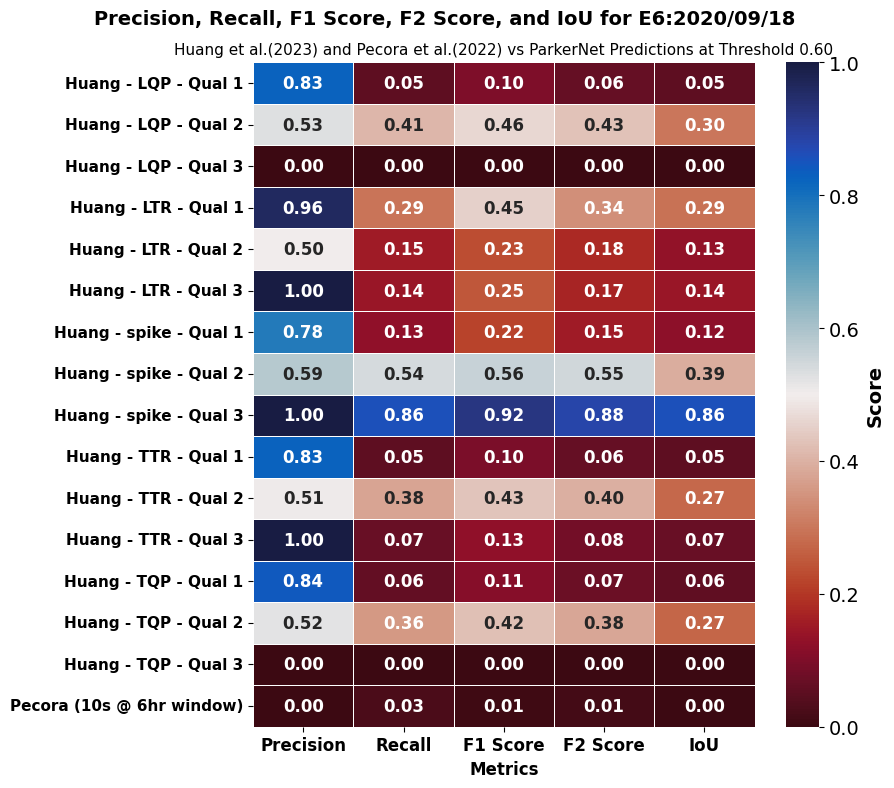

In [ ]:



huang_data_path = 'SingalROI_E6_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E6['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E6['Class_Huang_E6_Range']

# Define threshold
threshold = 0.6

# Define regions for Huang ground truths
regions = {
    "LQP": ("LQP_Start_Index", "LQP_End_Index"),
    "LTR": ("LQP_End_Index", "spike_Start_Index"),
    "spike": ("spike_Start_Index", "spike_End_Index"),
    "TTR": ("spike_End_Index", "TQP_Start_Index"),
    "TQP": ("TQP_Start_Index", "TQP_End_Index")
}

# Initialize lists to store Precision, Recall, F1, F2, and IoU values for the heatmap
heatmap_data = []
row_labels = []

# Loop through regions and quality flags for Huang data
for region, (start_col, end_col) in regions.items():
    for quality in sorted(roi_data['QualityFlag'].unique()):
        row_labels.append(f"Huang - {region} - Qual {quality}")
        row_data = []

        # Filter quality rows for the current region and quality
        quality_rows = roi_data[roi_data['QualityFlag'] == quality]
        ground_truth_segment = []



        # Construct ground truth and predictions for the current region and quality
        for _, row in quality_rows.iterrows():
            start, end = row[start_col], row[end_col]
            gt_segment = ground_truth[start:end].values  # Get the ground truth for the segment
            pred_segment = (predictions[start:end] >= threshold).astype(int).values  # Get the predicted values
            ground_truth_segment.extend(gt_segment)
            ground_truth_segment.extend(pred_segment)

        # Calculate confusion matrix
        cm = confusion_matrix(ground_truth_segment[:len(ground_truth_segment)//2], ground_truth_segment[len(ground_truth_segment)//2:])

        # Get TP, FP, FN
        TN, FP, FN, TP = cm.ravel()

        # Calculate Precision, Recall, F1, and F2 for the current region and quality
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        F1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        F2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0

        # Calculate IoU for the current region and quality
        iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0

        # Append Precision, Recall, F1, F2, IoU results for the current region and quality
        row_data.extend([precision, recall, F1_score, F2_score, iou])

        # Append the data for the current region and quality
        heatmap_data.append(row_data)



#Load Pecora d10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E6_Pecora_10s_6hr.txt', sep = '\t')
# Assuming df_ensemble_E6 contains model predictions
predictions_pecora = df_ensemble_E6['Weighted_Voting_AUC_PRC']

# Create binary predictions based on threshold for Pecora data
binary_predictions_pecora = (predictions_pecora >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices for Pecora (10 seconds)
ground_truth_pecora = np.zeros_like(binary_predictions_pecora)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Calculate Precision, Recall, F1, F2, and IoU for Pecora data (as one whole segment)
cm_pecora = confusion_matrix(ground_truth_pecora, binary_predictions_pecora)
TN_pecora, FP_pecora, FN_pecora, TP_pecora = cm_pecora.ravel()  # Get confusion matrix values

# Calculate Precision, Recall, F1, and F2 for Pecora (single value)
precision_pecora = TP_pecora / (TP_pecora + FP_pecora) if (TP_pecora + FP_pecora) != 0 else 0
recall_pecora = TP_pecora / (TP_pecora + FN_pecora) if (TP_pecora + FN_pecora) != 0 else 0
F1_score_pecora = (2 * precision_pecora * recall_pecora) / (precision_pecora + recall_pecora) if (precision_pecora + recall_pecora) != 0 else 0
F2_score_pecora = (5 * precision_pecora * recall_pecora) / (4 * precision_pecora + recall_pecora) if (4 * precision_pecora + recall_pecora) != 0 else 0

# Calculate IoU for Pecora
iou_pecora = TP_pecora / (TP_pecora + FP_pecora + FN_pecora) if (TP_pecora + FP_pecora + FN_pecora) != 0 else 0

# Append Pecora Precision, Recall, F1, F2, IoU to heatmap data
row_labels.append("Pecora (10s @ 6hr window)")
heatmap_data.append([precision_pecora, recall_pecora, F1_score_pecora, F2_score_pecora, iou_pecora])

# Convert heatmap data to DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["Precision", "Recall", "F1 Score", "F2 Score", "IoU"])

# Plot combined heatmap for Precision, Recall, F1, F2, and IoU (including Huang and Pecora)
fig, ax = plt.subplots(figsize=(9, 8))  # Adjust figure size for better readability

sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="pyart_balance_r", cbar_kws={'label': 'Score'},
            annot_kws={"weight": "bold", "size": 12},  # Make annotation bold
            linewidths=0.5,  # Optional: thin line between cells
            cbar=True, vmin=0, vmax=1, ax=ax)  # Set color scale to go from 0 to 1

# Title and labels in bold with line breaks for title
plt.suptitle("Precision, Recall, F1 Score, F2 Score, and IoU for E6:2020/09/18", fontsize=14, fontweight='bold', y=0.98)
ax.set_title("Huang et al.(2023) and Pecora et al.(2022) vs ParkerNet Predictions at Threshold 0.60", fontsize=11, fontweight='normal', loc='center')

# Set xlabel with bold font
ax.set_xlabel("Metrics", fontsize=12, fontweight='bold')

# Make the y-axis labels bold and adjust font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')

# Make the legend label bold
cbar = ax.collections[0].colorbar
cbar.set_label('Score', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=12, fontweight = 'bold')
# Adjust layout to ensure everything fits without excessive width

plt.tight_layout()
#plt.savefig('E6_heatmap_1.svg', dpi=600, bbox_inches='tight')
plt.show()


 (True Negatives):  27794
 (False Positives):  0
(False Negatives):  66860
 (True Positives):  4176
Precision: 1.0000
Recall: 0.0588
F1 Score: 0.1110
Total Switchbacks (Ground Truth 1):  71036
Intersection over Union (IoU): 0.0588


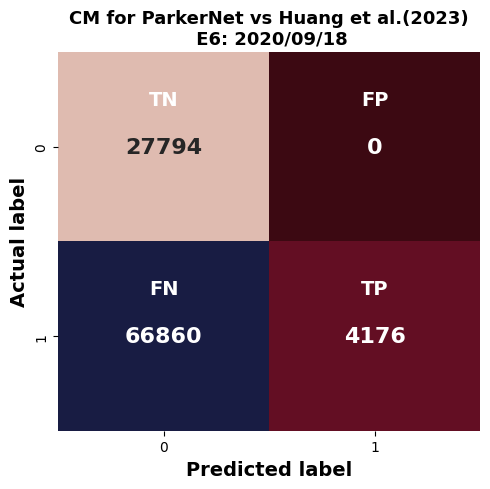

IoU at threshold 0.6: 0.0588


In [ ]:


# Load the data
huang_data_path = 'SingalROI_E6_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')

predictions = df_ensemble_E6['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E6['Class_Huang_E6_Range']

# Define threshold
threshold = 0.6

# Confusion Matrix Function
def plot_cm_and_metrics(labels, predictions, threshold=0.6):
    # Compute the confusion matrix
    cm = confusion_matrix(labels, predictions > threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title('CM for ParkerNet vs Huang et al.(2023)\n E6: 2020/09/18', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')
    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()

    # Position the labels slightly above the center of each section
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    # Show the plot
    plt.savefig('E6_Huang_CM.svg', dpi=600, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth, predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
print(f'IoU at threshold {threshold}: {iou:.4f}')

<ipython-input-98-05af11608f6e>:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


   Threshold  Precision    Recall  F1 Score       AUC
0       0.50        1.0  0.136607  0.240377  0.905084
1       0.55        1.0  0.091616  0.167853  0.905084
2       0.60        1.0  0.058787  0.111046  0.905084
3       0.65        1.0  0.027521  0.053568  0.905084
4       0.70        1.0  0.004885  0.009722  0.905084
5       0.75        1.0  0.002168  0.004326  0.905084
6       0.80        0.0  0.000000  0.000000  0.905084
7       0.85        0.0  0.000000  0.000000  0.905084
8       0.90        0.0  0.000000  0.000000  0.905084
9       0.95        0.0  0.000000  0.000000  0.905084


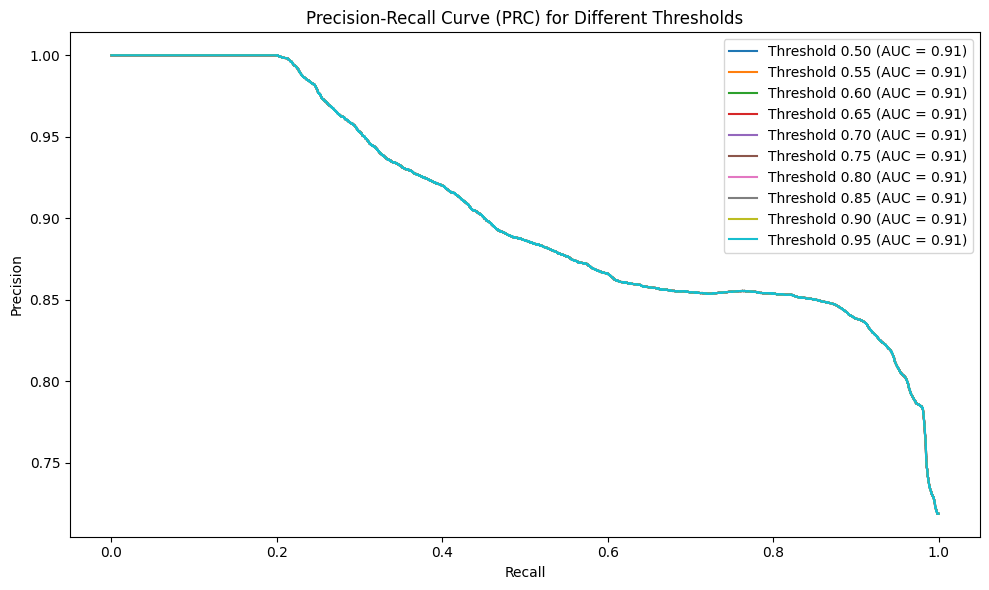

In [ ]:



huang_data_path = 'SingalROI_E6_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E6['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E6['Class_Huang_E6_Range']

# Define thresholds for analysis
thresholds = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store metrics for each threshold
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Create an empty DataFrame to store the metrics for each threshold
metrics_df = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Function to calculate confusion matrix and metrics
def calculate_metrics(labels, predictions, threshold):
    cm = confusion_matrix(labels, predictions > threshold)
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calculate Precision-Recall curve and AUC
    precision_curve, recall_curve, _ = precision_recall_curve(labels, predictions)
    auc_score = auc(recall_curve, precision_curve)

    return precision, recall, f1_score, auc_score

# Loop through each threshold and calculate metrics
for threshold in thresholds:
    precision, recall, f1_score, auc_score = calculate_metrics(ground_truth, predictions, threshold)

    # Add the results to the metrics dataframe using pd.concat
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1_score],
        'AUC': [auc_score]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)

# Plot the Precision-Recall curve and include AUC in the legend
plt.figure(figsize=(10, 6))
for threshold in thresholds:
    # Get precision and recall for the current threshold
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Plot each threshold with its AUC score in the legend
    plt.plot(recall_curve, precision_curve, label=f'Threshold {threshold:.2f} (AUC = {auc_score:.2f})')

plt.title('Precision-Recall Curve (PRC) for Different Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

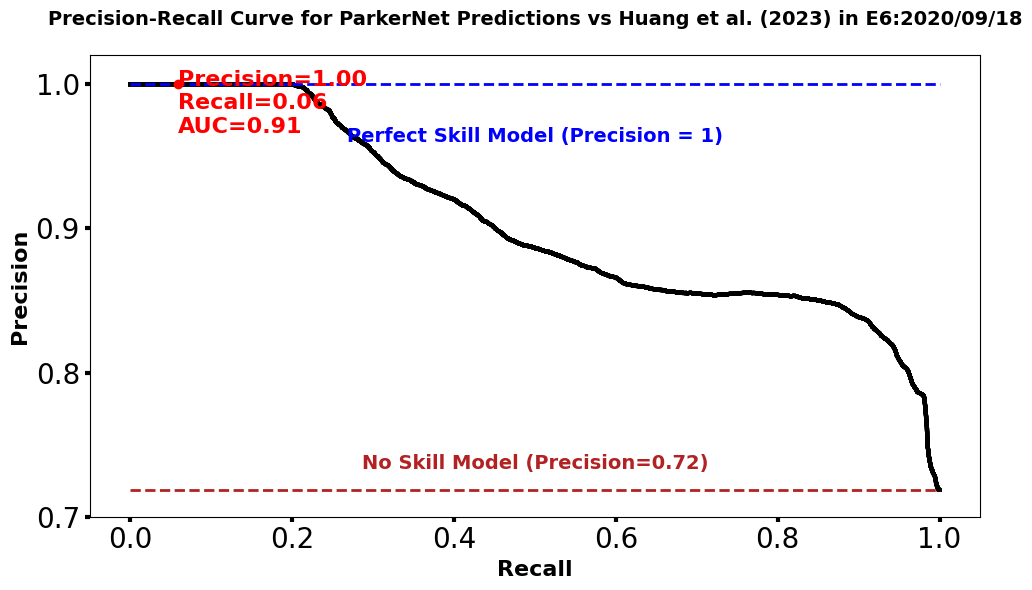

In [ ]:

# Load the data
huang_data_path = 'SingalROI_E6_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E6['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E6['Class_Huang_E6_Range']

# Define thresholds (from 0.5 to 0.95)
thresholds = np.round(np.arange(0.5, 0.95, 0.05), 2)

# Initialize lists to store the Precision-Recall curve and AUC for each threshold
precision_dict = {}
recall_dict = {}
auc_dict = {}

# Calculate Precision-Recall curve and AUC for each threshold
for threshold in thresholds:
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Store precision, recall, and auc values for each threshold
    precision_dict[threshold] = precision_curve
    recall_dict[threshold] = recall_curve
    auc_dict[round(threshold, 2)] = auc_score  # Round threshold to two decimal places

# Plot Precision-Recall curves for all thresholds
plt.figure(figsize=(10, 6))

for threshold in thresholds:
    plt.plot(recall_dict[threshold], precision_dict[threshold], color='black', linewidth=3)

# Provided precision and recall at threshold 0.6
threshold_0_6_precision = 1
threshold_0_6_recall =  0.058787

# Calculate AUC at threshold 0.6
auc_at_06 = auc_dict[0.6]  # AUC for threshold 0.6

# Plot the red dot for threshold 0.6
plt.plot(threshold_0_6_recall, threshold_0_6_precision, 'k-', label=f'Model Precision-Recall curve at 0.60 threshold')

# Calculate No Skill Model baseline
num_positives = np.sum(ground_truth == 1)
num_total = len(ground_truth)
no_skill_precision = num_positives / num_total
no_skill_recall = num_positives / num_total  # Recall is the same as the proportion of positives

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.005),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.95),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')

# Adding labels and title
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Huang et al. (2023) in E6:2020/09/18\n', fontsize=14, fontweight='bold')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(threshold_0_6_recall, threshold_0_6_precision, color='red', zorder=5)

# Add the red dot annotation for threshold 0.6
plt.annotate(f'Precision={threshold_0_6_precision:.2f}\nRecall={threshold_0_6_recall:.2f}\nAUC={auc_at_06:.2f}',
             (threshold_0_6_recall, threshold_0_6_precision),
             textcoords="offset points",
             xytext=(0,10),
             ha='left', va= 'top', fontsize=16, fontweight='bold', color='red')

# Set y-axis limits to ensure the perfect skill line is visible
plt.ylim(0.7, 1.02)
# Customize y-axis ticks to show 0.1 and 0.9
plt.yticks(np.arange(0.7, 1.02, 0.1))  # Set y-ticks from 0 to 1 with step of 0.1

# Apply the tick parameters to all axes after plotting
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks


#plt.savefig('E6_Huang_Prc.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


 (True Negatives):  94065
 (False Positives):  4160
(False Negatives):  589
 (True Positives):  16
Precision: 0.0038
Recall: 0.0264
F1 Score: 0.0067
Total Switchbacks (Ground Truth 1):  605
Intersection over Union (IoU): 0.0034
IoU at threshold 0.6: 0.0034


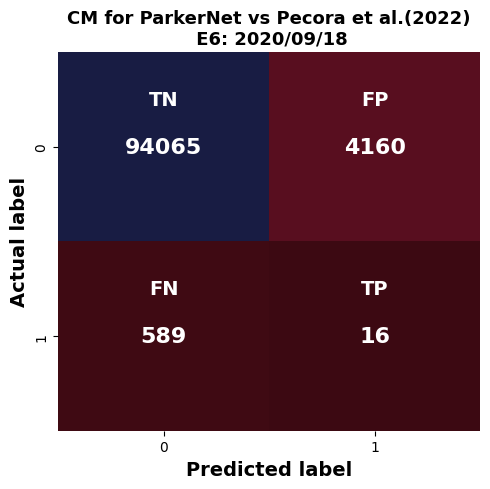

In [ ]:


pecora_data = pd.read_csv('SignalROI_E6_Pecora_10s_6hr.txt', sep='\t')

predictions = df_ensemble_E6['Weighted_Voting_AUC_PRC']

# Define threshold
threshold = 0.6

# Create a binary prediction array based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices
ground_truth_pecora = np.zeros_like(binary_predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def plot_cm_and_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)
    if np.all(cm == 0):  # Check if cm is all zeros (invalid case)
        print("Warning: Confusion matrix is all zeros!")
        return None  # Return None if confusion matrix is empty

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title(f'CM for ParkerNet vs Pecora et al.(2022)\n E6: 2020/09/18', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')

    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth_pecora, binary_predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
if iou is not None:
    print(f'IoU at threshold {threshold}: {iou:.4f}')

# Show the plot
plt.tight_layout()
plt.savefig('E6_Pecora_CM_1.svg', dpi=600, bbox_inches='tight')  # Save after the plot is created
plt.show()

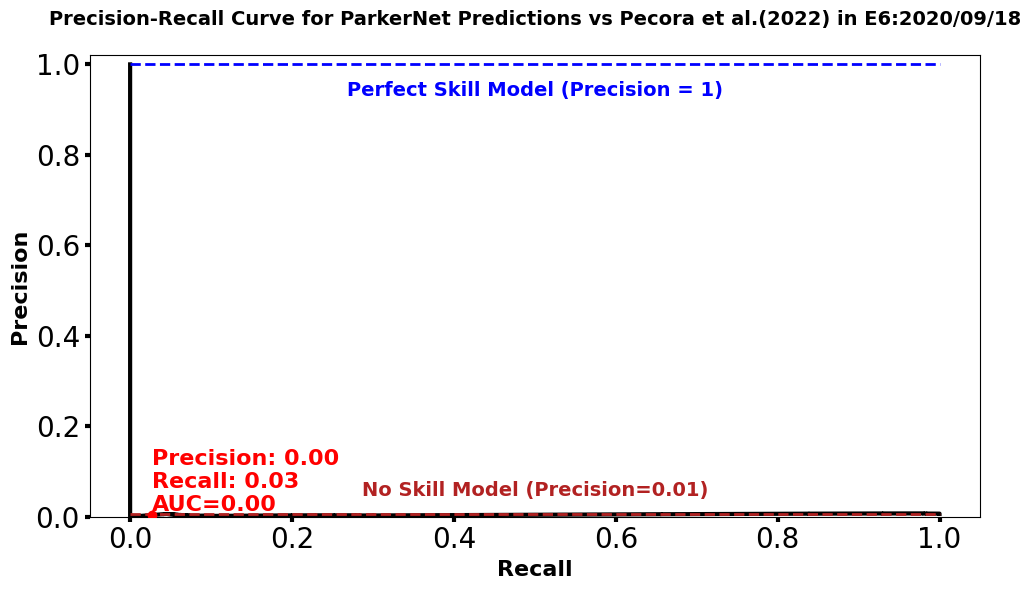

In [ ]:



pecora_data = pd.read_csv('SignalROI_E6_Pecora_10s_6hr.txt', sep='\t')  # Pecora data
predictions = df_ensemble_E6['Weighted_Voting_AUC_PRC']

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Adjust Pecora data based on the start and end indices (10-second window)
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)

# Construct ground truth based on adjusted indices for Pecora data
ground_truth_pecora = np.zeros_like(predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Define thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize list to store metrics
metrics_list = []

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def calculate_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1_score

# Evaluate metrics at various thresholds
for threshold in thresholds:
    precision, recall, f1_score = calculate_metrics(ground_truth_pecora, predictions, threshold)
    metrics_list.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})

# Convert metrics list to dataframe
metrics_df = pd.DataFrame(metrics_list)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ground_truth_pecora, predictions)

# **Perfect Skill** line will be precision=1, recall=1 across all recall values
perfect_skill = np.ones_like(recall)

# **No Skill** line is precision = the proportion of positive samples in the ground truth
no_skill_precision = np.sum(ground_truth_pecora == 1) / len(ground_truth_pecora)  # Proportion of positive samples
no_skill = np.full_like(recall, no_skill_precision)

# AUC at threshold 0.6
threshold_06_index = np.where(thresholds >= 0.6)[0][0]
precision_at_06 = metrics_df.loc[threshold_06_index, 'Precision']
recall_at_06 = metrics_df.loc[threshold_06_index, 'Recall']
auc_at_06 = auc(recall, precision)  # Calculate AUC value

plt.figure(figsize=(10, 6))

# Plot Precision-Recall Curve
plt.plot(recall, precision, color='black', lw=3, label=f'Model Precision-Recall Curve at 0.6 threshold')


# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.01),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.9),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')


# Plot Precision and Recall values at threshold 0.6 directly on the graph
plt.text(recall_at_06, precision_at_06, f'Precision: {precision_at_06:.2f}\nRecall: {recall_at_06:.2f}\nAUC={auc_at_06:.2f}', color='red', fontsize=16, fontweight = 'bold', ha='left', va='bottom')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(recall_at_06, precision_at_06, color='red', zorder=5)

# Labels and Title
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Pecora et al.(2022) in E6:2020/09/18\n', fontsize=14, fontweight='bold')

plt.ylim(0, 1.02)
plt.yticks(np.arange(0, 1.02, 0.2))
# Display the dataframe with metrics at different thresholds
#display(metrics_df)
# Increase the size of the x and y axis tick marks
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks
#
#plt.savefig('E6_Pecora_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


ENCOUNTER 7

In [ ]:
# Read in the dataset for predicting
df_E7 = pd.read_csv('PSP_E7_ForPrediction.txt', sep="\t", parse_dates=['Datetime'])

# Separate the 'Class_Huang_Ex' column into df_gt
df_gt_E7 = df_E7[['Class_Huang_E7_Range']].copy()

pd.set_option('future.no_silent_downcasting', True)
df_gt_E7['Class_Huang_E7_Range'] = df_gt_E7['Class_Huang_E7_Range'].replace({True: 1, False: 0}).infer_objects(copy=False).astype(int)
# Create df_test by dropping the 'Class_Huang_Ex' column and other columns not needed
df_test_E7= df_E7.drop(columns=['Class_Huang_E7_Range'])

df_test_E7.pop("X_HCI")
df_test_E7.pop("Y_HCI")
df_test_E7.pop("Z_HCI")
display(df_test_E7)

Datetime        B_r       Bmag        B_t  \
0     2021-01-12 00:00:00.000000000  17.814236  41.535600 -37.521449   
1     2021-01-12 00:00:00.873799999  19.399466  42.466661 -37.776686   
2     2021-01-12 00:00:01.747599999  17.717973  42.221923 -38.324460   
3     2021-01-12 00:00:02.621399999  13.897688  41.848888 -39.473836   
4     2021-01-12 00:00:03.495199999  19.183878  42.398007 -37.809652   
...                             ...        ...        ...        ...   
98875 2021-01-12 23:59:56.974996393  68.940170  70.108894 -12.747940   
98876 2021-01-12 23:59:57.848796393  69.154457  70.432934 -13.358862   
98877 2021-01-12 23:59:58.722596393  68.644681  70.209396 -14.739983   
98878 2021-01-12 23:59:59.596396393  68.875864  70.423596 -14.683262   
98879 2021-01-13 00:00:00.470196393  69.133729  70.490287 -13.762559   

            B_n      V_r       V_t      V_n        Vmag       V_nr  \
0     -8.362526  306.013  40.28250 -0.77722  308.652938  40.289997   
1     -6.637471  306.013  40.28250 -0.77722  308.652938  40.289997   
2     -6.609310  306.013  40.28250 -0.77722  308.652938  40.289997   
3     -8.688779  317.594  44.25850 -1.91183  320.663006  44.299773   
4     -5.241170  305.668  36.07300 -0.63640  307.789193  36.078613   
...         ...      ...       ...      ...         ...        ...   
98875  5.482871  440.637  -1.34368 -2.09731  440.639049   2.490820   
98876  5.307204  445.379  -3.35166 -1.94347  445.391611   3.874365   
98877  6.438635  447.851  -9.68090  2.95539  447.955621  10.121964   
98878  5.664733  447.851  -9.68090  2.95539  447.955621  10.121964   
98879  6.309063  447.851  -9.68090  2.95539  447.955621  10.121964   

       ProtonDensity  
0           140.8950  
1           140.8950  
2           140.8950  
3           122.3400  
4           131.8760  
...              ...  
98875        55.4445  
98876        50.4560  
98877        47.5483  
98878        47.5483  
98879        47.5483  

[98880 rows x 11 columns]

In [ ]:
df_gt_allpreds_E7 = pd.read_csv('ParkerNet_allModel_averaged_predictions_E7_20210112.csv')
display(df_gt_allpreds_E7)

Class_Huang_E7_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.636117              0.778164   
1                         0              0.636482              0.777926   
2                         0              0.639039              0.777701   
3                         0              0.641618              0.777965   
4                         0              0.643883              0.777323   
...                     ...                   ...                   ...   
98825                     0              0.751036              0.789669   
98826                     0              0.750871              0.789899   
98827                     0              0.750999              0.789716   
98828                     0              0.750388              0.789510   
98829                     0              0.749816              0.789068   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.588504               0.765886              0.582340   
1                  0.588714               0.766686              0.581585   
2                  0.589028               0.767213              0.580806   
3                  0.589636               0.767859              0.580301   
4                  0.589132               0.768660              0.577425   
...                     ...                    ...                   ...   
98825              0.727342               0.811545              0.833985   
98826              0.727330               0.811665              0.833850   
98827              0.727558               0.811800              0.833556   
98828              0.727604               0.812236              0.833917   
98829              0.727423               0.812010              0.833737   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.616913              0.649699              0.697456   
1                  0.611313              0.649776              0.697938   
2                  0.606789              0.650461              0.698042   
3                  0.601268              0.649226              0.698384   
4                  0.595551              0.651783              0.699033   
...                     ...                   ...                   ...   
98825              0.261037              0.696583              0.702812   
98826              0.261655              0.697217              0.702985   
98827              0.261928              0.696529              0.702671   
98828              0.263382              0.696101              0.702940   
98829              0.264183              0.695123              0.703001   

       Preds_splitM_seed641  ...  Preds_splitM_seed1843  \
0                  0.643355  ...               0.761302   
1                  0.645148  ...               0.761142   
2                  0.647063  ...               0.761228   
3                  0.648608  ...               0.762085   
4                  0.650894  ...               0.761935   
...                     ...  ...                    ...   
98825              0.811021  ...               0.755369   
98826              0.810512  ...               0.754813   
98827              0.810981  ...               0.754911   
98828              0.810357  ...               0.755045   
98829              0.810918  ...               0.755039   

       Preds_splitM_seed2221  Preds_splitM_seed3060  Preds_splitM_seed3247  \
0                   0.821427               0.809603               0.778581   
1                   0.822361               0.808814               0.779287   
2                   0.822558               0.808534               0.779732   
3                   0.823634               0.808042               0.780256   
4                   0.824129               0.807168               0.780727   
...                      ...                    ...                    ...   
98825               0.859219         

In [ ]:
df_test_E7.reset_index(drop=True, inplace=True)
df_gt_allpreds_E7.reset_index(drop=True, inplace=True)
df_ensemble_E7 = pd.concat([df_gt_allpreds_E7, df_test_E7], axis=1, join='inner')
display(df_ensemble_E7)

Class_Huang_E7_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                         0              0.636117              0.778164   
1                         0              0.636482              0.777926   
2                         0              0.639039              0.777701   
3                         0              0.641618              0.777965   
4                         0              0.643883              0.777323   
...                     ...                   ...                   ...   
98825                     0              0.751036              0.789669   
98826                     0              0.750871              0.789899   
98827                     0              0.750999              0.789716   
98828                     0              0.750388              0.789510   
98829                     0              0.749816              0.789068   

       Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                  0.588504               0.765886              0.582340   
1                  0.588714               0.766686              0.581585   
2                  0.589028               0.767213              0.580806   
3                  0.589636               0.767859              0.580301   
4                  0.589132               0.768660              0.577425   
...                     ...                    ...                   ...   
98825              0.727342               0.811545              0.833985   
98826              0.727330               0.811665              0.833850   
98827              0.727558               0.811800              0.833556   
98828              0.727604               0.812236              0.833917   
98829              0.727423               0.812010              0.833737   

       Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                  0.616913              0.649699              0.697456   
1                  0.611313              0.649776              0.697938   
2                  0.606789              0.650461              0.698042   
3                  0.601268              0.649226              0.698384   
4                  0.595551              0.651783              0.699033   
...                     ...                   ...                   ...   
98825              0.261037              0.696583              0.702812   
98826              0.261655              0.697217              0.702985   
98827              0.261928              0.696529              0.702671   
98828              0.263382              0.696101              0.702940   
98829              0.264183              0.695123              0.703001   

       Preds_splitM_seed641  ...        B_r       Bmag        B_t       B_n  \
0                  0.643355  ...  17.814236  41.535600 -37.521449 -8.362526   
1                  0.645148  ...  19.399466  42.466661 -37.776686 -6.637471   
2                  0.647063  ...  17.717973  42.221923 -38.324460 -6.609310   
3                  0.648608  ...  13.897688  41.848888 -39.473836 -8.688779   
4                  0.650894  ...  19.183878  42.398007 -37.809652 -5.241170   
...                     ...  ...        ...        ...        ...       ...   
98825              0.811021  ...  69.725159  71.129804 -14.065960  4.196412   
98826              0.810512  ...  69.313484  71.201214 -16.286615  6.390343   
98827              0.810981  ...  68.699975  70.562405 -16.104859  7.386460   
98828              0.810357  ...  68.814132  70.581157 -15.694422  6.746629   
98829              0.810918  ...  68.979887  70.838415 -16.120057  6.463240   

           V_r        V_t       V_n        Vmag       V_nr  ProtonDensity  
0      306.013  40.282500 -0.777220  308.652938  40.289997       140.8950  
1      306.013  40.282500 -0.777220  308.652938  40.289997       140.8950  
2      306.013  40.282500 -0.777220  308.652938  40.289997       140.8950  
3      317.594  44.258500 -1.911830  32

In [ ]:
df_ensemble_E7['prediction_0.6'] = (df_ensemble_E7['Weighted_Voting_AUC_PRC'] > 0.6).astype(int)
df_ensemble_E7.to_csv('predictions_E7.csv', index=False)

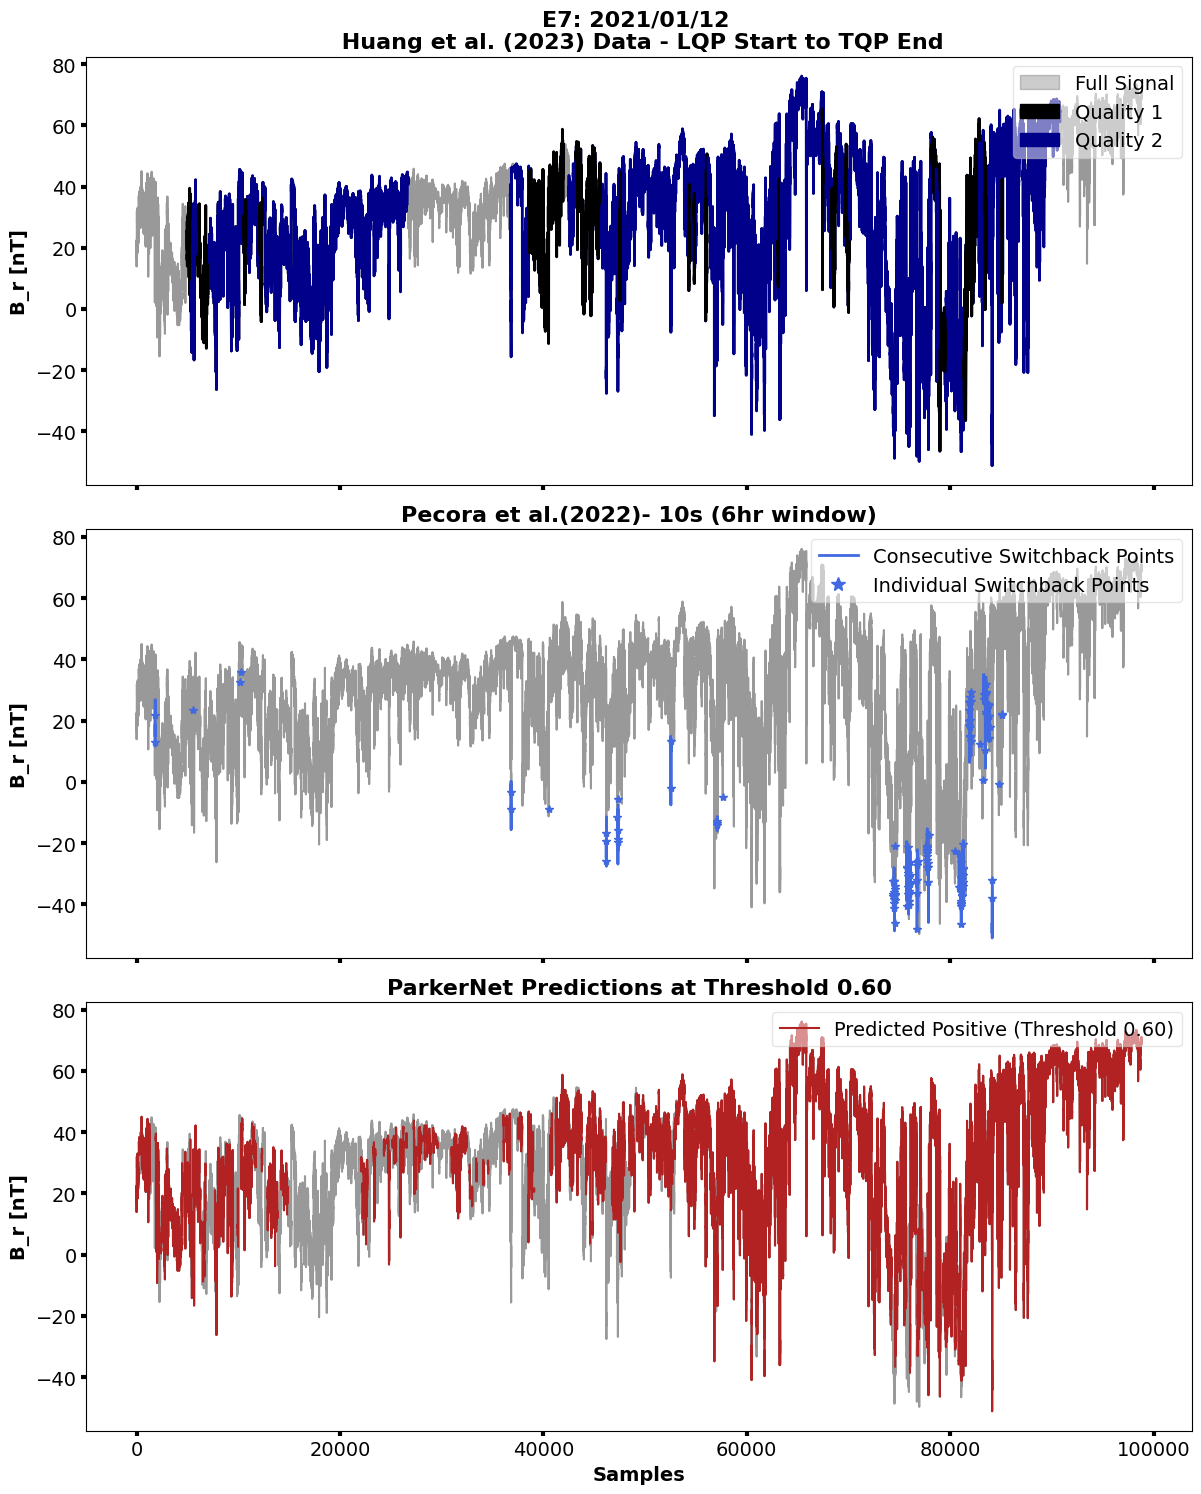

In [ ]:



roi_data = pd.read_csv('SingalROI_E7_Huang_allRegions.txt', sep='\t')


signal_data = df_ensemble_E7['B_r']
predictions = df_ensemble_E7['Weighted_Voting_AUC_PRC']

# Define the threshold (set to 0.6)
threshold = 0.6

# Define a color map for quality levels
quality_colors = {
    1: 'black',
    2: '#00008B',  # Dark Blue for Quality 1
    3: '#CC5500',  # Burnt Orange for Quality 2
    4: '#8B0000',  # Red Brown for Quality 3
    5: '#8B4513'   # Red Brown for Quality 4
}

# Load the Pecora data 10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E7_Pecora_10s_6hr.txt', sep='\t')

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds
# Create binary mask for predictions based on the threshold
binary_predictions = (predictions > threshold).astype(int)


# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Perform DBSCAN clustering on the start indices
indices = pecora_data['start_index'].values.reshape(-1, 1)  # Reshape for DBSCAN
db = DBSCAN(eps=15, min_samples=2)  # Adjust parameters as needed
labels = db.fit_predict(indices)

# Initialize clusters list
clusters = []

# Group indices by cluster labels
for label in np.unique(labels):
    if label != -1:  # Skip noise
        cluster_indices = indices[labels == label].flatten()
        start_index = int(cluster_indices[0])
        end_index = int(cluster_indices[-1])
        clusters.append((start_index, end_index))

# Create a figure with three subplots (top, middle, bottom)
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})
# --- Top Subplot: Full Ground Truth Switchbacks (LQP Start to TQP End) for Huang ---
axs[0].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Track legend patches in defined order
legend_patches = [mpatches.Patch(color='black', alpha=0.2, label='Full Signal')]
added_qualities = set()  # Track added quality levels to avoid duplicates

# Plot each switchback (from LQP Start to TQP End) with color based on quality
for _, row in roi_data.iterrows():
    quality_flag = row['QualityFlag']
    color = quality_colors.get(quality_flag, 'gray')  # Default to gray if the quality level is unknown

    # Define start and end points of the full ground truth switchback
    switchback_start = row['LQP_Start_Index']
    switchback_end = row['TQP_End_Index']

    # Plot the full ground truth switchback as a solid line
    axs[0].plot(range(switchback_start, switchback_end), signal_data[switchback_start:switchback_end], color=color, linewidth=2)

    # Add switchback region to legend if not already added
    if quality_flag not in added_qualities:
        legend_patches.append(mpatches.Patch(color=color, label=f'Quality {quality_flag}'))
        added_qualities.add(quality_flag)

# Sort the legend patches to display qualities in ascending order
legend_patches = [legend_patches[0]] + sorted(legend_patches[1:], key=lambda x: int(x.get_label().split()[-1]))

# Add legend for the top plot
axs[0].legend(handles=legend_patches, loc='upper right', fontsize=14,framealpha=0.5)
axs[0].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[0].set_title('E7: 2021/01/12 \n Huang et al. (2023) Data - LQP Start to TQP End', fontsize=16, fontweight='bold')

# --- Middle Subplot: Pecora Data (Sparse Points and DBSCAN Segments) ---
axs[1].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Plot sparse points as asterisks
sparse_points_color = '#4169E1'  # Royal Blue
for _, row in pecora_data.iterrows():
    start_idx = int(row['start_index'])
    axs[1].plot(start_idx, signal_data[start_idx], marker='*', color=sparse_points_color)

# Plot clustered segments
for start_idx, end_idx in clusters:
    axs[1].plot(range(start_idx, end_idx), signal_data[start_idx:end_idx], color=sparse_points_color, linewidth=2)

# Add legend for Pecora data
pecora_line = Line2D([0], [0], color=sparse_points_color, lw=2, label='Consecutive Switchback Points')
sparse_asterisk = Line2D([0], [0], color=sparse_points_color, marker='*', linestyle='None', markersize=10, label='Individual Switchback Points')
axs[1].legend(handles=[pecora_line, sparse_asterisk], loc='upper right', fontsize=14, framealpha=0.5)

axs[1].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[1].set_title('Pecora et al.(2022)- 10s (6hr window)', fontsize=16, fontweight='bold')

# --- Bottom Subplot: Model Predictions ---
model_prediction_line = signal_data.copy()
model_prediction_line[binary_predictions == 0] = np.nan  # Mask out negative predictions
model_prediction_color = '#B22222'
axs[2].plot(signal_data, color='black', alpha=0.4)
axs[2].plot(model_prediction_line, color=model_prediction_color, linewidth=1.5, label=f'Predicted Positive (Threshold {threshold:.2f})')

axs[2].set_xlabel('Samples', fontsize=14, fontweight='bold')
axs[2].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[2].set_title(f'ParkerNet Predictions at Threshold {threshold:.2f}', fontsize=16, fontweight='bold')
axs[2].legend(loc='upper right', fontsize=14, framealpha=0.5)

# Adjust layout and show the plot for Pecora and Model Predictions
plt.tight_layout()
# Apply tick parameters to all axes after plotting
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, width=3)  # x-axis ticks
    ax.tick_params(axis='y', labelsize=14, width=3)  # y-axis ticks

#plt.savefig('E7_preds_DBSCAN.svg', dpi=600, bbox_inches='tight')
plt.show()

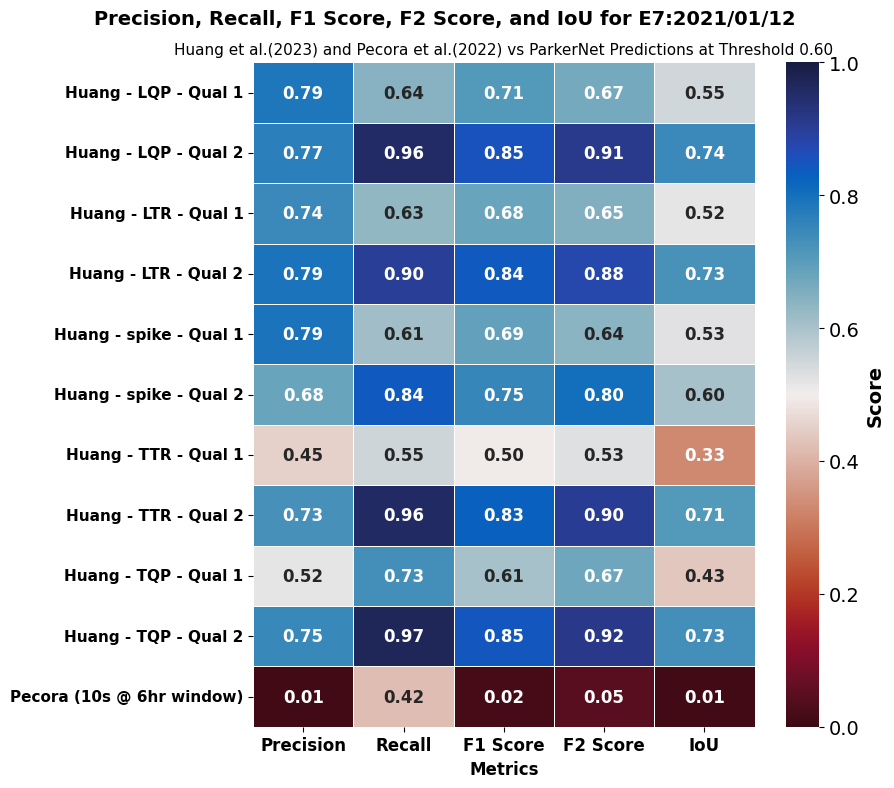

In [ ]:



huang_data_path = 'SingalROI_E7_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E7['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E7['Class_Huang_E7_Range']

# Define threshold
threshold = 0.6

# Define regions for Huang ground truths
regions = {
    "LQP": ("LQP_Start_Index", "LQP_End_Index"),
    "LTR": ("LQP_End_Index", "spike_Start_Index"),
    "spike": ("spike_Start_Index", "spike_End_Index"),
    "TTR": ("spike_End_Index", "TQP_Start_Index"),
    "TQP": ("TQP_Start_Index", "TQP_End_Index")
}

# Initialize lists to store Precision, Recall, F1, F2, and IoU values for the heatmap
heatmap_data = []
row_labels = []

# Loop through regions and quality flags for Huang data
for region, (start_col, end_col) in regions.items():
    for quality in sorted(roi_data['QualityFlag'].unique()):
        row_labels.append(f"Huang - {region} - Qual {quality}")
        row_data = []

        # Filter quality rows for the current region and quality
        quality_rows = roi_data[roi_data['QualityFlag'] == quality]
        ground_truth_segment = []



        # Construct ground truth and predictions for the current region and quality
        for _, row in quality_rows.iterrows():
            start, end = row[start_col], row[end_col]
            gt_segment = ground_truth[start:end].values  # Get the ground truth for the segment
            pred_segment = (predictions[start:end] >= threshold).astype(int).values  # Get the predicted values
            ground_truth_segment.extend(gt_segment)
            ground_truth_segment.extend(pred_segment)

        # Calculate confusion matrix
        cm = confusion_matrix(ground_truth_segment[:len(ground_truth_segment)//2], ground_truth_segment[len(ground_truth_segment)//2:])

        # Get TP, FP, FN
        TN, FP, FN, TP = cm.ravel()

        # Calculate Precision, Recall, F1, and F2 for the current region and quality
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        F1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        F2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0

        # Calculate IoU for the current region and quality
        iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0

        # Append Precision, Recall, F1, F2, IoU results for the current region and quality
        row_data.extend([precision, recall, F1_score, F2_score, iou])

        # Append the data for the current region and quality
        heatmap_data.append(row_data)

# Load Pecora 10s 3 hr window data and model predictions
#pecora_data = pd.read_csv('SingalROI_E7_Pecora.txt', sep='\t')  # Pecora data

#Load Pecora d10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E7_Pecora_10s_6hr.txt', sep = '\t')
# Assuming df_ensemble_E7 contains model predictions
predictions_pecora = df_ensemble_E7['Weighted_Voting_AUC_PRC']

# Create binary predictions based on threshold for Pecora data
binary_predictions_pecora = (predictions_pecora >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices for Pecora (10 seconds)
ground_truth_pecora = np.zeros_like(binary_predictions_pecora)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Calculate Precision, Recall, F1, F2, and IoU for Pecora data (as one whole segment)
cm_pecora = confusion_matrix(ground_truth_pecora, binary_predictions_pecora)
TN_pecora, FP_pecora, FN_pecora, TP_pecora = cm_pecora.ravel()  # Get confusion matrix values

# Calculate Precision, Recall, F1, and F2 for Pecora (single value)
precision_pecora = TP_pecora / (TP_pecora + FP_pecora) if (TP_pecora + FP_pecora) != 0 else 0
recall_pecora = TP_pecora / (TP_pecora + FN_pecora) if (TP_pecora + FN_pecora) != 0 else 0
F1_score_pecora = (2 * precision_pecora * recall_pecora) / (precision_pecora + recall_pecora) if (precision_pecora + recall_pecora) != 0 else 0
F2_score_pecora = (5 * precision_pecora * recall_pecora) / (4 * precision_pecora + recall_pecora) if (4 * precision_pecora + recall_pecora) != 0 else 0

# Calculate IoU for Pecora
iou_pecora = TP_pecora / (TP_pecora + FP_pecora + FN_pecora) if (TP_pecora + FP_pecora + FN_pecora) != 0 else 0

# Append Pecora Precision, Recall, F1, F2, IoU to heatmap data
row_labels.append("Pecora (10s @ 6hr window)")
heatmap_data.append([precision_pecora, recall_pecora, F1_score_pecora, F2_score_pecora, iou_pecora])

# Convert heatmap data to DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["Precision", "Recall", "F1 Score", "F2 Score", "IoU"])

# Plot combined heatmap for Precision, Recall, F1, F2, and IoU (including Huang and Pecora)
fig, ax = plt.subplots(figsize=(9, 8))  # Adjust figure size for better readability

sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="pyart_balance_r", cbar_kws={'label': 'Score'},
            annot_kws={"weight": "bold", "size": 12},  # Make annotation bold
            linewidths=0.5,  # Optional: thin line between cells
            cbar=True, vmin=0, vmax=1, ax=ax)  # Set color scale to go from 0 to 1

# Title and labels in bold with line breaks for title
plt.suptitle("Precision, Recall, F1 Score, F2 Score, and IoU for E7:2021/01/12", fontsize=14, fontweight='bold', y=0.98)
ax.set_title("Huang et al.(2023) and Pecora et al.(2022) vs ParkerNet Predictions at Threshold 0.60", fontsize=11, fontweight='normal', loc='center')

# Set xlabel with bold font
ax.set_xlabel("Metrics", fontsize=12, fontweight='bold')

# Make the y-axis labels bold and adjust font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')

# Make the legend label bold
cbar = ax.collections[0].colorbar
cbar.set_label('Score', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=12, fontweight = 'bold')
# Adjust layout to ensure everything fits without excessive width

plt.tight_layout()
#plt.savefig('E7_heatmap_1.svg', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:



roi_data = pd.read_csv('SingalROI_E7_Huang_allRegions.txt', sep='\t')


signal_data = df_ensemble_E7['B_r']
predictions = df_ensemble_E7['Weighted_Voting_AUC_PRC']

# Define thresholds for predictions
thresholds = np.arange(0.5, 0.95, 0.05)

# Define a color map for quality levels
quality_colors = {
    1: 'blue',      # Quality 1
    2: 'orange',    # Quality 2
    3: 'green',     # Quality 3
    4: 'red',       # Quality 4
    5: 'purple'     # Quality 5
}

# Load the Pecora data
pecora_data = pd.read_csv('SingalROI_E7_Pecora.txt', sep='\t')

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Loop over each threshold to create separate plot for Pecora data
for threshold in thresholds:
    # Create binary mask for predictions based on the current threshold
    binary_predictions = (predictions > threshold).astype(int)

    # Create a figure with three subplots (top, middle, bottom)
    fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})

    # --- Top Subplot: Full Ground Truth Switchbacks (LQP Start to TQP End) for Huang ---
    axs[0].plot(signal_data, color='black', alpha=0.2, label='Full Signal')  # Faint background for context

    # Track legend patches in defined order
    legend_patches = [mpatches.Patch(color='black', alpha=0.2, label='Full Signal')]
    added_qualities = set()  # Track added quality levels to avoid duplicates

    # Plot each switchback (from LQP Start to TQP End) with color based on quality
    for _, row in roi_data.iterrows():
        quality_flag = row['QualityFlag']
        color = quality_colors.get(quality_flag, 'gray')  # Default to gray if the quality level is unknown

        # Define start and end points of the full ground truth switchback
        switchback_start = row['LQP_Start_Index']
        switchback_end = row['TQP_End_Index']

        # Plot the full ground truth switchback as a solid line
        axs[0].plot(range(switchback_start, switchback_end), signal_data[switchback_start:switchback_end], color=color, linewidth=2)

        # Add switchback region to legend if not already added
        if quality_flag not in added_qualities:
            legend_patches.append(mpatches.Patch(color=color, label=f'Quality {quality_flag}'))
            added_qualities.add(quality_flag)

    # Sort the legend patches to display qualities in ascending order
    legend_patches = [legend_patches[0]] + sorted(legend_patches[1:], key=lambda x: int(x.get_label().split()[-1]))

    # Add legend for the top plot
    axs[0].legend(handles=legend_patches, loc='upper right')
    axs[0].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
    axs[0].set_title('Huang Data - Full Ground Truth Switchbacks', fontsize=16, fontweight='bold')

    # --- Middle Subplot: Pecora Data (10 seconds window) ---
    axs[1].plot(signal_data, color='black', alpha=0.2, label='Full Signal')  # Faint background for context

    # Calculate start and end indices based on the Pecora data and 10-second window
    pecora_data['start_index'] = pecora_data['ClosestIndex']
    pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

    # Plot the regions marked by signal mask (1's indicate signal regions) as connected lines (Pecora data)
    for _, row in pecora_data.iterrows():
        start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
        axs[1].plot(range(start_idx, end_idx), signal_data[start_idx:end_idx], color='black', linewidth=2)

    # Plot isolated points (non-consecutive 1's) as black asterisks (Pecora data)
    pecora_non_consecutive_indices = pecora_data[pecora_data['end_index'] - pecora_data['start_index'] == 1]
    for _, row in pecora_non_consecutive_indices.iterrows():
        axs[1].scatter(row['start_index'], signal_data[row['start_index']], color='black', label='Signal Mask Regions')

    axs[1].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
    axs[1].set_title(f'Pecora Data - 10s', fontsize=16, fontweight='bold')

    # --- Bottom Subplot: Model Predictions for Pecora Data ---
    pecora_prediction_line = signal_data.copy()
    pecora_prediction_line[binary_predictions == 0] = np.nan  # Mask out negative predictions
    axs[2].plot(signal_data, color='black', label='Full Signal')
    axs[2].plot(pecora_prediction_line, color='red', linewidth=1.5, label=f'Predicted Positive (Threshold {threshold:.2f})')

    axs[2].set_xlabel('Samples', fontsize=14, fontweight='bold')
    axs[2].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
    axs[2].set_title(f'Model Predictions at Threshold {threshold:.2f}', fontsize=16, fontweight='bold')
    axs[2].legend(loc='upper right')

    # Adjust layout and show the plot for Pecora and Model Predictions
    plt.tight_layout()
    plt.show()


 (True Negatives):  8810
 (False Positives):  14993
(False Negatives):  25829
 (True Positives):  49198
Precision: 0.7664
Recall: 0.6557
F1 Score: 0.7068
Total Switchbacks (Ground Truth 1):  75027
Intersection over Union (IoU): 0.5465


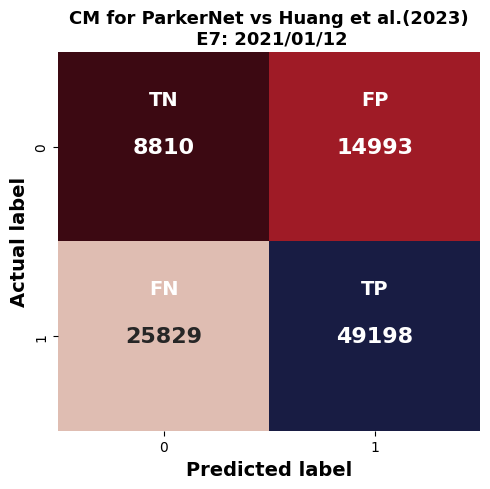

IoU at threshold 0.6: 0.5465


In [ ]:



huang_data_path = 'SingalROI_E7_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E7['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E7['Class_Huang_E7_Range']

# Define threshold
threshold = 0.6

# Confusion Matrix Function
def plot_cm_and_metrics(labels, predictions, threshold=0.6):
    # Compute the confusion matrix
    cm = confusion_matrix(labels, predictions > threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title('CM for ParkerNet vs Huang et al.(2023)\n E7: 2021/01/12', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')
    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()

    # Position the labels slightly above the center of each section
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    # Show the plot
    plt.savefig('E7_Huang_CM.svg', dpi=600, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth, predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
print(f'IoU at threshold {threshold}: {iou:.4f}')

<ipython-input-116-3e9484d7aec3>:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)


   Threshold  Precision    Recall  F1 Score      AUC
0       0.50   0.739201  0.882042  0.804329  0.71131
1       0.55   0.738605  0.798459  0.767366  0.71131
2       0.60   0.766431  0.655737  0.706776  0.71131
3       0.65   0.786030  0.481747  0.597372  0.71131
4       0.70   0.757548  0.334746  0.464319  0.71131
5       0.75   0.607858  0.164767  0.259259  0.71131
6       0.80   0.452061  0.013009  0.025290  0.71131
7       0.85   0.000000  0.000000  0.000000  0.71131
8       0.90   0.000000  0.000000  0.000000  0.71131
9       0.95   0.000000  0.000000  0.000000  0.71131


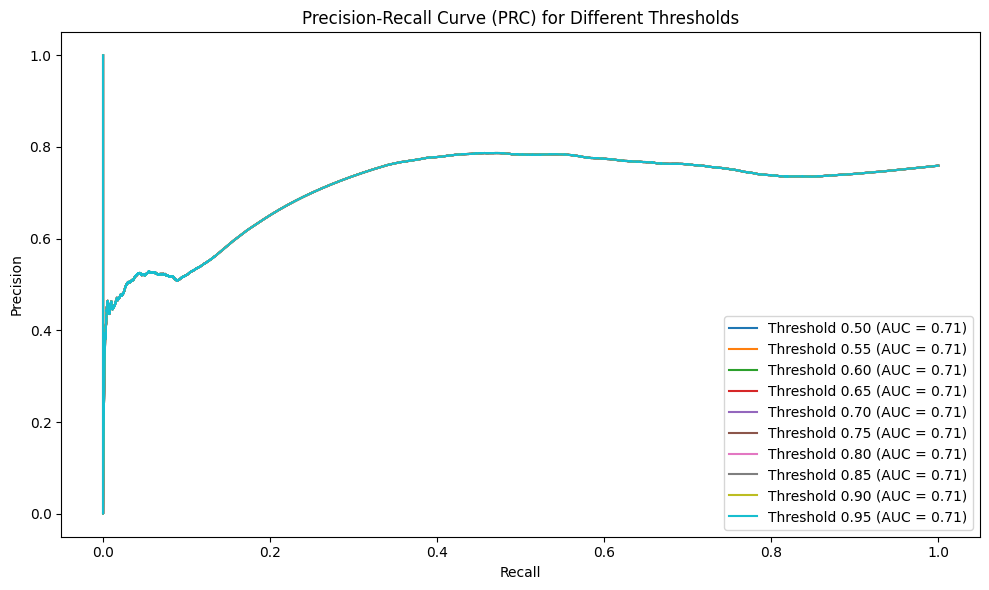

In [ ]:

huang_data_path = 'SingalROI_E7_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E7['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E7['Class_Huang_E7_Range']

# Define thresholds for analysis
thresholds = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store metrics for each threshold
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Create an empty DataFrame to store the metrics for each threshold
metrics_df = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Function to calculate confusion matrix and metrics
def calculate_metrics(labels, predictions, threshold):
    cm = confusion_matrix(labels, predictions > threshold)
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calculate Precision-Recall curve and AUC
    precision_curve, recall_curve, _ = precision_recall_curve(labels, predictions)
    auc_score = auc(recall_curve, precision_curve)

    return precision, recall, f1_score, auc_score

# Loop through each threshold and calculate metrics
for threshold in thresholds:
    precision, recall, f1_score, auc_score = calculate_metrics(ground_truth, predictions, threshold)

    # Add the results to the metrics dataframe using pd.concat
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1_score],
        'AUC': [auc_score]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)

# Plot the Precision-Recall curve and include AUC in the legend
plt.figure(figsize=(10, 6))
for threshold in thresholds:
    # Get precision and recall for the current threshold
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Plot each threshold with its AUC score in the legend
    plt.plot(recall_curve, precision_curve, label=f'Threshold {threshold:.2f} (AUC = {auc_score:.2f})')

plt.title('Precision-Recall Curve (PRC) for Different Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

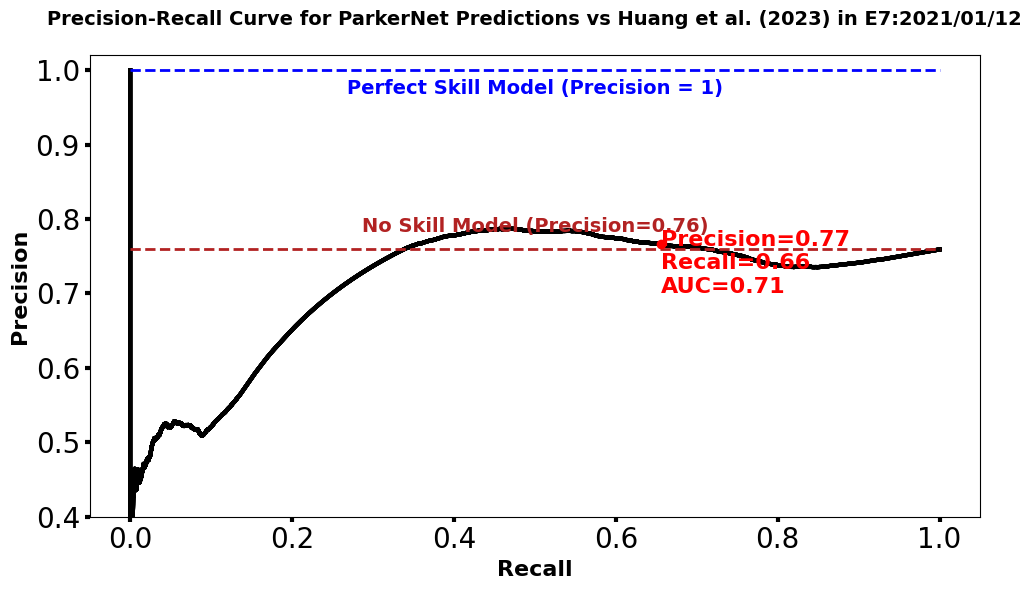

In [ ]:


huang_data_path = 'SingalROI_E7_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E7['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E7['Class_Huang_E7_Range']

# Define thresholds (from 0.5 to 0.95)
thresholds = np.round(np.arange(0.5, 0.95, 0.05), 2)

# Initialize lists to store the Precision-Recall curve and AUC for each threshold
precision_dict = {}
recall_dict = {}
auc_dict = {}

# Calculate Precision-Recall curve and AUC for each threshold
for threshold in thresholds:
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Store precision, recall, and auc values for each threshold
    precision_dict[threshold] = precision_curve
    recall_dict[threshold] = recall_curve
    auc_dict[round(threshold, 2)] = auc_score  # Round threshold to two decimal places

# Plot Precision-Recall curves for all thresholds
plt.figure(figsize=(10, 6))

for threshold in thresholds:
    plt.plot(recall_dict[threshold], precision_dict[threshold], color='black', linewidth=3)

# Provided precision and recall at threshold 0.6

threshold_0_6_precision = 0.766431
threshold_0_6_recall =  0.655737
# Calculate AUC at threshold 0.6
auc_at_06 = auc_dict[0.6]  # AUC for threshold 0.6

# Plot the red dot for threshold 0.6
plt.plot(threshold_0_6_recall, threshold_0_6_precision, 'k-', label=f'Model Precision-Recall curve at 0.60 threshold')

# Calculate No Skill Model baseline
num_positives = np.sum(ground_truth == 1)
num_total = len(ground_truth)
no_skill_precision = num_positives / num_total
no_skill_recall = num_positives / num_total  # Recall is the same as the proportion of positives

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.005),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.95),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')

# Adding labels and title
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Huang et al. (2023) in E7:2021/01/12\n', fontsize=14, fontweight='bold')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(threshold_0_6_recall, threshold_0_6_precision, color='red', zorder=5)

# Add the red dot annotation for threshold 0.6
plt.annotate(f'Precision={threshold_0_6_precision:.2f}\nRecall={threshold_0_6_recall:.2f}\nAUC={auc_at_06:.2f}',
             (threshold_0_6_recall, threshold_0_6_precision),
             textcoords="offset points",
             xytext=(0,10),
             ha='left', va= 'top', fontsize=16, fontweight='bold', color='red')

# Set y-axis limits to ensure the perfect skill line is visible
plt.ylim(0.4, 1.02)
# Customize y-axis ticks to show 0.1 and 0.9
plt.yticks(np.arange(0.4, 1.02, 0.1))  # Set y-ticks from 0 to 1 with step of 0.1

# Apply the tick parameters to all axes after plotting
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks

# Remove the legend as per request
#plt.legend(loc='upper right', bbox_to_anchor=(1, 0.95), fontsize=16, prop={'weight': 'bold'},labelspacing=0.5, markerscale=1.5)
plt.savefig('E7_Huang_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


 (True Negatives):  33761
 (False Positives):  63551
(False Negatives):  878
 (True Positives):  640
Precision: 0.0100
Recall: 0.4216
F1 Score: 0.0195
Total Switchbacks (Ground Truth 1):  1518
Intersection over Union (IoU): 0.0098
IoU at threshold 0.6: 0.0098


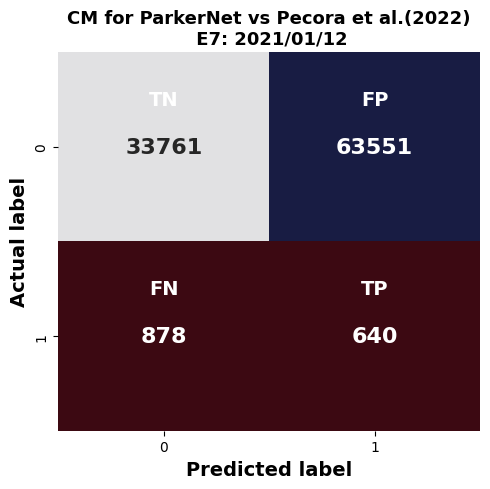

In [ ]:



pecora_data = pd.read_csv('SignalROI_E7_Pecora_10s_6hr.txt', sep='\t')

predictions = df_ensemble_E7['Weighted_Voting_AUC_PRC']


threshold = 0.6

# Create a binary prediction array based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices
ground_truth_pecora = np.zeros_like(binary_predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def plot_cm_and_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)
    if np.all(cm == 0):  # Check if cm is all zeros (invalid case)
        print("Warning: Confusion matrix is all zeros!")
        return None  # Return None if confusion matrix is empty

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title(f'CM for ParkerNet vs Pecora et al.(2022)\n E7: 2021/01/12', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')

    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth_pecora, binary_predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
if iou is not None:
    print(f'IoU at threshold {threshold}: {iou:.4f}')

# Show the plot
plt.tight_layout()
plt.savefig('E7_Pecora_CM_1.svg', dpi=600, bbox_inches='tight')  # Save after the plot is created
plt.show()

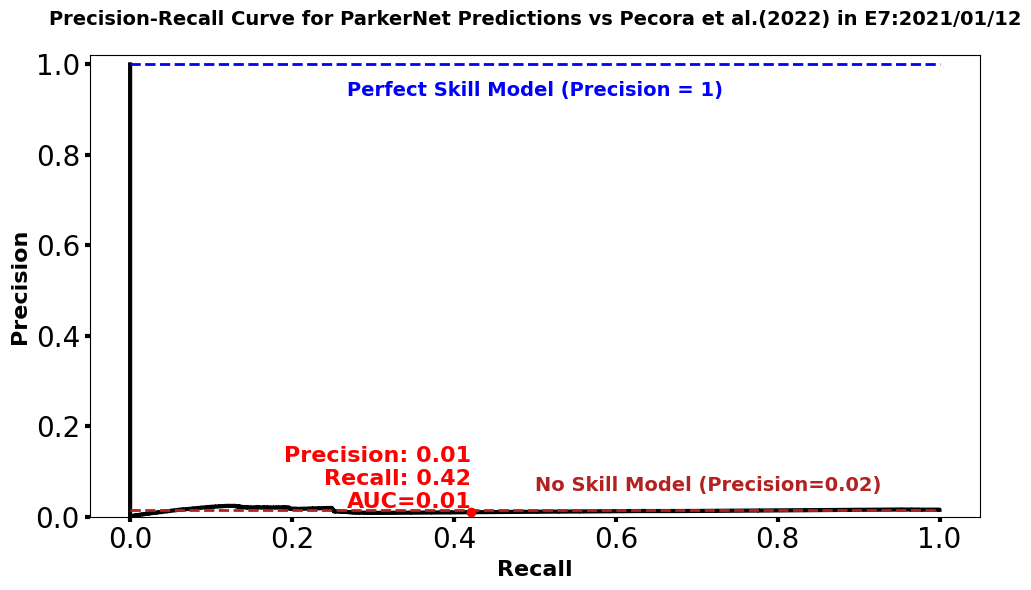

In [ ]:



pecora_data = pd.read_csv('SignalROI_E7_Pecora_10s_6hr.txt', sep='\t')
predictions = df_ensemble_E7['Weighted_Voting_AUC_PRC']

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Adjust Pecora data based on the start and end indices (10-second window)
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)

# Construct ground truth based on adjusted indices for Pecora data
ground_truth_pecora = np.zeros_like(predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Define thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize list to store metrics
metrics_list = []

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def calculate_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1_score

# Evaluate metrics at various thresholds
for threshold in thresholds:
    precision, recall, f1_score = calculate_metrics(ground_truth_pecora, predictions, threshold)
    metrics_list.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})

# Convert metrics list to dataframe
metrics_df = pd.DataFrame(metrics_list)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ground_truth_pecora, predictions)

# **Perfect Skill** line will be precision=1, recall=1 across all recall values
perfect_skill = np.ones_like(recall)

# **No Skill** line is precision = the proportion of positive samples in the ground truth
no_skill_precision = np.sum(ground_truth_pecora == 1) / len(ground_truth_pecora)  # Proportion of positive samples
no_skill = np.full_like(recall, no_skill_precision)

# AUC at threshold 0.6
threshold_06_index = np.where(thresholds >= 0.6)[0][0]
precision_at_06 = metrics_df.loc[threshold_06_index, 'Precision']
recall_at_06 = metrics_df.loc[threshold_06_index, 'Recall']
auc_at_06 = auc(recall, precision)  # Calculate AUC value

plt.figure(figsize=(10, 6))

# Plot Precision-Recall Curve
plt.plot(recall, precision, color='black', lw=3, label=f'Model Precision-Recall Curve at 0.6 threshold')

# Plot No Skill line
#plt.plot(recall, no_skill, color='#B22222', linestyle='--', lw=2, label=f'No Skill Model (Precision={no_skill_precision:.2f})')


# Plot Perfect Skill line
#plt.plot(recall, perfect_skill, color='blue', linestyle='--', lw=2, label='Perfect Skill Model (Precision = 1)')

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.01),
             textcoords="offset points",
             xytext=(0, 10),
             ha='left', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.9),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')


# Plot Precision and Recall values at threshold 0.6 directly on the graph
plt.text(recall_at_06, precision_at_06, f'Precision: {precision_at_06:.2f}\nRecall: {recall_at_06:.2f}\nAUC={auc_at_06:.2f}', color='red', fontsize=16, fontweight = 'bold', ha='right', va='bottom')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(recall_at_06, precision_at_06, color='red', zorder=5)

# Labels and Title
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Pecora et al.(2022) in E7:2021/01/12\n', fontsize=14, fontweight='bold')

plt.ylim(0, 1.02)
plt.yticks(np.arange(0, 1.02, 0.2))

# Increase the size of the x and y axis tick marks
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks

#plt.savefig('E7_Pecora_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


ENCOUNTER 8

In [ ]:
# Read in the entire dataset
df_E8 = pd.read_csv('PSP_E8_ForPrediction.txt', sep="\t", parse_dates=['Datetime'])

# Separate the 'Class_Huang_E1' column into df_gt
df_gt_E8 = df_E8[['Class_Huang_E8_Range']].copy()


pd.set_option('future.no_silent_downcasting', True)
df_gt_E8['Class_Huang_E8_Range'] = df_gt_E8['Class_Huang_E8_Range'].replace({True: 1, False: 0}).infer_objects(copy=False).astype(int)
# Create df_test by dropping the 'Class_Huang_Ex' column and other columns not needed
df_test_E8 = df_E8.drop(columns=['Class_Huang_E8_Range'])

df_test_E8.pop("X_HCI")
df_test_E8.pop("Y_HCI")
df_test_E8.pop("Z_HCI")




display(df_test_E8)

Datetime         B_r        Bmag        B_t         B_n  \
0      2021-04-26 10:00:00.559  -56.627308   85.793983 -54.320417   34.687863   
1      2021-04-26 10:00:01.433  -45.031928   84.932947 -69.413505   19.170191   
2      2021-04-26 10:00:02.307  -35.703356   87.452128 -76.798055   21.799171   
3      2021-04-26 10:00:03.181  -77.538072   88.817473 -19.880633   38.485730   
4      2021-04-26 10:00:04.055  -72.113839   85.918408 -12.268679   45.067133   
...                        ...         ...         ...        ...         ...   
123593 2021-04-27 15:59:56.123 -165.906642  197.797012   4.574950  107.599787   
123594 2021-04-27 15:59:56.997 -165.090727  197.852929  10.303380  108.557238   
123595 2021-04-27 15:59:57.870 -163.413484  198.017346  13.957413  110.959872   
123596 2021-04-27 15:59:58.744 -165.768391  197.053188  12.800578  105.768354   
123597 2021-04-27 15:59:59.618 -165.897853  196.990443  18.407642  104.614987   

            V_r       V_t        V_n        Vmag        V_nr  ProtonDensity  
0       287.976  -90.0595  -1.417990  301.733162   90.070662        501.871  
1       262.105   18.0063   0.831360  262.724093   18.025482        400.531  
2       262.105   18.0063   0.831360  262.724093   18.025482        400.531  
3       262.105   18.0063   0.831360  262.724093   18.025482        400.531  
4       263.430   28.2589   0.037897  264.941374   28.258925        377.599  
...         ...       ...        ...         ...         ...            ...  
123593  324.834  191.0300 -14.127400  377.106314  191.551675        286.706  
123594  324.834  191.0300 -14.127400  377.106314  191.551675        286.706  
123595  324.834  191.0300 -14.127400  377.106314  191.551675        286.706  
123596  324.834  191.0300 -14.127400  377.106314  191.551675        286.706  
123597  324.834  191.0300 -14.127400  377.106314  191.551675        286.706  

[123598 rows x 11 columns]

In [ ]:
df_gt_allpreds_E8 = pd.read_csv('ParkerNet_allModel_predictions_E8_Oct30_AUCPRC.csv')
display(df_gt_allpreds_E8)

Class_Huang_E8_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                          0              0.172144              0.109497   
1                          0              0.170810              0.108996   
2                          0              0.171172              0.109387   
3                          0              0.170745              0.109017   
4                          0              0.170878              0.109132   
...                      ...                   ...                   ...   
123543                     0              0.790845              0.213235   
123544                     0              0.790777              0.213482   
123545                     0              0.790652              0.213698   
123546                     0              0.790663              0.213756   
123547                     0              0.790881              0.213893   

        Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                   0.218417               0.258315              0.126965   
1                   0.218146               0.257359              0.126647   
2                   0.217629               0.253583              0.125511   
3                   0.217759               0.249233              0.126242   
4                   0.218127               0.246663              0.125523   
...                      ...                    ...                   ...   
123543              0.230104               0.479453              0.540195   
123544              0.230136               0.479199              0.541686   
123545              0.230157               0.479915              0.543316   
123546              0.230205               0.480644              0.545224   
123547              0.230240               0.481544              0.546243   

        Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                   0.179893              0.179724              0.201235   
1                   0.179342              0.178972              0.199641   
2                   0.177059              0.179034              0.197854   
3                   0.177686              0.178821              0.196328   
4                   0.173702              0.178847              0.198179   
...                      ...                   ...                   ...   
123543              0.222654              0.171070              0.167161   
123544              0.223121              0.171123              0.167185   
123545              0.223667              0.171138              0.167246   
123546              0.224080              0.171175              0.167302   
123547              0.224275              0.171218              0.167340   

        Preds_splitM_seed641  ...  Preds_splitM_seed1843  \
0                   0.136782  ...               0.232106   
1                   0.136412  ...               0.230130   
2                   0.136235  ...               0.228739   
3                   0.136462  ...               0.228097   
4                   0.136733  ...               0.227519   
...                      ...  ...                    ...   
123543              0.221588  ...               0.475669   
123544              0.221630  ...               0.475421   
123545              0.221701  ...               0.475396   
123546              0.221804  ...               0.475811   
123547              0.221723  ...               0.476488   

        Preds_splitM_seed2221  Preds_splitM_seed3060  Preds_splitM_seed3247  \
0                    0.150480               0.114881               0.158166   
1                    0.150127               0.114375               0.154800   
2                    0.149965               0.114206               0.154715   
3                    0.149541               0.113844               0.153695   
4                    0.149348               0.113507               0.153468   
...                       ...                    ...          

In [ ]:
df_test_E8.reset_index(drop=True, inplace=True)
df_gt_allpreds_E8.reset_index(drop=True, inplace=True)
df_ensemble_E8 = pd.concat([df_gt_allpreds_E8, df_test_E8], axis=1, join='inner')
display(df_ensemble_E8)

Class_Huang_E8_Range  Preds_splitM_seed493  Preds_splitM_seed552  \
0                          0              0.172144              0.109497   
1                          0              0.170810              0.108996   
2                          0              0.171172              0.109387   
3                          0              0.170745              0.109017   
4                          0              0.170878              0.109132   
...                      ...                   ...                   ...   
123543                     0              0.790845              0.213235   
123544                     0              0.790777              0.213482   
123545                     0              0.790652              0.213698   
123546                     0              0.790663              0.213756   
123547                     0              0.790881              0.213893   

        Preds_splitM_seed838  Preds_splitM_seed1022  Preds_splitM_seed123  \
0                   0.218417               0.258315              0.126965   
1                   0.218146               0.257359              0.126647   
2                   0.217629               0.253583              0.125511   
3                   0.217759               0.249233              0.126242   
4                   0.218127               0.246663              0.125523   
...                      ...                    ...                   ...   
123543              0.230104               0.479453              0.540195   
123544              0.230136               0.479199              0.541686   
123545              0.230157               0.479915              0.543316   
123546              0.230205               0.480644              0.545224   
123547              0.230240               0.481544              0.546243   

        Preds_splitM_seed324  Preds_splitM_seed369  Preds_splitM_seed564  \
0                   0.179893              0.179724              0.201235   
1                   0.179342              0.178972              0.199641   
2                   0.177059              0.179034              0.197854   
3                   0.177686              0.178821              0.196328   
4                   0.173702              0.178847              0.198179   
...                      ...                   ...                   ...   
123543              0.222654              0.171070              0.167161   
123544              0.223121              0.171123              0.167185   
123545              0.223667              0.171138              0.167246   
123546              0.224080              0.171175              0.167302   
123547              0.224275              0.171218              0.167340   

        Preds_splitM_seed641  ...         B_r        Bmag        B_t  \
0                   0.136782  ...  -56.627308   85.793983 -54.320417   
1                   0.136412  ...  -45.031928   84.932947 -69.413505   
2                   0.136235  ...  -35.703356   87.452128 -76.798055   
3                   0.136462  ...  -77.538072   88.817473 -19.880633   
4                   0.136733  ...  -72.113839   85.918408 -12.268679   
...                      ...  ...         ...         ...        ...   
123543              0.221588  ... -172.631883  200.232194   4.518288   
123544              0.221630  ... -171.385948  200.226845   4.240339   
123545              0.221701  ... -172.521743  200.452402   3.972942   
123546              0.221804  ... -171.658150  200.304191   4.720420   
123547              0.221723  ... -171.861498  200.657736   4.949675   

               B_n      V_r       V_t        V_n        Vmag        V_nr  \
0        34.687863  287.976  -90.0595  -1.417990  301.733162   90.070662   
1        19.170191  262.105   18.0063   0.831360  262.724093   18.025482   
2        21.799171  262.105   18.0063   0.831360  262.724093   18.025482   
3        38.485730  262.105   18.0063   0.831360  262.724093   18.025482   
4        45.

In [ ]:
df_ensemble_E8['prediction_0.6'] = (df_ensemble_E8['Weighted_Voting_AUC_PRC'] > 0.6).astype(int)
df_ensemble_E8.to_csv('predictions_E8.csv', index=False)

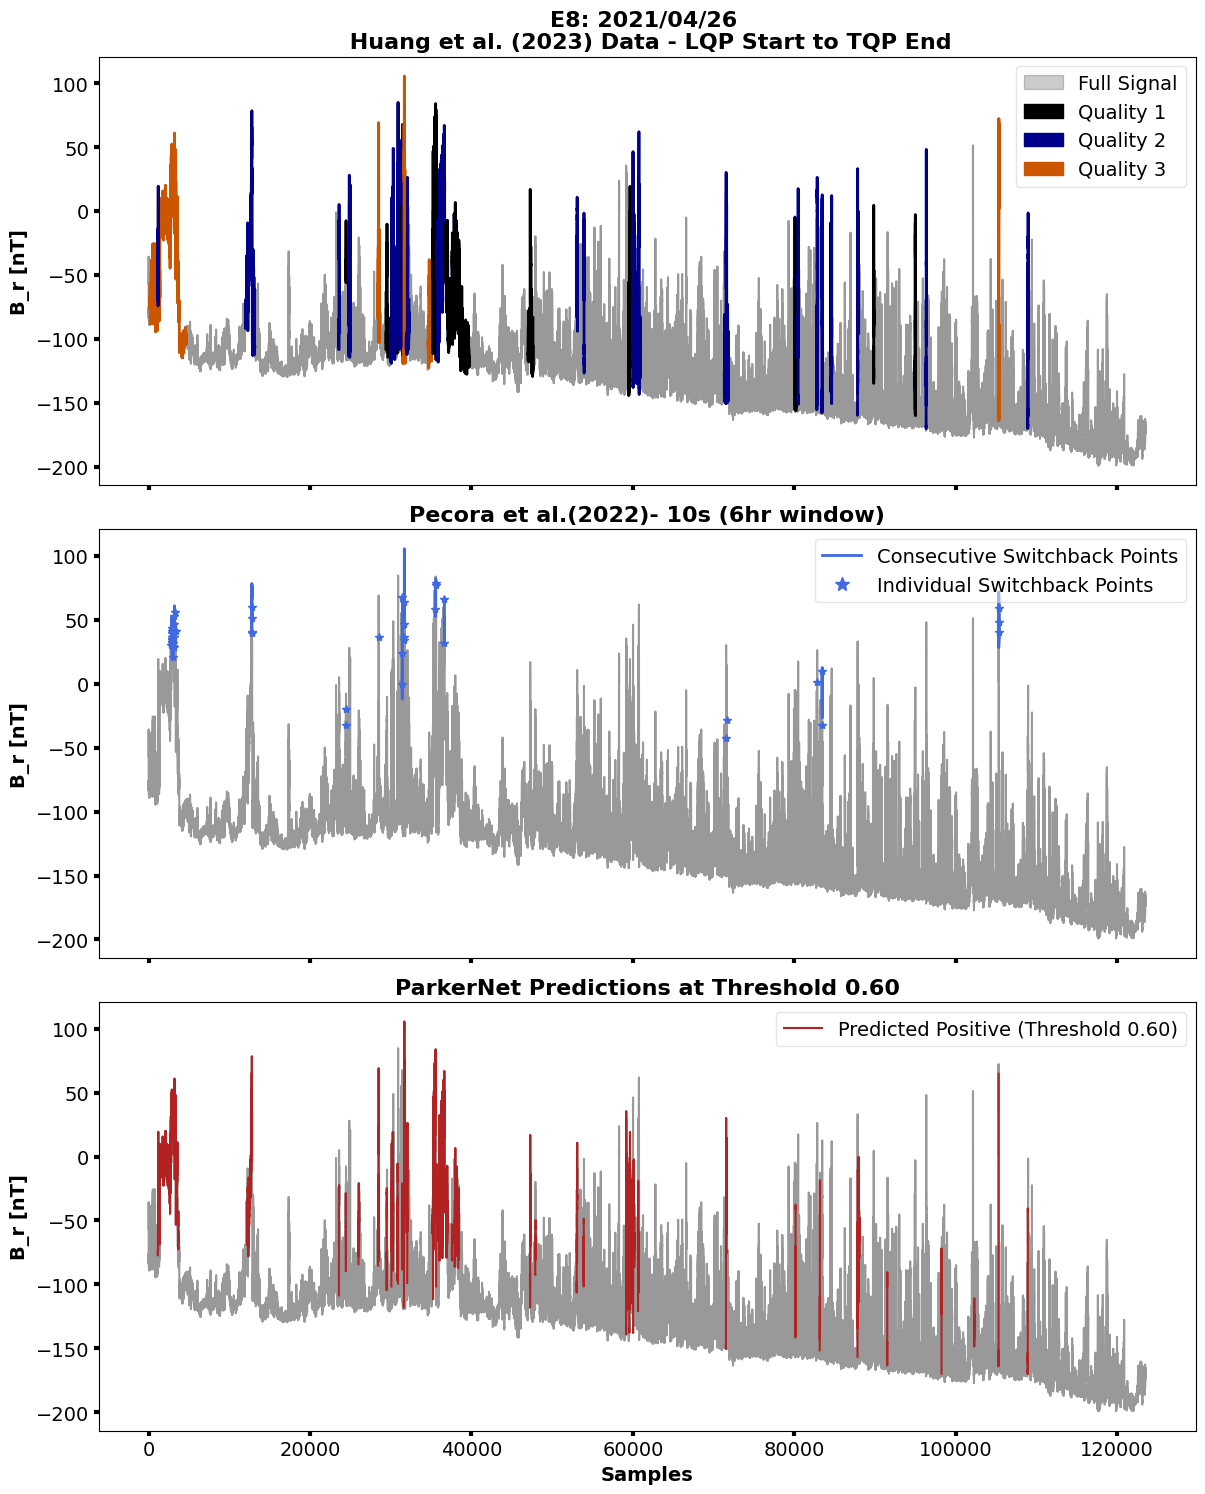

In [ ]:



roi_data = pd.read_csv('SingalROI_E8_Huang_allRegions.txt', sep='\t')

signal_data = df_ensemble_E8['B_r']
predictions = df_ensemble_E8['Weighted_Voting_AUC_PRC']

# Define the threshold (set to 0.6)
threshold = 0.6

# Define a color map for quality levels
quality_colors = {
    1: 'black',
    2: '#00008B',  # Dark Blue for Quality 1
    3: '#CC5500',  # Burnt Orange for Quality 2
    4: '#8B0000',  # Red Brown for Quality 3
    5: '#8B4513'   # Red Brown for Quality 4
}

# Load the Pecora data 10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E8_26and27_Pecora_10s_6hr.txt', sep='\t')

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds
# Create binary mask for predictions based on the threshold
binary_predictions = (predictions > threshold).astype(int)


# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Perform DBSCAN clustering on the start indices
indices = pecora_data['start_index'].values.reshape(-1, 1)  # Reshape for DBSCAN
db = DBSCAN(eps=15, min_samples=2)  # Adjust parameters as needed
labels = db.fit_predict(indices)

# Initialize clusters list
clusters = []

# Group indices by cluster labels
for label in np.unique(labels):
    if label != -1:  # Skip noise
        cluster_indices = indices[labels == label].flatten()
        start_index = int(cluster_indices[0])
        end_index = int(cluster_indices[-1])
        clusters.append((start_index, end_index))

# Create a figure with three subplots (top, middle, bottom)
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True, gridspec_kw={'height_ratios': [1, 1, 1]})
# --- Top Subplot: Full Ground Truth Switchbacks (LQP Start to TQP End) for Huang ---
axs[0].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Track legend patches in defined order
legend_patches = [mpatches.Patch(color='black', alpha=0.2, label='Full Signal')]
added_qualities = set()  # Track added quality levels to avoid duplicates

# Plot each switchback (from LQP Start to TQP End) with color based on quality
for _, row in roi_data.iterrows():
    quality_flag = row['QualityFlag']
    color = quality_colors.get(quality_flag, 'gray')  # Default to gray if the quality level is unknown

    # Define start and end points of the full ground truth switchback
    switchback_start = row['LQP_Start_Index']
    switchback_end = row['TQP_End_Index']

    # Plot the full ground truth switchback as a solid line
    axs[0].plot(range(switchback_start, switchback_end), signal_data[switchback_start:switchback_end], color=color, linewidth=2)

    # Add switchback region to legend if not already added
    if quality_flag not in added_qualities:
        legend_patches.append(mpatches.Patch(color=color, label=f'Quality {quality_flag}'))
        added_qualities.add(quality_flag)

# Sort the legend patches to display qualities in ascending order
legend_patches = [legend_patches[0]] + sorted(legend_patches[1:], key=lambda x: int(x.get_label().split()[-1]))

# Add legend for the top plot
axs[0].legend(handles=legend_patches, loc='upper right', fontsize=14,framealpha=0.5)
axs[0].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[0].set_title('E8: 2021/04/26 \n Huang et al. (2023) Data - LQP Start to TQP End', fontsize=16, fontweight='bold')

# --- Middle Subplot: Pecora Data (Sparse Points and DBSCAN Segments) ---
axs[1].plot(signal_data, color='black', alpha=0.4, label='Full Signal')  # Faint background for context

# Plot sparse points as asterisks
sparse_points_color = '#4169E1'  # Royal Blue
for _, row in pecora_data.iterrows():
    start_idx = int(row['start_index'])
    axs[1].plot(start_idx, signal_data[start_idx], marker='*', color=sparse_points_color)

# Plot clustered segments
for start_idx, end_idx in clusters:
    axs[1].plot(range(start_idx, end_idx), signal_data[start_idx:end_idx], color=sparse_points_color, linewidth=2)

# Add legend for Pecora data
pecora_line = Line2D([0], [0], color=sparse_points_color, lw=2, label='Consecutive Switchback Points')
sparse_asterisk = Line2D([0], [0], color=sparse_points_color, marker='*', linestyle='None', markersize=10, label='Individual Switchback Points')
axs[1].legend(handles=[pecora_line, sparse_asterisk], loc='upper right', fontsize=14, framealpha=0.5)

axs[1].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[1].set_title('Pecora et al.(2022)- 10s (6hr window)', fontsize=16, fontweight='bold')

# --- Bottom Subplot: Model Predictions ---
model_prediction_line = signal_data.copy()
model_prediction_line[binary_predictions == 0] = np.nan  # Mask out negative predictions
model_prediction_color = '#B22222'
axs[2].plot(signal_data, color='black', alpha=0.4)
axs[2].plot(model_prediction_line, color=model_prediction_color, linewidth=1.5, label=f'Predicted Positive (Threshold {threshold:.2f})')

axs[2].set_xlabel('Samples', fontsize=14, fontweight='bold')
axs[2].set_ylabel('B_r [nT]', fontsize=14, fontweight='bold')
axs[2].set_title(f'ParkerNet Predictions at Threshold {threshold:.2f}', fontsize=16, fontweight='bold')
axs[2].legend(loc='upper right', fontsize=14, framealpha=0.5)

# Adjust layout and show the plot for Pecora and Model Predictions
plt.tight_layout()
# Apply tick parameters to all axes after plotting
for ax in axs:
    ax.tick_params(axis='x', labelsize=14, width=3)  # x-axis ticks
    ax.tick_params(axis='y', labelsize=14, width=3)  # y-axis ticks

#plt.savefig('E8_preds_DBSCAN.svg', dpi=600, bbox_inches='tight')
plt.show()

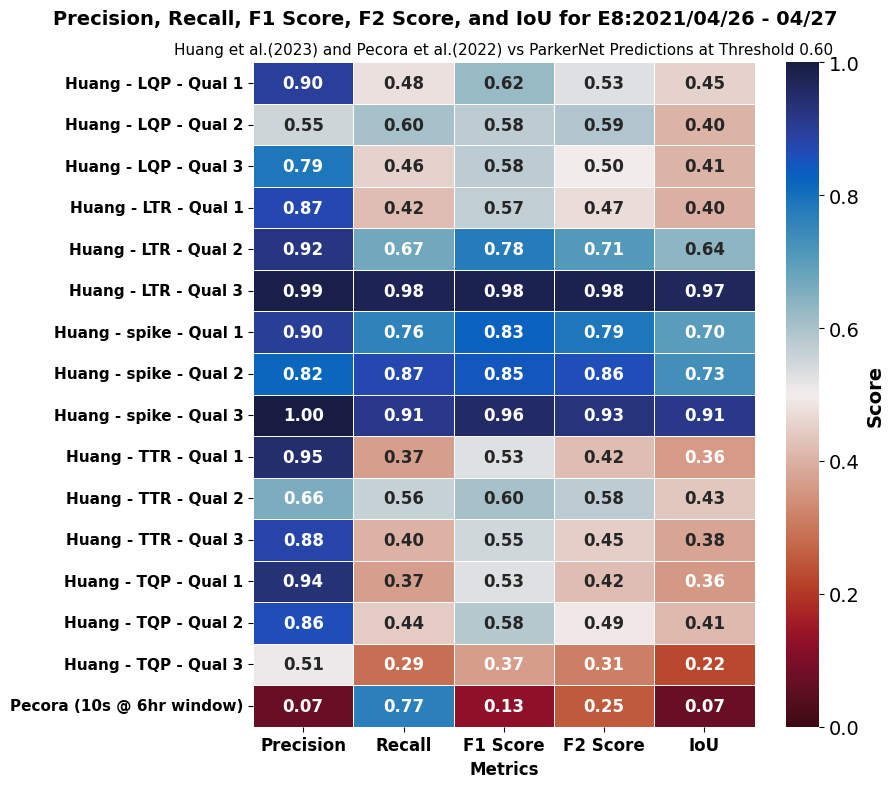

In [ ]:



huang_data_path = 'SingalROI_E8_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E8['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E8['Class_Huang_E8_Range']

# Define threshold
threshold = 0.6

# Define regions for Huang ground truths
regions = {
    "LQP": ("LQP_Start_Index", "LQP_End_Index"),
    "LTR": ("LQP_End_Index", "spike_Start_Index"),
    "spike": ("spike_Start_Index", "spike_End_index"),
    "TTR": ("spike_End_index", "TQP_Start_Index"),
    "TQP": ("TQP_Start_Index", "TQP_End_Index")
}

# Initialize lists to store Precision, Recall, F1, F2, and IoU values for the heatmap
heatmap_data = []
row_labels = []

# Loop through regions and quality flags for Huang data
for region, (start_col, end_col) in regions.items():
    for quality in sorted(roi_data['QualityFlag'].unique()):
        row_labels.append(f"Huang - {region} - Qual {quality}")
        row_data = []

        # Filter quality rows for the current region and quality
        quality_rows = roi_data[roi_data['QualityFlag'] == quality]
        ground_truth_segment = []



        # Construct ground truth and predictions for the current region and quality
        for _, row in quality_rows.iterrows():
            start, end = row[start_col], row[end_col]
            gt_segment = ground_truth[start:end].values  # Get the ground truth for the segment
            pred_segment = (predictions[start:end] >= threshold).astype(int).values  # Get the predicted values
            ground_truth_segment.extend(gt_segment)
            ground_truth_segment.extend(pred_segment)

        # Calculate confusion matrix
        cm = confusion_matrix(ground_truth_segment[:len(ground_truth_segment)//2], ground_truth_segment[len(ground_truth_segment)//2:])

        # Get TP, FP, FN
        TN, FP, FN, TP = cm.ravel()

        # Calculate Precision, Recall, F1, and F2 for the current region and quality
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        F1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        F2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0

        # Calculate IoU for the current region and quality
        iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0

        # Append Precision, Recall, F1, F2, IoU results for the current region and quality
        row_data.extend([precision, recall, F1_score, F2_score, iou])

        # Append the data for the current region and quality
        heatmap_data.append(row_data)

#

#Load Pecora d10s 6hr window data
pecora_data = pd.read_csv('SignalROI_E8_26and27_Pecora_10s_6hr.txt', sep = '\t')
# Assuming df_ensemble_E8 contains model predictions
predictions_pecora = df_ensemble_E8['Weighted_Voting_AUC_PRC']

# Create binary predictions based on threshold for Pecora data
binary_predictions_pecora = (predictions_pecora >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices for Pecora (10 seconds)
ground_truth_pecora = np.zeros_like(binary_predictions_pecora)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Calculate Precision, Recall, F1, F2, and IoU for Pecora data (as one whole segment)
cm_pecora = confusion_matrix(ground_truth_pecora, binary_predictions_pecora)
TN_pecora, FP_pecora, FN_pecora, TP_pecora = cm_pecora.ravel()  # Get confusion matrix values

# Calculate Precision, Recall, F1, and F2 for Pecora (single value)
precision_pecora = TP_pecora / (TP_pecora + FP_pecora) if (TP_pecora + FP_pecora) != 0 else 0
recall_pecora = TP_pecora / (TP_pecora + FN_pecora) if (TP_pecora + FN_pecora) != 0 else 0
F1_score_pecora = (2 * precision_pecora * recall_pecora) / (precision_pecora + recall_pecora) if (precision_pecora + recall_pecora) != 0 else 0
F2_score_pecora = (5 * precision_pecora * recall_pecora) / (4 * precision_pecora + recall_pecora) if (4 * precision_pecora + recall_pecora) != 0 else 0

# Calculate IoU for Pecora
iou_pecora = TP_pecora / (TP_pecora + FP_pecora + FN_pecora) if (TP_pecora + FP_pecora + FN_pecora) != 0 else 0

# Append Pecora Precision, Recall, F1, F2, IoU to heatmap data
row_labels.append("Pecora (10s @ 6hr window)")
heatmap_data.append([precision_pecora, recall_pecora, F1_score_pecora, F2_score_pecora, iou_pecora])

# Convert heatmap data to DataFrame
heatmap_df = pd.DataFrame(heatmap_data, index=row_labels, columns=["Precision", "Recall", "F1 Score", "F2 Score", "IoU"])

# Plot combined heatmap for Precision, Recall, F1, F2, and IoU (including Huang and Pecora)
fig, ax = plt.subplots(figsize=(9, 8))  # Adjust figure size for better readability

sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap="pyart_balance_r", cbar_kws={'label': 'Score'},
            annot_kws={"weight": "bold", "size": 12},  # Make annotation bold
            linewidths=0.5,  # Optional: thin line between cells
            cbar=True, vmin=0, vmax=1, ax=ax)  # Set color scale to go from 0 to 1

# Title and labels in bold with line breaks for title
plt.suptitle("Precision, Recall, F1 Score, F2 Score, and IoU for E8:2021/04/26 - 04/27", fontsize=14, fontweight='bold', y=0.98)
ax.set_title("Huang et al.(2023) and Pecora et al.(2022) vs ParkerNet Predictions at Threshold 0.60", fontsize=11, fontweight='normal', loc='center')

# Set xlabel with bold font
ax.set_xlabel("Metrics", fontsize=12, fontweight='bold')

# Make the y-axis labels bold and adjust font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight='bold')

# Make the legend label bold
cbar = ax.collections[0].colorbar
cbar.set_label('Score', fontsize=14, fontweight='bold')
cbar.ax.tick_params(labelsize=14)

plt.xticks(fontsize=12, fontweight = 'bold')

# Adjust layout to ensure everything fits without excessive width
plt.tight_layout()
#plt.savefig('E8_heatmap_1.svg', dpi=600, bbox_inches='tight')
plt.show()

 (True Negatives):  106211
 (False Positives):  587
(False Negatives):  10852
 (True Positives):  5898
Precision: 0.9095
Recall: 0.3521
F1 Score: 0.5077
Total Switchbacks (Ground Truth 1):  16750
Intersection over Union (IoU): 0.3402


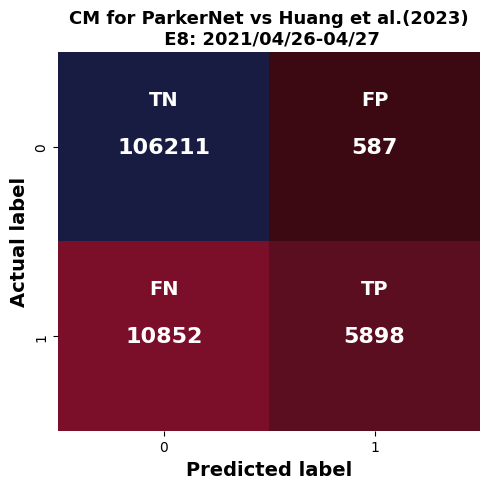

IoU at threshold 0.6: 0.3402


In [ ]:


huang_data_path = 'SingalROI_E8_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E8['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E8['Class_Huang_E8_Range']

# Define threshold
threshold = 0.6

# Confusion Matrix Function
def plot_cm_and_metrics(labels, predictions, threshold=0.6):
    # Compute the confusion matrix
    cm = confusion_matrix(labels, predictions > threshold)

    # Plot the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title('CM for ParkerNet vs Huang et al.(2023)\n E8: 2021/04/26-04/27', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')
    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()

    # Position the labels slightly above the center of each section
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    # Show the plot
    plt.savefig('E8_Huang_CM.svg', dpi=600, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth, predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
print(f'IoU at threshold {threshold}: {iou:.4f}')

   Threshold  Precision    Recall  F1 Score       AUC
0       0.50   0.653233  0.457731  0.538281  0.559858
1       0.55   0.802400  0.403164  0.536676  0.559858
2       0.60   0.909483  0.352119  0.507682  0.559858
3       0.65   0.940437  0.303522  0.458928  0.559858
4       0.70   0.966102  0.255224  0.403778  0.559858
5       0.75   1.000000  0.202866  0.337304  0.559858
6       0.80   1.000000  0.139881  0.245430  0.559858
7       0.85   0.000000  0.000000  0.000000  0.559858
8       0.90   0.000000  0.000000  0.000000  0.559858
9       0.95   0.000000  0.000000  0.000000  0.559858


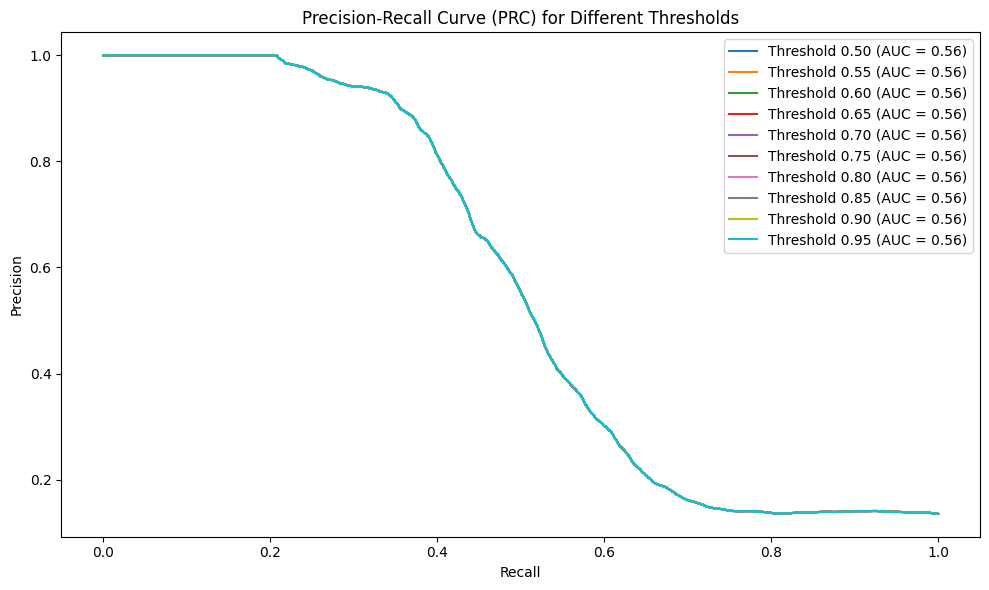

In [ ]:



huang_data_path = 'SingalROI_E8_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')


predictions = df_ensemble_E8['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E8['Class_Huang_E8_Range']

# Define thresholds for analysis
thresholds = np.arange(0.5, 1.0, 0.05)

# Initialize lists to store metrics for each threshold
precision_list = []
recall_list = []
f1_list = []
auc_list = []

# Create an empty DataFrame to store the metrics for each threshold
metrics_df = pd.DataFrame(columns=['Threshold', 'Precision', 'Recall', 'F1 Score', 'AUC'])

# Function to calculate confusion matrix and metrics
def calculate_metrics(labels, predictions, threshold):
    cm = confusion_matrix(labels, predictions > threshold)
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Calculate Precision-Recall curve and AUC
    precision_curve, recall_curve, _ = precision_recall_curve(labels, predictions)
    auc_score = auc(recall_curve, precision_curve)

    return precision, recall, f1_score, auc_score

# Loop through each threshold and calculate metrics
for threshold in thresholds:
    precision, recall, f1_score, auc_score = calculate_metrics(ground_truth, predictions, threshold)

    # Add the results to the metrics dataframe using pd.concat
    new_row = pd.DataFrame({
        'Threshold': [threshold],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1_score],
        'AUC': [auc_score]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

# Print the metrics DataFrame
print(metrics_df)

# Plot the Precision-Recall curve and include AUC in the legend
plt.figure(figsize=(10, 6))
for threshold in thresholds:
    # Get precision and recall for the current threshold
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Plot each threshold with its AUC score in the legend
    plt.plot(recall_curve, precision_curve, label=f'Threshold {threshold:.2f} (AUC = {auc_score:.2f})')

plt.title('Precision-Recall Curve (PRC) for Different Thresholds')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

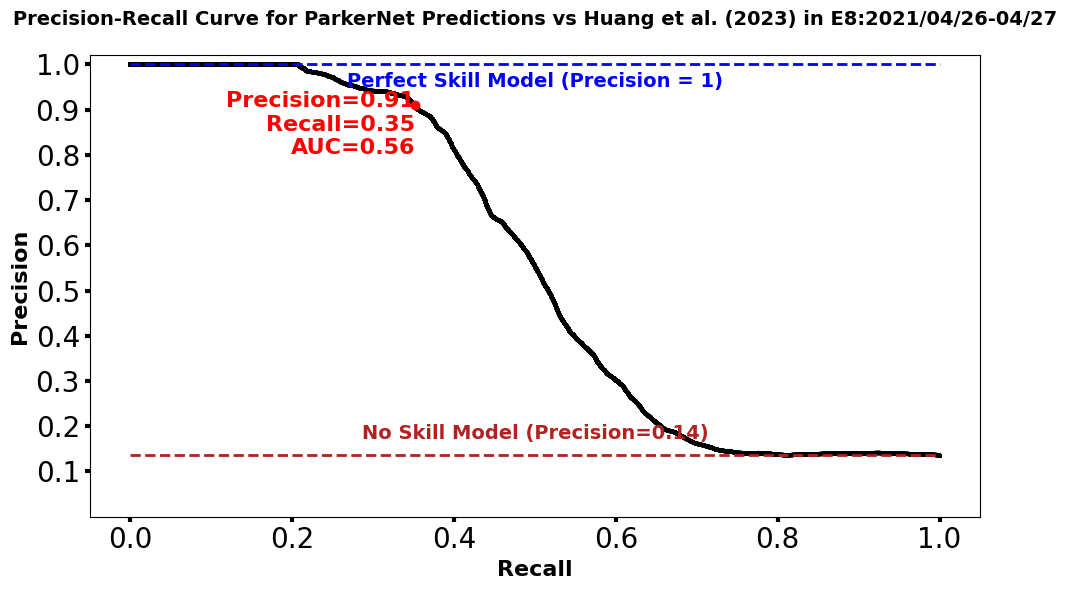

In [ ]:



huang_data_path = 'SingalROI_E8_Huang_allRegions.txt'
roi_data = pd.read_csv(huang_data_path, delimiter='\t')

predictions = df_ensemble_E8['Weighted_Voting_AUC_PRC']
ground_truth = df_ensemble_E8['Class_Huang_E8_Range']

# Define thresholds (from 0.5 to 0.95)
thresholds = np.round(np.arange(0.5, 0.95, 0.05), 2)

# Initialize lists to store the Precision-Recall curve and AUC for each threshold
precision_dict = {}
recall_dict = {}
auc_dict = {}

# Calculate Precision-Recall curve and AUC for each threshold
for threshold in thresholds:
    precision_curve, recall_curve, _ = precision_recall_curve(ground_truth, predictions)
    auc_score = auc(recall_curve, precision_curve)

    # Store precision, recall, and auc values for each threshold
    precision_dict[threshold] = precision_curve
    recall_dict[threshold] = recall_curve
    auc_dict[round(threshold, 2)] = auc_score  # Round threshold to two decimal places

# Plot Precision-Recall curves for all thresholds
plt.figure(figsize=(10, 6))

for threshold in thresholds:
    plt.plot(recall_dict[threshold], precision_dict[threshold], color='black', linewidth=3)

# Provided precision and recall at threshold 0.6

threshold_0_6_precision = 0.909483
threshold_0_6_recall =  0.352119

# Calculate AUC at threshold 0.6
auc_at_06 = auc_dict[0.6]  # AUC for threshold 0.6

# Plot the red dot for threshold 0.6
plt.plot(threshold_0_6_recall, threshold_0_6_precision, 'k-', label=f'Model Precision-Recall curve at 0.60 threshold')

# Calculate No Skill Model baseline
num_positives = np.sum(ground_truth == 1)
num_total = len(ground_truth)
no_skill_precision = num_positives / num_total
no_skill_recall = num_positives / num_total  # Recall is the same as the proportion of positives

# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.2f})',
             (0.5, no_skill_precision + 0.005),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.92),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')

# Adding labels and title
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Huang et al. (2023) in E8:2021/04/26-04/27\n', fontsize=14, fontweight='bold')
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(threshold_0_6_recall, threshold_0_6_precision, color='red', zorder=5)

# Add the red dot annotation for threshold 0.6
plt.annotate(f'Precision={threshold_0_6_precision:.2f}\nRecall={threshold_0_6_recall:.2f}\nAUC={auc_at_06:.2f}',
             (threshold_0_6_recall, threshold_0_6_precision),
             textcoords="offset points",
             xytext=(0,10),
             ha='right', va= 'top', fontsize=16, fontweight='bold', color='red')

# Set y-axis limits to ensure the perfect skill line is visible
plt.ylim(0/1, 1.02)
# Customize y-axis ticks to show 0.1 and 0.9
plt.yticks(np.arange(0.1, 1.02, 0.1))  # Set y-ticks from 0 to 1 with step of 0.1

# Apply the tick parameters to all axes after plotting
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks


#plt.savefig('E8_Huang_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()


 (True Negatives):  116927
 (False Positives):  6038
(False Negatives):  136
 (True Positives):  447
Precision: 0.0689
Recall: 0.7667
F1 Score: 0.1265
Total Switchbacks (Ground Truth 1):  583
Intersection over Union (IoU): 0.0675
IoU at threshold 0.6: 0.0675


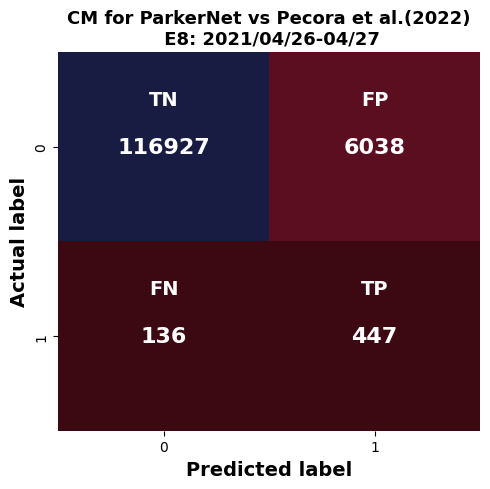

In [ ]:



pecora_data = pd.read_csv('SignalROI_E8_26and27_Pecora_10s_6hr.txt', sep='\t')

predictions = df_ensemble_E8['Weighted_Voting_AUC_PRC']

# Define threshold
threshold = 0.6

# Create a binary prediction array based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Calculate start and end indices based on the Pecora data and 10-second window
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)  # Ensure integers

# Construct ground truth based on adjusted indices
ground_truth_pecora = np.zeros_like(binary_predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def plot_cm_and_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)
    if np.all(cm == 0):  # Check if cm is all zeros (invalid case)
        print("Warning: Confusion matrix is all zeros!")
        return None  # Return None if confusion matrix is empty

    # Plot confusion matrix using heatmap
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="pyart_balance_r", cbar=False, annot_kws={"size": 16, "weight":"bold"})
    plt.title(f'CM for ParkerNet vs Pecora et al.(2022)\n E8: 2021/04/26-04/27', fontsize=13, fontweight='bold')
    plt.ylabel('Actual label', fontsize=14, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=14, fontweight='bold')

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Annotate TP, FP, FN, TN above the matrix values
    ax = plt.gca()
    ax.text(0.5, 0.25, 'TN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 0.25, 'FP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(0.5, 1.25, 'FN', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 1.25, 'TP', ha='center', va='center', fontsize=14, fontweight='bold', color='white')

    print(' (True Negatives): ', TN)
    print(' (False Positives): ', FP)
    print('(False Negatives): ', FN)
    print(' (True Positives): ', TP)

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1_score:.4f}')

    print('Total Switchbacks (Ground Truth 1): ', np.sum(cm[1]))

    # Calculate Intersection over Union (IoU)
    iou = TP / (TP + FP + FN) if (TP + FP + FN) != 0 else 0
    print(f'Intersection over Union (IoU): {iou:.4f}')

    # Return IoU for potential further use
    return iou

# Apply the confusion matrix and calculate metrics for the threshold
iou = plot_cm_and_metrics(ground_truth_pecora, binary_predictions, threshold=0.6)

# Optionally, you can print IoU as well if needed:
if iou is not None:
    print(f'IoU at threshold {threshold}: {iou:.4f}')

# Show the plot
plt.tight_layout()
#plt.savefig('E8_Pecora_CM_1.svg', dpi=600, bbox_inches='tight')  # Save after the plot is created
plt.show()

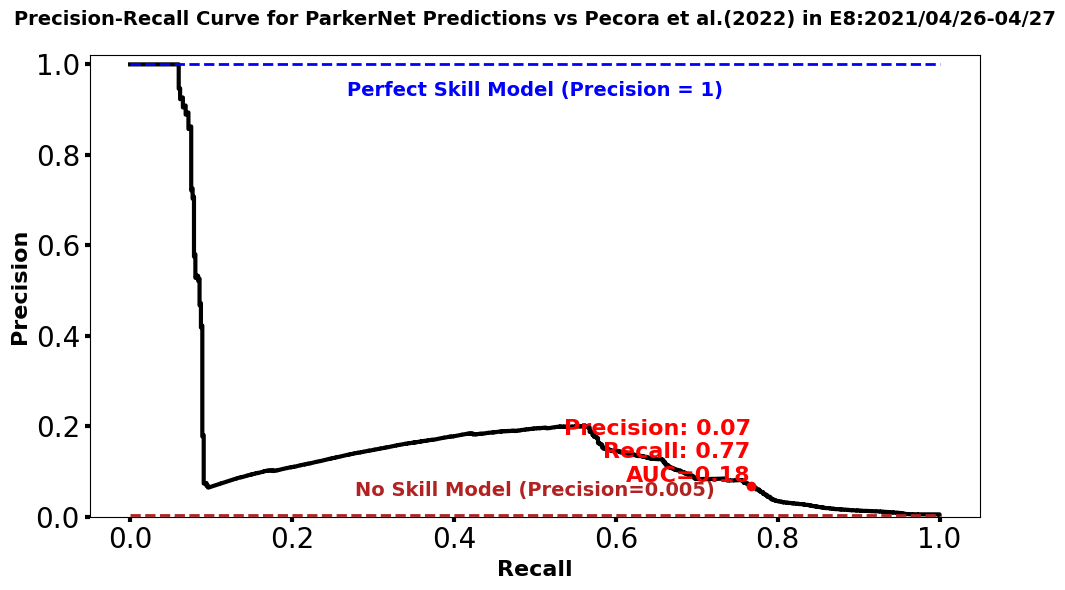

In [ ]:



pecora_data = pd.read_csv('SignalROI_E8_26and27_Pecora_10s_6hr.txt', sep='\t')
predictions = df_ensemble_E8['Weighted_Voting_AUC_PRC']

# Window size: 10 seconds = 11.44 time steps (rounded)
time_steps_per_point = 11.44  # Time steps corresponding to 10 seconds

# Adjust Pecora data based on the start and end indices (10-second window)
pecora_data['start_index'] = pecora_data['ClosestIndex']
pecora_data['end_index'] = (pecora_data['ClosestIndex'] + time_steps_per_point).round().astype(int)

# Construct ground truth based on adjusted indices for Pecora data
ground_truth_pecora = np.zeros_like(predictions)

for _, row in pecora_data.iterrows():
    start_idx, end_idx = int(row['start_index']), int(row['end_index'])  # Ensure integers
    ground_truth_pecora[start_idx:end_idx] = 1  # Mark the range as ground truth

# Define thresholds to evaluate
thresholds = np.linspace(0.1, 0.9, 9)

# Initialize list to store metrics
metrics_list = []

# Confusion Matrix Function to calculate TP, FP, FN, TN, and metrics
def calculate_metrics(labels, predictions, threshold=0.7):
    cm = confusion_matrix(labels, predictions > threshold)

    # Get TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # Calculate Precision, Recall, and F1 Score
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return precision, recall, f1_score

# Evaluate metrics at various thresholds
for threshold in thresholds:
    precision, recall, f1_score = calculate_metrics(ground_truth_pecora, predictions, threshold)
    metrics_list.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})

# Convert metrics list to dataframe
metrics_df = pd.DataFrame(metrics_list)

# Plot the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(ground_truth_pecora, predictions)

# **Perfect Skill** line will be precision=1, recall=1 across all recall values
perfect_skill = np.ones_like(recall)

# **No Skill** line is precision = the proportion of positive samples in the ground truth
no_skill_precision = np.sum(ground_truth_pecora == 1) / len(ground_truth_pecora)  # Proportion of positive samples
no_skill = np.full_like(recall, no_skill_precision)

# AUC at threshold 0.6
threshold_06_index = np.where(thresholds >= 0.6)[0][0]
precision_at_06 = metrics_df.loc[threshold_06_index, 'Precision']
recall_at_06 = metrics_df.loc[threshold_06_index, 'Recall']
auc_at_06 = auc(recall, precision)  # Calculate AUC value

plt.figure(figsize=(10, 6))

# Plot Precision-Recall Curve
plt.plot(recall, precision, color='black', lw=3, label=f'Model Precision-Recall Curve at 0.6 threshold')



# Plot No Skill Model baseline line
plt.plot([0, 1], [no_skill_precision, no_skill_precision], linestyle='--', linewidth = 2, color='#B22222')
# Add annotation for No Skill Model line
plt.annotate(f'No Skill Model (Precision={no_skill_precision:.3f})',
             (0.5, no_skill_precision + 0.01),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='#B22222')

# Plot Perfect Skill Model line (Precision = 1)
plt.plot([0, 1], [1, 1], linestyle='--', color='blue', linewidth = 2)
# Add annotation for Perfect Skill Model line
plt.annotate(f'Perfect Skill Model (Precision = 1)',
             (0.5, 0.9),
             textcoords="offset points",
             xytext=(0, 10),
             ha='center', fontsize=14, fontweight='bold', color='blue')


# Plot Precision and Recall values at threshold 0.6 directly on the graph
plt.text(recall_at_06, precision_at_06, f'Precision: {precision_at_06:.2f}\nRecall: {recall_at_06:.2f}\nAUC={auc_at_06:.2f}', color='red', fontsize=16, fontweight = 'bold', ha='right', va='bottom')

# Plot red dot at the 0.6 threshold precision and recall
plt.scatter(recall_at_06, precision_at_06, color='red', zorder=5)

# Labels and Title
plt.xlabel('Recall', fontsize=16, fontweight='bold')
plt.ylabel('Precision', fontsize=16, fontweight='bold')
plt.title('Precision-Recall Curve for ParkerNet Predictions vs Pecora et al.(2022) in E8:2021/04/26-04/27\n', fontsize=14, fontweight='bold')

plt.ylim(0, 1.02)
plt.yticks(np.arange(0, 1.02, 0.2))
# Display the dataframe with metrics at different thresholds
#display(metrics_df)
# Increase the size of the x and y axis tick marks
plt.tick_params(axis='x', labelsize=20, width=3)  # Increase font size for x-axis ticks
plt.tick_params(axis='y', labelsize=20, width=3)  # Increase font size for y-axis ticks

#plt.savefig('E8_Pecora_PRC.svg', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()
